TP 1 del grupo 5:
<p>
Antonella Cappellari
<p>
Aurelio Nascimento
<p>
Diego Castro
<p>
Diego Ciarrapico
<p>
Facundo Ponce
<p>
Luciano Santoferrara
<p>
Matias Irimia
<p>
Paula Mainini
<p>
Santiago Cattaneo
<p>
Santiago Cerdan

Se importan las librerías utilizadas, las librerías comentadas son necesarias para rutinas que ya no se utilizan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import geopandas as gpd
from operator import itemgetter 
from matplotlib import colors as mcolors
from matplotlib.ticker import MaxNLocator
import re
pd.set_option('display.max_colwidth', 0)

Se define una funcion que grafique en un mapa de Argentina las locaciones

In [2]:
def graph_map(df_graph_places):


    #Se crea un geoDataframe con los datos de longitud, latitud, el nombre de la provincia para utilizar de label
    geometria = gpd.points_from_xy(df_graph_places.lon_new, df_graph_places.lat_new)

    geo_arg = gpd.GeoDataFrame(df_graph_places, geometry=geometria)
    #Se pasan todas las provincias que aparecen como "Bs..." o "@"Buenos Aires ..."" a Buenos Aires
    mask1= geo_arg['state_name'].apply(lambda x : True if 'Bs' in x else False)
    mask2= geo_arg['state_name'].apply(lambda x : True if 'Buenos' in x else False)
    mask=mask1|mask2

    geo_arg.loc[mask,'state_name']='Buenos Aires'
    #Se crean colores para cada uno de los Paises y se crea una columna que contenga el color
    categories = np.unique(geo_arg.state_name)
    colors_aux=list(map(int, np.linspace(0,(len(categories)-1)*6,len(categories))))
    colors = itemgetter(*colors_aux)(list(mcolors.CSS4_COLORS)) 
    colordict = dict(zip(categories, colors))
    geo_arg["Color"] = geo_arg['state_name'].apply(lambda x:  colordict[x])
    data_location = "provincia.shp"
    provincias=gpd.read_file(data_location)

    ax = provincias.plot(edgecolor='black',color='lightgrey',figsize=(30,30))
    for i in categories:
        geo_arg.loc[(geo_arg.state_name==i)].plot(ax=ax, color=colordict[i],label=i,)
    #Reduzco la imagen para que la leyenda entre al costado del gráfico
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlim(left=-74, right=-53)
    ax.set_ylim(bottom=-56, top=-20)
    provincias.apply(lambda x: ax.annotate(text=x['nam'], xy=x.geometry.representative_point().coords[0], ha='center'), axis=1)
    plt.annotate(text='Tierra del Fuego', xy=(-68,-54),horizontalalignment='center')
    plt.show()

Se define una función para eliminar outliers

In [3]:
def eliminar_outliers_iqr(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return columna[(columna >= umbral_inferior) & (columna <= umbral_superior)]


Se carga el Archivo

In [4]:

data_location = "properatti.csv"
data=pd.read_csv(data_location,sep=',',header=0)
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/CARHUE%202278-IMG_3400.JPG
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_lavadero_toilette_garage_estrenar_antonini-propiedades_dcp,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0/smart/filters:strip_icc()/antoninipropiedades.com/photos/401-1-7%20y%2037%2010A%201.jpg
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavadero_placard_inmobiliaria-fedele,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/GUAMINI%201171-IMG_3403.JPG
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0/smart/filters:strip_icc()/ggoffredo.com/photos/GG0040-1563480102.jpg
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-pavone-negocios-inmobiliarios,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZ

Se comienza con la columma Unnamed:0
Parece ser que tiene simplemente el valor de los indices, verifico:

In [5]:
def DF_column_unnamed(data):
    display(data['Unnamed: 0'].head(5))

    print((data['Unnamed: 0']==data.index).unique())

    #Conclusión: como la comparación anterior solo contiene resultados "true" 
    # la columna "unnamed: 0" puede ser descartada ya que no agrega información y solo contiene los indices
    columns_to_drop=['Unnamed: 0']
    data.drop(columns_to_drop,axis=1,inplace=True)
    return data

data=DF_column_unnamed(data)

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

[ True]


Se analiza la columna url_properati

In [6]:
def DF_column_properati_url(data):
    display(data['properati_url'].head(5))

    # la columna "properati_url" contiene direcciones web que ya no existen, se decarta
    columns_to_drop=['properati_url']
    data.drop(columns_to_drop,axis=1,inplace=True)
    return data

data=DF_column_properati_url(data)

0    http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele                                         
1    http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_lavadero_toilette_garage_estrenar_antonini-propiedades_dcp
2    http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavadero_placard_inmobiliaria-fedele                            
3    http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo                                                             
4    http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-pavone-negocios-inmobiliarios                             
Name: properati_url, dtype: object

Se sigue por la columna operations que parece contener el tipo de operación

In [7]:
def DF_column_operation(data):
    display(data['operation'].head(5))
    
    print((data['operation']).unique())
    
    #Conclusión: la columna operation no agrega información ya que el único
    #valor es sell. La columna puede ser descartada
    
    columns_to_drop=['operation']
    data.drop(columns_to_drop,axis=1,inplace=True)
    return data

data=DF_column_operation(data)

0    sell
1    sell
2    sell
3    sell
4    sell
Name: operation, dtype: object

['sell']


Se sigue por la columna propery_type que muestra el tipo de propiedad, se ve una gran proporción de departamentos.

0    PH       
1    apartment
2    apartment
3    PH       
4    apartment
Name: property_type, dtype: object

['PH' 'apartment' 'house' 'store']
0.0


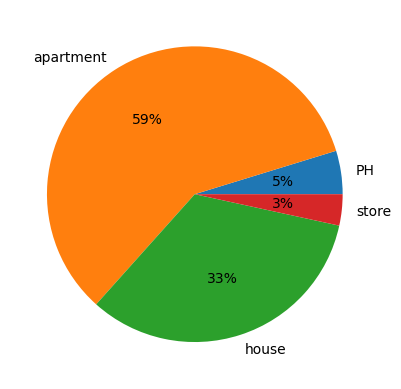

In [8]:
def DF_propertytypes(data):
    display(data['property_type'].head(5))
    print(data.property_type.unique())
    #Veo si hay vacíos
    print(data.property_type.isnull().sum()/data.property_type.count())
    #al no haberlos la columna está bien como está
    tipo_propiedades=data.groupby('property_type')['place_name'].count()
    plt.pie(tipo_propiedades, labels=tipo_propiedades.index, autopct='%.0f%%') 
    plt.show
    return data
data=DF_propertytypes(data)

Las columnas 'place_with_parent_names','country_name','state_name','place_name' muestran información sobre el lugar. Estas columnas parecen contener información repetida.
Finalmente se crean columnas con toda la información de la columna 'place_with_parent_names', si bien a medida que se avanza en la información la cantidad de nulos va desde 0% para la provincia hasta llegar a mas de un 90% de nulos en la ultima se decide no descartar ninguna columna en caso de que se quiera hacer un analisis particular sobre nordelta, lugar que contiene información en la última columna.

In [9]:
def DF_columnas_lugares(data):
    import re

      
    display(data[['place_with_parent_names','country_name','state_name','place_name']].head(5))
    #La columna place with parent names parece contener informacion de la locación, parcialmente
    #compartida con las columnas place_name, contry_name y state name

    #se extraerá la informacion de la columna "place_with_parent_names" para comparar con las otras columnas:
    #primero verifico la cantidad máxima de diviciones que hay en la columna

    div_max=data['place_with_parent_names'].apply(lambda x : x.count('|'))
    print(div_max.max())

    #el 6 muestra que la máxima cantidad de diviciones es 5 por lo que esa columna deberá ser dividida en 5 columnas:

    #Busco la cantidad mínima de diviciones que hay en la columna
    print(div_max.min())

    #el 3 muestra que algunos casos solo tienen 2 lugares y el resto de las columnas serán nulas

    patron = '\|([a-zA-Z\.\sÁÉÍÓÚóéíáú]+)+'

    regex = re.compile(patron, flags = re.IGNORECASE) 
    for i in range(div_max.max()-1):
        data[f'new_place_{i+1}']= data['place_with_parent_names'] \
            .apply(lambda x: regex.findall(x)[i] if len(regex.findall(x))>i else '' )
        print(data[f'new_place_{i+1}'].head(10)) 
        print(data[f'new_place_{i+1}'].unique())
        #Verifico cantidad de celdas vacías por columna
        print(f'la cantidad de celda vacias en new_place_{i+1} es {(data[f"new_place_{i+1}"].values == "").sum()}' )
        print('----------')
        
    #verifico que la columna new_place_1 se igual a la columna "country_name"
    print((data['new_place_1']==data.country_name).unique())

    #Conclusión: como la comparación anterior solo contiene resultados "true" 
    # la columna "new_place_1" puede ser descartada ya que no agrega información
    columns_to_drop=['new_place_1']

    #A su vez la columna "country_name" parece presentar solo valores "Argentina"
    print(data.country_name.unique())

    #Como la columna solo contiene valores "Argentina" no agrega información y es descartada
    columns_to_drop.append('country_name')    

    #verifico que la columna new_place_2 se igual a la columna "state_name"
    print((data['new_place_2']==data.state_name).unique())

    #Conclusión: como la comparación anterior solo contiene resultados "true" 
    # la columna "new_place_2" puede ser descartada ya que no agrega información
    columns_to_drop.append('new_place_2')  
    columns_to_drop.append('place_name')  
    columns_to_drop.append('place_with_parent_names')  
    data.drop(columns_to_drop,axis=1,inplace=True)


    # Si bien las columnas newplace 3 4 y 5 tienen muchas partes vacías
    #contienen información que puede resultar util, se dejarán
    return data

data=DF_columnas_lugares(data)


,place_with_parent_names,country_name,state_name,place_name
0,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,Mataderos
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,La Plata
2,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,Mataderos
3,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,Liniers
4,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,Centro


6
3
0    Argentina
1    Argentina
2    Argentina
3    Argentina
4    Argentina
5    Argentina
6    Argentina
7    Argentina
8    Argentina
9    Argentina
Name: new_place_1, dtype: object
['Argentina']
la cantidad de celda vacias en new_place_1 es 0
----------
0    Capital Federal             
1    Bs.As. G.B.A. Zona Sur      
2    Capital Federal             
3    Capital Federal             
4    Buenos Aires Costa Atlántica
5    Entre Ríos                  
6    Bs.As. G.B.A. Zona Norte    
7    Capital Federal             
8    Capital Federal             
9    Santa Fe                    
Name: new_place_2, dtype: object
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santia

Se tienen una columna con la combinación de longitud y latitud y dos columnas con la misma información, al chequear que las dos contienen la misma información se eliminan las duplicadas

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447


lat-lon    object 
lat        float64
lon        float64
dtype: object
[ True]
[ True]
[ True]
[ True]


,property_type,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,rooms,expenses,description,title,image_thumbnail,new_place_3,new_place_4,new_place_5,lat_new,lon_new
0,PH,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,1093959.0,62000.0,55.0,40.0,...,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/CARHUE%202278-IMG_3400.JPG,Mataderos,,,-34.661824,-58.508839
1,apartment,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",150000.0,USD,2646675.0,150000.0,NaN,NaN,...,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0/smart/filters:strip_icc()/antoninipropiedades.com/photos/401-1-7%20y%2037%2010A%201.jpg,La Plata,,,-34.903883,-57.964329
2,apartment,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,USD,1270404.0,72000.0,55.0,55.0,...,NaN,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/GUAMINI%201171-IMG_3403.JPG,Mataderos,,,-34.652262,-58.522982
3,PH,Capital Federal,3431333.0,"-34.6477969,-58.5164244",95000.0,USD,1676227.5,95000.0,NaN,NaN,...,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0/smart/filters:strip_icc()/ggoffredo.com/photos/GG0040-1563480102.jpg,Liniers,,,-34.647797,-58.516424
4,apartment,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",64000.0,USD,1129248.0,64000.0,35.0,35.0,...,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0/smart/filters:strip_icc()/cristinapavone.com/photos/66-thumbnail_20170126_120753_1485788428321_resized.jpg,Mar del Plata,Centro,,-38.002626,-57.549447


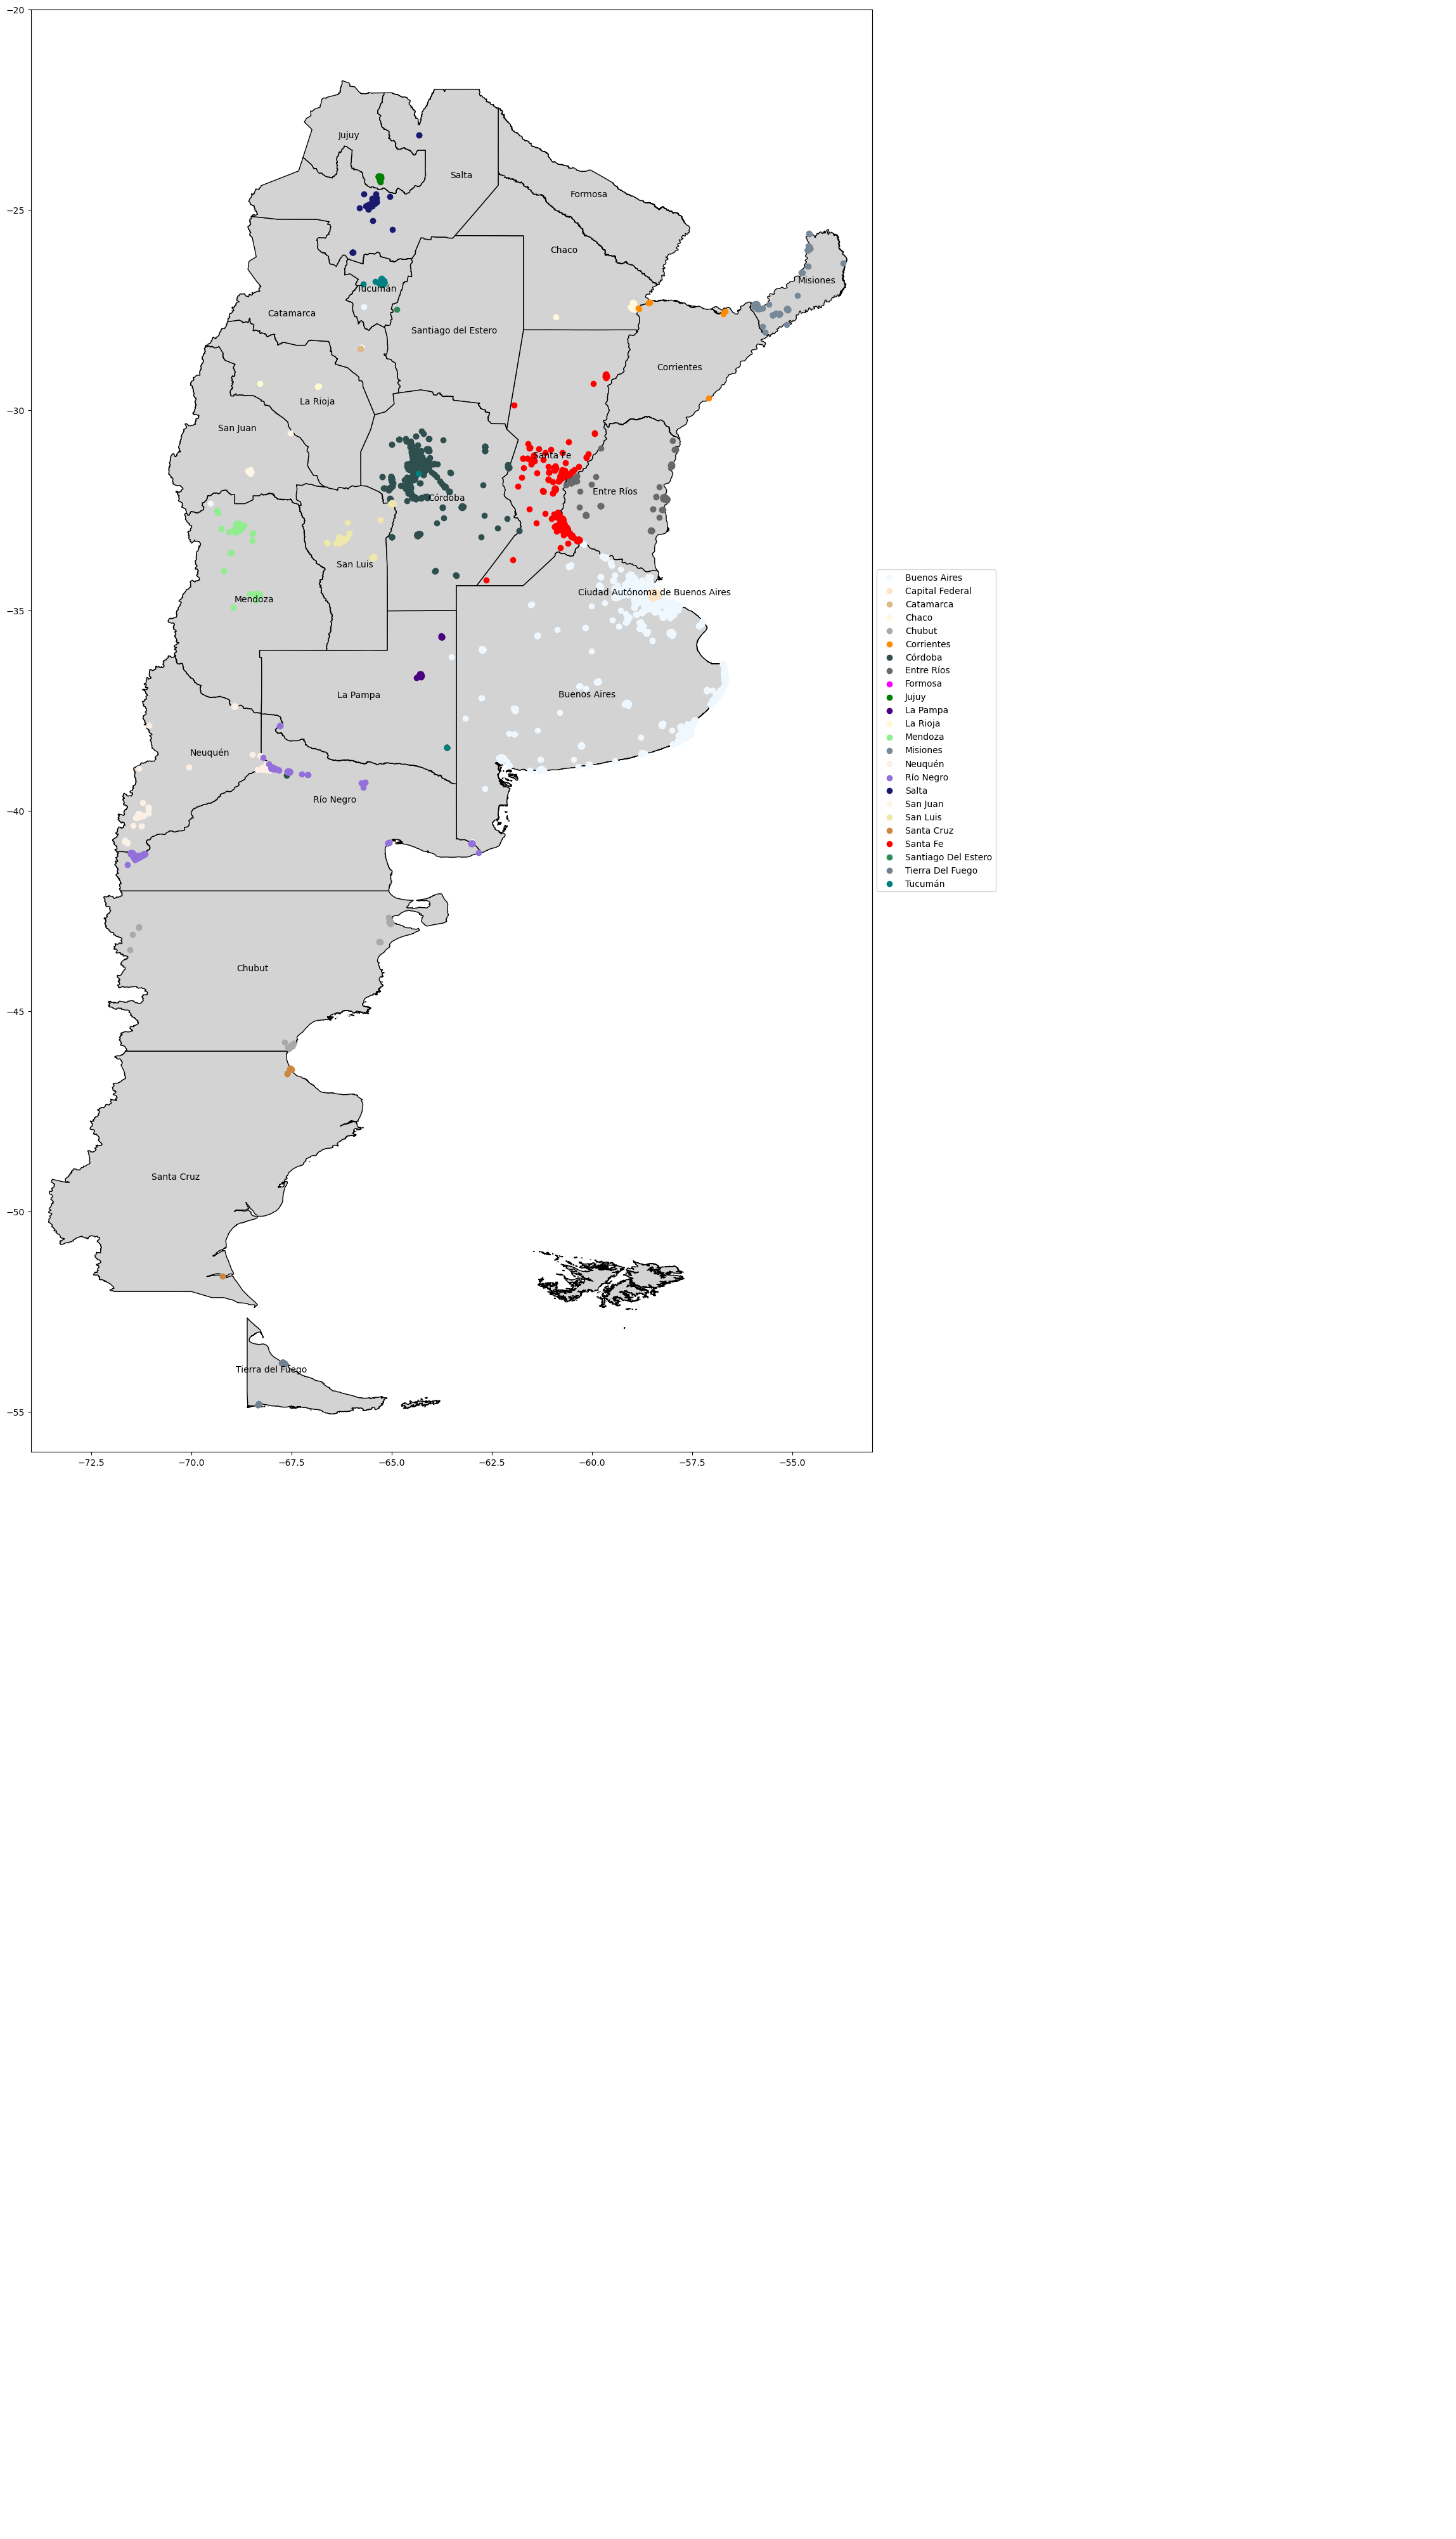

In [10]:
def DF_column_lat_long(data):
    display(data[['lat-lon','lat','lon']].head(5))
    print(data[['lat-lon','lat','lon']].dtypes)
    #Parece ser que la columna lat y long tienen la misma info que las otras dos,
    #La columna lat-long parece tener más precisión

    #verifico que todas sean nulas en el mismo lugar
    mask_lat=data['lat'].isnull()
    mask_lat_lon=data['lat-lon'].isnull()
    mask_lon=data['lon'].isnull()
    print((mask_lat==mask_lon).unique())
    print((mask_lat==mask_lat_lon).unique())

    #Creo máscara de los no nulos para poder comparar los valores cuando los extraiga
    mask_lat_not_null=data['lat'].notnull()

    #creo dos columnas a partir de lat-lon
    data[['lat_new','lon_new']]=data['lat-lon'].str.split(',',expand=True).astype(float)

    #al ser float puden no ser iguales busco diferencia menor a 1e-6 dado la presición de las
    #columnas lat y lon
    print(abs((data.loc[mask_lat_not_null,'lat']-data.loc[mask_lat_not_null,'lat_new'])<1e-6).unique())
    print(abs((data.loc[mask_lat_not_null,'lon']-data.loc[mask_lat_not_null,'lon_new'])<1e-6).unique())

    #Conclusión: como la comparación anterior solo contiene resultados "true" las columnas lat y lon
    #están repetidas y pasan a ser descartadas

    columns_to_drop=['lat','lon']
    data.drop(columns_to_drop,axis=1,inplace=True)
    display(data.head(5))


    #Finalmente se eliminan aquellos puntos que no corresponden a Aregntina Continental :
    #  - 21° 46' 52" < lat < -55° 03' 21" | - 73° 34' < long < -53° 38' 15"
    mask_lat=(data['lat_new']>-21.781111) | (data['lat_new']<-55.055833)
    mask_lon=(data['lon_new']>-53.6375) | (data['lon_new']<-73.566666)
    mask_filtro_lat_lon= mask_lat | mask_lon
    #solo se borra un registro que está fuera de Argentina
    mask_filtro_lat_lon.sum()
    data.loc[mask_filtro_lat_lon,['lat_new','lon_new']]=np.NaN


    return data

data=DF_column_lat_long(data)
graph_map(data[['lat_new','lon_new','state_name']])
# 

Las columnas de latitud y longitud presentan una cantidad de nulls levemente inferior a la mitad: Como no serán usados durante esta parte del proyecto se dejarán así pero se considera completarlas utilizando los geonames_id. Haciendo esto se pasa a un 6.89% de nulls

In [11]:
print(f"las columnas de latitud y longitud presentan un {(data['lat_new'].isnull().sum()/data['lat_new'].size*100):.2f}% de nulos")

data_location = "Geonames_id.csv"
geonames_ids=pd.read_csv(data_location,sep=',',header=0,encoding='ANSI')
print(geonames_ids.dtypes)
#Se hace un merge entre usando geonames_id de ambos DataFrames y se crean nuevas columnas lat y lon_geonames_id
data=pd.merge(left=data,right=geonames_ids,on='geonames_id',how='left',sort=False)
display(data.head(10))

#Se crea un masacara donde no se tiene latitud y si se tiene geonames_id para completar la latitud y longitud
mask_null_lat_new=data['lat_new'].isnull()
mask_notnull_geonames_id=data['geonames_id'].notnull()
mask_tofill=mask_notnull_geonames_id & mask_null_lat_new
data.loc[mask_tofill,'lon_new']=data.loc[mask_tofill,'lon_geonames_id']
data.loc[mask_tofill,'lat_new']=data.loc[mask_tofill,'lat_geonames_id']
#Una vez usada esta información se descarta la inforamción por no se más necesaria
columns_to_drop=['lat_geonames_id','lon_geonames_id']
data.drop(columns_to_drop,axis=1,inplace=True)
print(f"las columnas de latitud y longitud presentan un {(data['lat_new'].isnull().sum()/data['lat_new'].size*100):.2f}% de nulos")


las columnas de latitud y longitud presentan un 42.53% de nulos
geonames_id          int64  
Place_geonames_id    object 
lat_geonames_id      float64
lon_geonames_id      float64
dtype: object


,property_type,state_name,geonames_id,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,title,image_thumbnail,new_place_3,new_place_4,new_place_5,lat_new,lon_new,Place_geonames_id,lat_geonames_id,lon_geonames_id
0,PH,Capital Federal,3430787.0,"-34.6618237,-58.5088387",62000.0,USD,1093959.00,62000.00,55.0,40.0,...,2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/CARHUE%202278-IMG_3400.JPG,Mataderos,,,-34.661824,-58.508839,Mataderos,-34.66667,-58.50000
1,apartment,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",150000.0,USD,2646675.00,150000.00,NaN,NaN,...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0/smart/filters:strip_icc()/antoninipropiedades.com/photos/401-1-7%20y%2037%2010A%201.jpg,La Plata,,,-34.903883,-57.964329,Partido de La Plata,-35.00000,-58.00000
2,apartment,Capital Federal,3430787.0,"-34.6522615,-58.5229825",72000.0,USD,1270404.00,72000.00,55.0,55.0,...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/GUAMINI%201171-IMG_3403.JPG,Mataderos,,,-34.652262,-58.522982,Mataderos,-34.66667,-58.50000
3,PH,Capital Federal,3431333.0,"-34.6477969,-58.5164244",95000.0,USD,1676227.50,95000.00,NaN,NaN,...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0/smart/filters:strip_icc()/ggoffredo.com/photos/GG0040-1563480102.jpg,Liniers,,,-34.647797,-58.516424,Liniers,-34.64286,-58.52386
4,apartment,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",64000.0,USD,1129248.00,64000.00,35.0,35.0,...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0/smart/filters:strip_icc()/cristinapavone.com/photos/66-thumbnail_20170126_120753_1485788428321_resized.jpg,Mar del Plata,Centro,,-38.002626,-57.549447,NaN,NaN,NaN
5,house,Entre Ríos,3433657.0,"-33.0140714,-58.519828",NaN,NaN,NaN,NaN,53.0,NaN,...,"Casa Barrio 338. Sobre calle 3 de caballería, casi Nágera. Dos habit. Muy buen estado, patio con tapiales.",https://thumbs4.properati.com/6/q-w68gvaUEQVXI3TBNmm4LNEFvY=/trim/198x0/smart/filters:strip_icc()/bibelprop.com.ar/photos/114-1-IMG_20170715_131646407_HDR.jpg,Gualeguaychú,,,-33.014071,-58.519828,Departamento de Gualeguaychú,-33.25000,-59.00000
6,PH,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",130000.0,USD,2293785.00,130000.00,106.0,78.0,...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO, EXCELENTE UBICACION EN MUNRO",https://thumbs4.properati.com/5/6GOXsHCyDu1aGxDqan1MqQtN9OA=/trim/198x0/smart/filters:strip_icc()/alejandramaradonainmobiliaria.com/photos/23-1-20170127_161019_1485618510733.jpg,Vicente López,Munro,,-34.532957,-58.521783,Munro,-34.53021,-58.52421
7,apartment,Capital Federal,3436077.0,"-34.5598729,-58.443362",138000.0,USD,2434941.00,138000.00,45.0,40.0,...,"JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA",https://thumbs4.properati.com/1/IHxARynlr8sPEWmzhxVZ2cfRb6M=/trim/198x0/smart/filters:strip_icc()/estiloinmobiliarios.com/photos/179-hernandez%201400%20amb.jpg,Belgrano,,,-34.559873,-58.443362,Belgrano,-34.56270,-58.45829
8,apartment,Capital Federal,3436077.0,"-34.5598729,-58.443362",195000.0,USD,3440677.50,195000.00,65.0,60.0,...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR , CATEGORIA , VENTA",https://thumbs4.properati.com/2/J3zOjgaFHrkvnvLRERHvIUhHHb4=/trim/198x0/smart/filters:strip_icc()/estiloinmobiliarios.com/photos/180-hernandez%201400%20amb.jpg,Belgrano,,,-34.559873,-58.443362,Belgrano,-34.56270,-58.45829
9,house,Santa Fe,3838574.0,"-32.942031,-60.7259192",460000.0,ARS,455201.45,25798.49,NaN,NaN,...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98wKqeDU5Sd7ThE=/tr

las columnas de latitud y longitud presentan un 6.89% de nulos


Se analizan los datos graficando un mapa de la Argentina con las propiedades:

Se ve que algunos puntos no están bien posicionados en la provincia correcta, esto se podría intentar resolver con los geonames pero se dejará
para un futuro paso en caso de que se considere necesario.

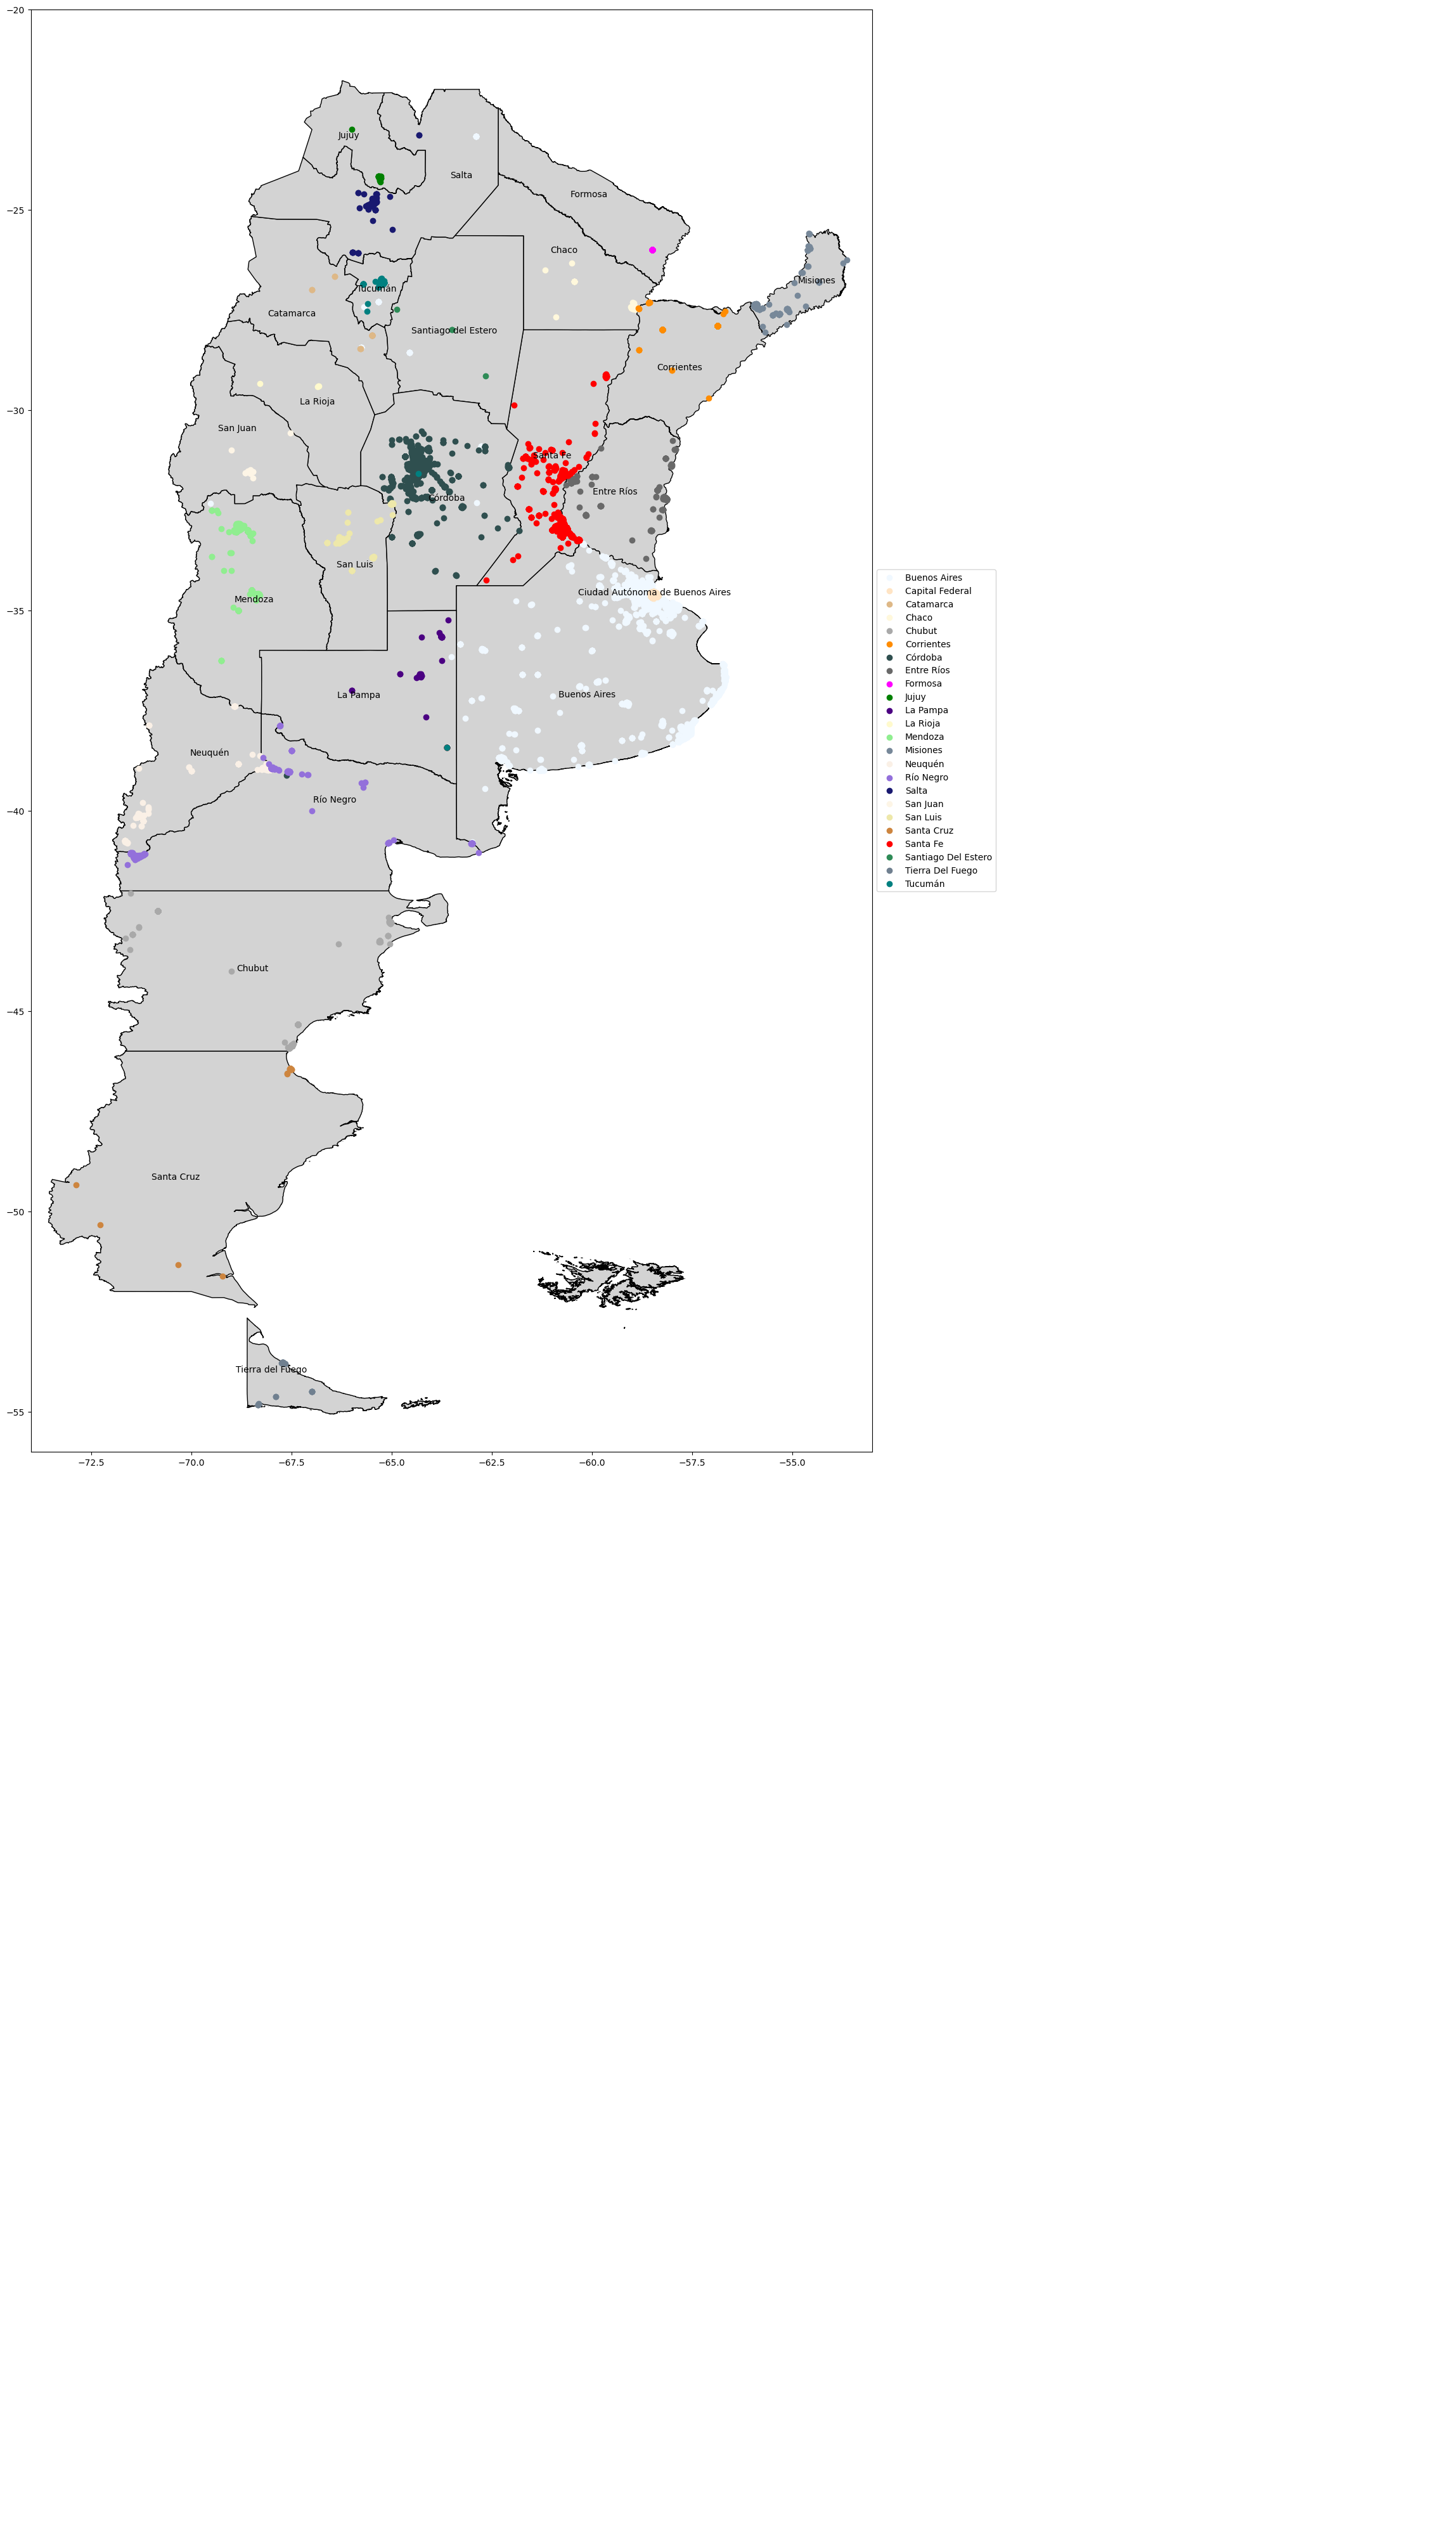

In [12]:


graph_map(data[['lat_new','lon_new','state_name']])

También ocurre que algunas combinaciones de latitudes y longitudes aparecen repetidas en distintas provincias

In [13]:
masktest=data['lat_new'].notnull()
mask_newplace3null=data.new_place_3==''
masktest2=masktest&mask_newplace3null
data_test=data.loc[masktest2]
data_test.head(10)
def cant_unicos(x):
    return len(x.unique())
data.pivot_table(values='state_name', index='lat-lon',aggfunc=(cant_unicos,'count')).sort_values(by='cant_unicos',ascending=False).head(8) # Es más rapida la funcion definida que pd.Series.nunique

,cant_unicos,count
lat-lon,,
"-38.416097,-63.616672",17,109
"-34.577168,-58.538654",3,65
"-32.9292332,-60.6658259",2,4
"-34.5759506,-58.5372696",2,3
"-34.5368014,-58.466784",2,2
"-34.6344961,-58.3631337",2,13
"-34.658242,-58.5116905",2,2
"-34.6426881,-58.5580166",1,1


La idea es usar los datos geográficos geonamesid y lat-lon par acompletar los lugares y viceversa
Primero pruebo con los geonamesid, filtro las que no tengan newplace 3 y que tengan geonameid 
Haciendo eso se ve que los valores de geonames_id solo muestran la provincia ya que se repiten en la misma provincia, no agregan información de la locación en estos casos

In [14]:


mask_newplace3null=data.new_place_3==''
mask_geonamesnotnull=data.geonames_id.notnull()
mask=mask_newplace3null&mask_geonamesnotnull
mask.value_counts()
analisis_newplace3=data.loc[mask,['state_name','geonames_id']]
analisis_newplace3['combinacion']=analisis_newplace3.state_name + \
'|' + analisis_newplace3.geonames_id.astype(str)
display(pd.Series(analisis_newplace3['combinacion'].unique()).sort_values())

6     Bs.As. G.B.A. Zona Norte|3435907.0    
5     Bs.As. G.B.A. Zona Oeste|3435907.0    
1     Bs.As. G.B.A. Zona Sur|3435907.0      
16    Buenos Aires Costa Atlántica|3435907.0
3     Buenos Aires Interior|3435907.0       
0     Capital Federal|3433955.0             
15    Catamarca|3862286.0                   
23    Chaco|3861887.0                       
12    Chubut|3861244.0                      
22    Corrientes|3435214.0                  
4     Córdoba|3860255.0                     
21    Jujuy|3853404.0                       
17    La Pampa|3849574.0                    
20    La Rioja|3848949.0                    
9     Mendoza|3844419.0                     
10    Misiones|3430657.0                    
19    Neuquén|3843122.0                     
11    Río Negro|3838830.0                   
7     Salta|3838231.0                       
8     San Juan|3837152.0                    
14    San Luis|3837029.0                    
2     Santa Fe|3836276.0                    
13    Sant

Ya que los geonames_id no sirven para completar la tercer columna de los lugares se dispuso a utilizar la latitud y longitud informada para obtener la infromacion de la ubicación.
Como se vio antes algunos puntos contienen la provincia mal por lo que se filtra por País y provincia para luego aplicar la ciudad/pueblo/villa que contiene la información traida ya sea por URL o utilizando Nominatim de geopy.geocoders.
<p>
Este método si bien completa 1295 filas de las 4780 vacías tarda aproximadamente 18 minutos y es dependiente de la respuesta del servidor del servicio por lo que se descarta y se busca otro método. También como se comentó, hay una pequeña cantidad de lat-lon que aparece repetida en distintas provincias

Se propone utilizar la ciudad más cercana con información que esté en la misma provincia como ciudad para las filas que estén vacías. Esta estrategia es adoptable también para las columnas restantes de lugares que tienen una gran cantidad de nullos, se hará si se considera útil realizarlo más adelante. Con el método utilizado se completan 4716 filas de las 4780 que no tenían información.

In [15]:
def get_ciudad_cercana(data,lat,lon,state):
    data['dif']=np.sqrt((lat-data['lat_new'])**2 + (lon-data['lon_new'])**2)
    mask=(data.state_name==state) & (data.new_place_3!='')
    try:
        ind=data.loc[mask].index[data.loc[mask,'dif']==data.loc[mask,'dif'].min()].tolist()[0]
        return data.loc[ind,'new_place_3']
    except:
        return ''

def llenado_new_place_3_ciudad_cercana(data):
    mask_newplace3null=data.new_place_3==''
    mask_latnotnull=data.lat_new.notnull()
    mask=mask_newplace3null&mask_latnotnull
    
    analisis_newplace3=data.loc[mask,['state_name','lat_new','lon_new']]
    analisis_newplace3['combinacion']=analisis_newplace3.state_name + \
    '|' + analisis_newplace3.lat_new.astype(str) + \
    '|' + analisis_newplace3.lon_new.astype(str)
    display(pd.Series(analisis_newplace3['combinacion'].unique()).sort_values())
    # En este caso si las coordenadas geograficas tienen información. Recupero la información
    data['new_place_3_filled']=data['new_place_3']
    numpy_vect=np.vectorize(get_ciudad_cercana)
    
    data.loc[mask,'new_place_3_filled']=data.loc[mask].apply(lambda x : get_ciudad_cercana(data,x['lat_new'], \
                                                       x['lon_new'],x['state_name']) if x['new_place_3']=='' else  x['new_place_3'],axis=1)
    print(f"se lograron completar : {(data['new_place_3']=='').sum()-(data['new_place_3_filled']=='').sum()} \
    filas de {(data['new_place_3']=='').sum()} vacias") #se lograron completar : 1351 filas de 4780 vacias
    return data

data=llenado_new_place_3_ciudad_cercana(data)

523    Bs.As. G.B.A. Zona Norte|-34.4689983|-58.6818304
222    Bs.As. G.B.A. Zona Norte|-34.4845387|-58.6401779
521    Bs.As. G.B.A. Zona Norte|-34.5332202|-58.7024332
14     Bs.As. G.B.A. Zona Norte|-36.0|-60.0            
335    Bs.As. G.B.A. Zona Oeste|-34.5839138|-58.5714856
                             ...                       
578    Tucumán|-26.8390286|-65.2262976                 
572    Tucumán|-26.8402437|-65.2085885                 
172    Tucumán|-26.8746762|-65.2167895                 
6      Tucumán|-31.5861035207|-64.333709               
114    Tucumán|-38.416097|-63.616672                   
Length: 755, dtype: object

se lograron completar : 4716     filas de 4780 vacias


Se considera que la ciudad (barrio en el caso de Capital federal) sería suficiente para poder cotizar una propiedad. En caso de impresición en las predicciones se considerará completar más la columna new_place_4 (llevada a un 48% de nulos con la misma estrategia que la columna new_place_3) y/o new_place_5. Por ahora serán descartadas por tener demasiados nulos

In [16]:
def DF_new_place_4_5(data):
    columns_to_drop=['new_place_4','new_place_5']
    data.drop(columns_to_drop,axis=1,inplace=True)
    return data

data=DF_new_place_4_5(data)

Se descartan las columnas que ya no serán utilizadas

In [17]:
columns_to_drop=['geonames_id','lat-lon','new_place_3','Place_geonames_id','dif']
data.drop(columns_to_drop,axis=1,inplace=True)

Se cambian las columnas de new_place_3_filled a None para poder ser contadas como nulls

In [18]:
data.loc[data.new_place_3_filled=='','new_place_3_filled']=None

A continuación se analizan las columnas de precios.

c:\Users\60061347\AppData\Local\anaconda3\envs\diego\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\60061347\AppData\Local\anaconda3\envs\diego\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\60061347\AppData\Local\anaconda3\envs\diego\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\60061347\AppData\Local\anaconda3\envs\diego\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\60061347\AppData\Local\anaconda3\envs\diego\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Us

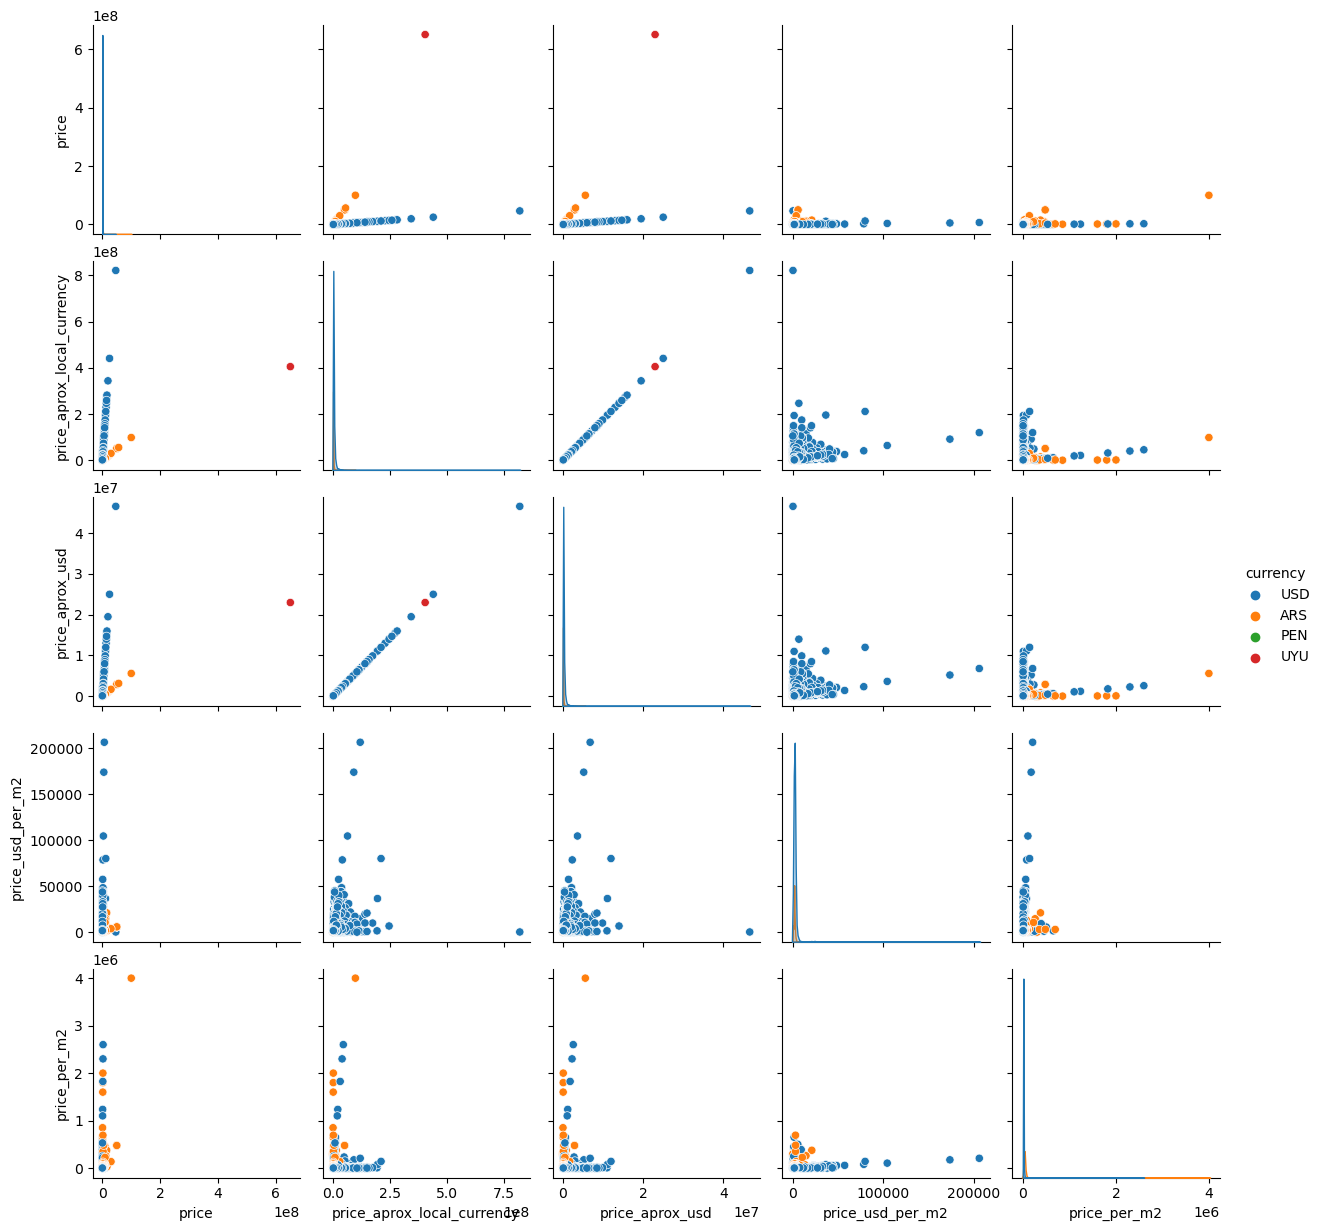

In [19]:
columnas_a_trabajar=['price','currency','price_aprox_local_currency','price_aprox_usd','price_usd_per_m2','price_per_m2']
sns.pairplot(data[columnas_a_trabajar],hue='currency')

In [20]:

data[columnas_a_trabajar].head()
#Se ven 4 tipos de currency, como el mercado suele moverse en dolares
#se intentará quedarse solo con valores en dolares.
print(data["currency"].value_counts())
# se verifica que los preicos en pesos y en dolares de las monedas que aparecen más de una vez sean consitentes
for i in data["currency"].unique():
    print (i)
    print((data.loc[data.currency==i,'price']/data.loc[data.currency==i,'price_aprox_usd']).describe())

# se ve consistencia en Pesos Argentinos y soles peruanos mientras que en Pesos uruguayos
# solo hay una medición. se verifica que todas sean null en el mismo lugar y si lo es,
# se descartarán price aprox local currency y price para dejar solo el preico en dolares
masks={}
for i in columnas_a_trabajar:
    masks[i]=data[f'{i}'].isnull()

print((masks['price']==masks['price_aprox_usd']).value_counts())
print((masks['price']==masks['currency']).value_counts())
mask_test=(masks['price'])!= (masks['currency'])
print(data.loc[mask_test,['price']])
# el unico valor que no coinciden es un precio en 0, por lo que se decide descartar las columnas currency
# y price local currency

columns_to_drop=['price','currency','price_aprox_local_currency']





USD    87587
ARS    13219
PEN    2    
UYU    1    
Name: currency, dtype: int64
USD
count    87587.0
mean     1.0    
std      0.0    
min      1.0    
25%      1.0    
50%      1.0    
75%      1.0    
max      1.0    
dtype: float64
nan
count    0.0
mean    NaN 
std     NaN 
min     NaN 
25%     NaN 
50%     NaN 
75%     NaN 
max     NaN 
dtype: float64
ARS
count    13219.000000
mean     17.814183   
std      0.102316    
min      17.143000   
25%      17.830500   
50%      17.830501   
75%      17.830502   
max      17.830531   
dtype: float64
PEN
count    2.000000e+00
mean     3.244000e+00
std      3.916455e-08
min      3.244000e+00
25%      3.244000e+00
50%      3.244000e+00
75%      3.244000e+00
max      3.244000e+00
dtype: float64
UYU
count    1.000 
mean     28.285
std     NaN    
min      28.285
25%      28.285
50%      28.285
75%      28.285
max      28.285
dtype: float64
True    121220
dtype: int64
True     121219
False    1     
dtype: int64
      price
9761  0.0  


Ahora se suman las columnas superficie y superficie cubiertas para entender la relación

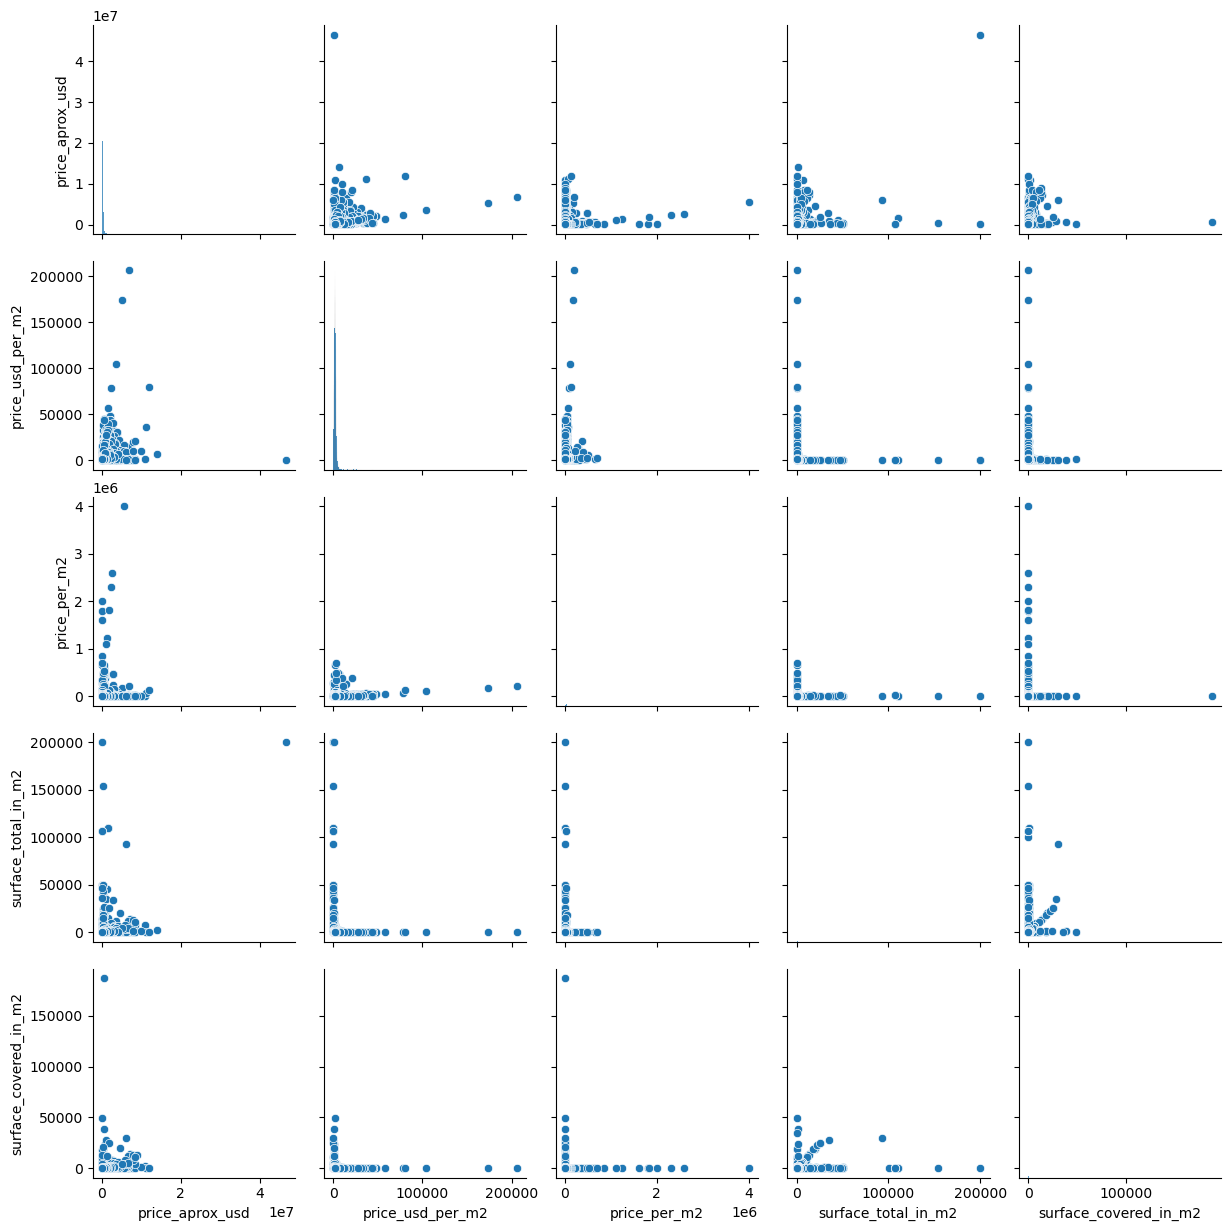

In [21]:

columnas_a_trabajar=['price_aprox_usd','price_usd_per_m2','price_per_m2','surface_total_in_m2','surface_covered_in_m2']
sns.pairplot(data[columnas_a_trabajar])

In [22]:

# como solo nos importan los que tienen precios inculímos en las máscaras
masks={}
for i in columnas_a_trabajar:
    print(f"min de {i}: {data[f'{i}'].min()}")
    # vemos que hay 0 que no son contados como nulos, los pasamos a nulos
    mask_to_nan=data[f'{i}']<1
    data.loc[mask_to_nan,f'{i}']=np.NaN

for i in columnas_a_trabajar:
    masks[i]=((data[f'{i}'].isnull()) & (data['price_aprox_usd'].notnull()))

# vemos que la superfice total está relacionada con el precio por m2 en dolares 
# y la cubierta con el precio por metro cuadrado
print((masks['surface_total_in_m2']==masks['price_usd_per_m2']).value_counts())
print((masks['surface_covered_in_m2']==masks['price_per_m2']).value_counts())    

data['price_aprox_calc_total']=data['surface_total_in_m2']*data['price_usd_per_m2']
data['price_aprox_calc_covered']=data['surface_covered_in_m2']*data['price_per_m2']

print((data['price_aprox_calc_covered']-data['price_aprox_usd']).describe())
print((data['price_aprox_calc_total']-data['price_aprox_local_currency']).describe())
mask_ars=data['currency']=='ARS'
print((data.loc[mask_ars,'price_aprox_calc_covered']-data.loc[mask_ars,'price']).describe())

#el price_per_m2 parece estar calculado con la moneda informada en currency
# como decidimos solo utilizar la del precio en dolares se utilizará las columnas price_usd_per_m2 y superficie total.

columns_to_drop.append('price_per_m2')   
columns_to_drop.append('price_aprox_calc_covered')   
columns_to_drop.append('price_aprox_calc_total')     




min de price_aprox_usd: 0.0
min de price_usd_per_m2: 0.6
min de price_per_m2: 1.5102040816326532
min de surface_total_in_m2: 0.0
min de surface_covered_in_m2: 0.0
True     121219
False    1     
dtype: int64
True    121220
dtype: int64
count    8.765800e+04
mean     2.112632e+05
std      8.861718e+05
min     -3.725290e-09
25%      0.000000e+00
50%      0.000000e+00
75%      1.455192e-11
max      9.439163e+07
dtype: float64
count    6.861600e+04
mean    -4.161735e+06
std      6.440333e+06
min     -7.747257e+08
25%     -4.660460e+06
50%     -2.496675e+06
75%     -1.547938e+06
max     -7.767355e+04
dtype: float64
count    1.042800e+04
mean    -1.828060e-12
std      3.170553e-10
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.725290e-09
dtype: float64


Se cambian los nombres de las columnas creadas para ser más claras. 

In [23]:
columns_renamed = {'lat_new':'latitude','lon_new':'longitude','new_place_3_filled':'Place'}
data.rename(columns=columns_renamed, inplace = True)




Finalmente se descartan las columnas que no se consideran utiles

In [24]:
data.drop(columns_to_drop,axis=1,inplace=True)
columns_to_drop=[]

## Análisis de columnas con superficies

Para el análisis quiero trabajar con las columnas:
- m2 totales
- m2 cubiertos
- title
- description

Defino columnas de trabajo

In [25]:
columnas_de_trabajo = ['surface_total_in_m2', 'surface_covered_in_m2', 'title', 'description']
data_m2 = data[columnas_de_trabajo]
data_m2.head(5)

,surface_total_in_m2,surface_covered_in_m2,title,description
0,55.0,40.0,2 AMB TIPO CASA SIN EXPENSAS EN PB,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
1,NaN,NaN,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
2,55.0,55.0,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
3,NaN,NaN,PH 3 amb. cfte. reciclado,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
4,35.0,35.0,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."


Se utilizan métodos describe e info para obtener información de estas columnas

In [26]:
data_m2.describe()

,surface_total_in_m2,surface_covered_in_m2
count,81509.000000,101311.000000
mean,234.893901,133.052808
std,1786.332276,724.358387
min,10.000000,1.000000
25%,50.000000,45.000000
50%,84.000000,75.000000
75%,200.000000,150.000000
max,200000.000000,187000.000000


In [27]:
data_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   surface_total_in_m2    81509 non-null   float64
 1   surface_covered_in_m2  101311 non-null  float64
 2   title                  121220 non-null  object 
 3   description            121218 non-null  object 
dtypes: float64(2), object(2)
memory usage: 9.6+ MB


## Tratamiento de valores nulos

### Cálculo del porcentaje de valores nulos

Se determinan la cantidad de nulos de cada columna

In [28]:
cuenta_nulos = data_m2.isnull().sum()
cuenta_nulos

surface_total_in_m2      39711
surface_covered_in_m2    19909
title                    0    
description              2    
dtype: int64

y el total de registros

In [29]:
cuenta_total_registros = len(data_m2)
cuenta_total_registros

121220

Se indica porcentaje de nulos

In [30]:
ratio_nulos = cuenta_nulos/cuenta_total_registros*100
ratio_nulos

surface_total_in_m2      32.759446
surface_covered_in_m2    16.423857
title                    0.000000 
description              0.001650 
dtype: float64

**El campo con mayor cantidad de nulos corresponde a m2 total (32%), seguido por m2 cubiertos (16%)**

Se determina la cantidad de registros que tienen una o ambas columnas con valores nulos

In [31]:
mask_or_nulos = data_m2['surface_total_in_m2'].isnull() | data_m2['surface_covered_in_m2'].isnull()

In [32]:
data_or_nulos = data_m2 [mask_or_nulos]
data_or_nulos.shape[0]

46868

**Un total de 46.866 registros de 121.220 tienen nulos en uno o ambas columnas**

In [33]:
ratio_nulos_or = len(data_or_nulos)/len(data_m2)
ratio_nulos_or

0.38663586866853655

**Lo que da un ratio de 39% de registros en estas condiciones**

### Uso de RegEx

Queremos usar disintas regex para:
- Extraer strings coincidentes con lo que buscamos (ej. "100 m² totales") de la columna description
- Extraer de estas strings los valores numéricos (ej. 100)

Comenzamos con las primeras para extraer las strings:

In [34]:
metros_cubiertos_regex = r'(\d+[\.,]?\d*\s?m[²2ets]\s*cub)'

metros_totales_regex = r'(\d+[\.,]?\d*\s?m[²2ets]\s*tot)'



Estas regex buscan patrones que contengan una secuencia de dígitos seguida opcionalmente por un espacio opcional, luego 'm', 'M', '²', 'ms', 'met' o 'mts', seguido por más espacios (opcionalmente), y 
finalmente la palabra "tot". Esto será útil para encontrar patrones como "100 m² totales", "50M2 totales", o "80m tot".
También contempla el uso de puntos o comas como separadores de decimales

Se crean copias auxiliares de las columnas de m2 totales y cubiertas

In [35]:
data['surface_covered_in_m2_rellenada'] = data['surface_covered_in_m2']
data['surface_total_in_m2_rellenada'] = data['surface_total_in_m2']

Se reemplazan los nulos, en ambas columnas, con las strings extraídas de description (solo donde los registros originales son nulos)

In [36]:
data.loc[data['surface_covered_in_m2_rellenada'].isnull(), 'surface_covered_in_m2_rellenada'] = data.loc[data['surface_covered_in_m2_rellenada'].isnull(), 'description'].str.extract(metros_cubiertos_regex, flags=re.IGNORECASE, expand=False)
data.loc[data['surface_total_in_m2_rellenada'].isnull(), 'surface_total_in_m2_rellenada'] = data.loc[data['surface_total_in_m2_rellenada'].isnull(), 'description'].str.extract(metros_totales_regex, flags=re.IGNORECASE, expand=False)

In [37]:
data.loc[data['surface_covered_in_m2_rellenada'].isnull(), 'surface_covered_in_m2_rellenada'].value_counts()

Series([], Name: surface_covered_in_m2_rellenada, dtype: int64)

Usaremos esta regex para extraer los dígitos de las strings

In [38]:
digits_regex = r'(\d+[\.,]?\d*)'

Creamos las columnas extracted_numbers para total y cubiertas (albergarán los dígitos extraídos de las strings). Luego las columnas combined_values, que mostrará la combinación entre los registros que originalmente tenían valores y los que fueron completados por las regex

In [39]:
# Extraer los números de 'surface_covered_in_m2_rellenada'
data['extracted_numbers_covered'] = data['surface_covered_in_m2_rellenada'].str.extract(digits_regex)

# Convertir los números extraídos a tipo float
data['extracted_numbers_covered'] = pd.to_numeric(data['extracted_numbers_covered'], errors='coerce')

# Combinar los valores originales con los extraídos
data['combined_values_covered'] = data.apply(lambda row: row['extracted_numbers_covered']
                                     if not pd.isnull(row['extracted_numbers_covered'])
                                     else row['surface_covered_in_m2'], axis=1)

data['combined_values_covered'].head(5)

0    40.0
1   NaN  
2    55.0
3   NaN  
4    35.0
Name: combined_values_covered, dtype: float64

In [40]:
# Extraer los números de 'surface_total_in_m2_rellenada'
data['extracted_numbers_total'] = data['surface_total_in_m2_rellenada'].str.extract(digits_regex)

# Convertir los números extraídos a tipo float
data['extracted_numbers_total'] = pd.to_numeric(data['extracted_numbers_total'], errors='coerce')

# Combinar los valores originales con los extraídos
data['combined_values_total'] = data.apply(lambda row: row['extracted_numbers_total']
                                     if not pd.isnull(row['extracted_numbers_total'])
                                     else row['surface_total_in_m2'], axis=1)

data['combined_values_total'].head(5)

0    55.0
1   NaN  
2    55.0
3   NaN  
4    35.0
Name: combined_values_total, dtype: float64

In [41]:
data['combined_values_covered'].describe()

count    101699.000000
mean     137.426927   
std      1502.662556  
min      1.000000     
25%      45.000000    
50%      75.000000    
75%      150.000000   
max      420180.000000
Name: combined_values_covered, dtype: float64

In [42]:
data['combined_values_total'].describe()

count    81886.000000 
mean     234.736749   
std      1782.462172  
min      1.100000     
25%      50.000000    
50%      84.000000    
75%      200.000000   
max      200000.000000
Name: combined_values_total, dtype: float64

In [43]:
columnas_de_trabajo_v3 = ['surface_total_in_m2', 'surface_covered_in_m2', 'title','surface_covered_in_m2_rellenada','surface_total_in_m2_rellenada','extracted_numbers_covered','combined_values_covered','extracted_numbers_total','combined_values_total']

In [44]:
data_m2_v3 = data [columnas_de_trabajo_v3]
mascara_en = data_m2_v3['extracted_numbers_covered'].notnull() | data_m2_v3['extracted_numbers_total'].notnull()
data_con_numeros = data_m2_v3[mascara_en]
data_con_numeros.head(5)

,surface_total_in_m2,surface_covered_in_m2,title,surface_covered_in_m2_rellenada,surface_total_in_m2_rellenada,extracted_numbers_covered,combined_values_covered,extracted_numbers_total,combined_values_total
137,NaN,126.0,PH al frente para reciclar: excelente oportunidad!,126,133 m2 tot,NaN,126.0,133.0,133.0
675,NaN,NaN,VIVINEDA CON LOCAL / CHALET 3 AMB C/GARAGE DOBLE,190 M2 CUB,NaN,190.0,190.0,NaN,NaN
869,NaN,83.0,ENTREGA 09/2017 3 AMB+COCHERA+BAULERA+AMENITIES,83,84 m2 tot,NaN,83.0,84.0,84.0
873,NaN,NaN,Casa de 3 Dormitorios y cochera en Barrio Candioti,164 m2 cub,NaN,164.0,164.0,NaN,NaN
1017,NaN,NaN,"CASA VENTA NUEVA ESPORA BAHIA BLANCA. CASA EN VENTA. 5 AMB., 2 DORM., 1 BAÑOS - 150 M2., 77 M2 CUB.",77 M2 CUB,NaN,77.0,77.0,NaN,NaN


Posibles mejoras:
 - Que no considere esas publicaciones que en la descripción empiezan con "Corredor Responsable:"las descripciones son desordenadas, tienen un montón de medidas distintas, incluso sumandolas incurriríamos en un error"
 - Que sume todas las instancias de m2 cubiertos y totales

In [45]:
data_m2_v3.describe()

,surface_total_in_m2,surface_covered_in_m2,extracted_numbers_covered,combined_values_covered,extracted_numbers_total,combined_values_total
count,81509.000000,101311.000000,388.000000,101699.000000,377.000000,81886.000000
mean,234.893901,133.052808,1279.556804,137.426927,200.759682,234.736749
std,1786.332276,724.358387,21323.679008,1502.662556,436.378155,1782.462172
min,10.000000,1.000000,1.000000,1.000000,1.100000,1.100000
25%,50.000000,45.000000,69.000000,45.000000,57.000000,50.000000
50%,84.000000,75.000000,120.000000,75.000000,90.000000,84.000000
75%,200.000000,150.000000,238.500000,150.000000,180.000000,200.000000
max,200000.000000,187000.000000,420180.000000,420180.000000,6233.000000,200000.000000


Para disminuir el porcentaje de nulos, unificamos los valores de superficie en una sola columna, que llamaremos 'combined_values'.
Comenzamos por copiar en esta columna la de 'combined_values_cubiertos', ya que es la que tiene menor cantidad de nulos

In [46]:
data['combined_values'] = data['combined_values_covered']

Llenamos los valores faltantes en 'combined_values' con los de 'combined_values_total'

In [47]:
data['combined_values'].fillna(data['combined_values_total'], inplace=True)

Visualizamos el nuevo subset:

In [48]:
columnas_de_trabajo_v4 = ['surface_total_in_m2', 'surface_covered_in_m2', 'title', 'description','surface_covered_in_m2_rellenada','surface_total_in_m2_rellenada','extracted_numbers_covered','combined_values_covered','extracted_numbers_total','combined_values_total','combined_values']

In [49]:
data_m2_v4 = data [columnas_de_trabajo_v4]
mascara_en = data_m2_v4['extracted_numbers_covered'].notnull() | data_m2_v4['extracted_numbers_total'].notnull()
data_con_numeros = data_m2_v4[mascara_en]
data_con_numeros.head(5)

,surface_total_in_m2,surface_covered_in_m2,title,description,surface_covered_in_m2_rellenada,surface_total_in_m2_rellenada,extracted_numbers_covered,combined_values_covered,extracted_numbers_total,combined_values_total,combined_values
137,NaN,126.0,PH al frente para reciclar: excelente oportunidad!,"Corredor Responsable: Jose Guendler - C.U.C.I.C.B.A 811Contacto: Eleonora Pandolfelli - MLS ID # 281082-83Venta en block de 2 unidades independientes al frente, planta baja y 1° piso, en pleno Colegiales, a 4 cuadras de Av. Federico Lacroze y 2 de Av. Alvarez Thomas. Oportunidad para unificar y reciclar!! En la planta baja son 63 m2 cubiertos y en el primer piso otros 63 m2 cubiertos + 4 m2 descubiertos de patio + 26 m2 de terraza. Pueden proyectarse una Planta Baja con living comedor, cocina, baño completo y estudio y una Planta Alta con 3 dormitorios, uno con baño en suite + otro baño completo. Ambos departamentos tienen actualmente baños y cocinas en muy buen estado. La propiedad no presenta problemas estructurales ni de humedad. No paga expensas. Según escritura son 63 m2 cubiertos y 133 m2 totales. La construcción de la planta alta no figura en escritura. No es apto crédito. Para màs información comunicate con nosotros!",126,133 m2 tot,NaN,126.0,133.0,133.0,126.0
675,NaN,NaN,VIVINEDA CON LOCAL / CHALET 3 AMB C/GARAGE DOBLE,"VIVINEDA CON LOCAL / CHALET 3 AMB consta de COCINA COMEDOR, DOS DORMITORIOS, BAÑO, LAVADERO Y PATIO / LOCAL 3,50 X 7 M2, C/ GGE DOBLE, BAÑO VIDRIERA Y PERSIANA METALICA, CUENTA C/ESP AÉREO 70 M2, POSIB DE AMPLIACION, 190 M2 CUBTOS, Z/CHAMPAGNAT Y COLON / ESCUCHA PROPUESTAS / CONSULTE SU VALOR CEABE PROPIEDADES RIVADAVIA Nº 4702 TEL 0223 472-5034 / 0223 474-2703 / CEL 0223 156-84-5773 / 0223 156-81-9998 /",190 M2 CUB,NaN,190.0,190.0,NaN,NaN,190.0
869,NaN,83.0,ENTREGA 09/2017 3 AMB+COCHERA+BAULERA+AMENITIES,"Corredor Responsable: Raul Hector Merlo - CUCICBA 2407Contacto: Adrián G. Díaz - MLS ID # 68 DEPARTAMENTOS DE 3 AMBIENTES CON COCHERAS FIJAS Y BAULERAS En el corazón del barrio de Coghlan, cerca de importantes accesos y avenidas de la Ciudad en un entorno que combina naturaleza y espacios abiertos. Edificio de viviendas de cuidado diseño, con planta baja libre, acceso a cocheras, espacio guarda bicicletas y bauleras. Balcones aterrazados integrados al living de cada unidad a través de amplios ventanales corredizos. Las unidades están desarrolladas en sentido frente-contrafrente, logrando de esta manera ventilación cruzada, óptimas visuales e inmejorables condiciones de iluminación. En la terraza del 5º piso, espacios comunes: piscina, solarium, parrilla y SUM. -CALEFACCIÓN POR LOSA RADIANTE INDIVIDUAL -TERMINACIONES, GRIFERÍAS Y ARTEFACTOS DE PRIMERA CALIDAD -SOLARIUM, DECK, PISCINA y SUM -ASCENSOR DE ULTIMA GENERACION -PORTON AUTOMATICO REMOTO -APTO PROFESIONAL 3 AMBIENTES AL FRENTE - 84 m2 totales con cochera y baulera. 2° Piso ""A"". Living Comedor, dos dormitorios, dos baños completos, balcón. Superficies: Cubierta: 76 m2. Balcón: 8 m2. Total: 84 m2 *LAS MEDIDAS SEÑALADAS SON APROXIMADAS. LAS DEFINITIVAS SURGIRÁN DEL PLANO DE AGRIMENSURA Y DE SUBDIVISIÓN. CONSULTAR OTRAS UNIDADES. ULTIMAS DISPONIBLES Especificaciones Técnicas Construcción: Estructura de hormigón armado. Doble pared exterior de ladrillo visto con cámara de aire. Muros interiores de yeso pintado. Cielorrasos de hormigón visto (opcional pintado). Pisos y Revestimientos: Living - comedor y dormitorios ""prefinish"" marca PATAGONIAN FLOORING o similar. Baños y cocinas de Porcelanato natural marca SAN LORENZO o similar. Cerámica blanca de 30 cm x 60 cm (mate en cocinas, brillante en baños) marca SAN LORENZO o similar. Equipamiento de baños: Artefactos sanitarios de loza blanca marca FERRUM o similar. Griferías cromadas mono comando marca FV o similar. Equipamiento de cocinas y lavaderos: Muebles enchapados en laminado plástico interior y exterior. Mesada granito con bacha doble de acero inoxidable marca JOHNSON o similar. Grifería mono coma

In [50]:
data_m2_v4.describe()

,surface_total_in_m2,surface_covered_in_m2,extracted_numbers_covered,combined_values_covered,extracted_numbers_total,combined_values_total,combined_values
count,81509.000000,101311.000000,388.000000,101699.000000,377.000000,81886.000000,108796.000000
mean,234.893901,133.052808,1279.556804,137.426927,200.759682,234.736749,142.822214
std,1786.332276,724.358387,21323.679008,1502.662556,436.378155,1782.462172,1590.719720
min,10.000000,1.000000,1.000000,1.000000,1.100000,1.100000,1.000000
25%,50.000000,45.000000,69.000000,45.000000,57.000000,50.000000,45.000000
50%,84.000000,75.000000,120.000000,75.000000,90.000000,84.000000,75.000000
75%,200.000000,150.000000,238.500000,150.000000,180.000000,200.000000,150.000000
max,200000.000000,187000.000000,420180.000000,420180.000000,6233.000000,200000.000000,420180.000000


In [51]:
ratio_nulos_v4 = data_m2_v4.isnull().sum()/len(data_m2_v4)
ratio_nulos_v4

surface_total_in_m2                0.327594
surface_covered_in_m2              0.164239
title                              0.000000
description                        0.000016
surface_covered_in_m2_rellenada    0.160823
surface_total_in_m2_rellenada      0.323833
extracted_numbers_covered          0.996799
combined_values_covered            0.161038
extracted_numbers_total            0.996890
combined_values_total              0.324484
combined_values                    0.102491
dtype: float64

**Utilizando la columna 'combined_values' tendríamos que quitar 12.046 registros nulos (10% del dataset) conservando 109.174 registros con valores**
<p>
finalmente se descartan las columnas extras creadas para el análisis

In [52]:
data.columns

Index(['property_type', 'state_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'description', 'title', 'image_thumbnail', 'latitude',
       'longitude', 'Place', 'surface_covered_in_m2_rellenada',
       'surface_total_in_m2_rellenada', 'extracted_numbers_covered',
       'combined_values_covered', 'extracted_numbers_total',
       'combined_values_total', 'combined_values'],
      dtype='object')

In [53]:
columns_to_drop=['surface_covered_in_m2_rellenada', 'surface_total_in_m2_rellenada',
       'extracted_numbers_covered', 'combined_values_covered',
       'extracted_numbers_total', 'combined_values_total',
        'surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2']
data.drop(columns_to_drop,axis=1,inplace=True)
data.rename(columns = {'combined_values':'Sup_filled'}, inplace = True) 

# Tratamiento de columna rooms

### Análisis de cuántos nulos hay y qué columnas se pueden usar a la hora de limpiar

In [54]:
#vemos cuantos nulos hay en rooms 
nulos_rooms_alprincipio = data.rooms.isnull().sum()
print(f'cantidad de nulos al comienzo: {nulos_rooms_alprincipio}')

#vemos qué porcentaje representa esta cantidad
perc_nulos_total_filas_rooms=(nulos_rooms_alprincipio/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas_rooms,"%")

cantidad de nulos al comienzo: 73830
Porcentaje de nulos sobre total de filas: 60.91 %


In [55]:
#Hacemos una copia de la columna rooms en copy_rooms para guardar ahí los datos que vayamos limpiando sin modificar la columna original 
data['copy_rooms'] = data['rooms']

Vemos si hay outliers en esta columa


In [56]:
data['copy_rooms'].describe()

count    47390.000000
mean     3.080840    
std      1.860773    
min      1.000000    
25%      2.000000    
50%      3.000000    
75%      4.000000    
max      32.000000   
Name: copy_rooms, dtype: float64

In [57]:
data['copy_rooms'].value_counts() 


3.0     12567
2.0     12433
4.0     7937 
1.0     7377 
5.0     3782 
6.0     1403 
7.0     770  
8.0     409  
10.0    226  
9.0     184  
11.0    72   
12.0    65   
13.0    33   
14.0    27   
15.0    26   
17.0    16   
16.0    11   
20.0    11   
22.0    8    
18.0    6    
21.0    5    
30.0    4    
25.0    4    
19.0    4    
32.0    3    
23.0    2    
24.0    1    
27.0    1    
29.0    1    
31.0    1    
28.0    1    
Name: copy_rooms, dtype: int64

In [58]:
#vemos que hay outliers lo filtramos con el criterio de que sea mayor que el tercer cuartil mas 1.5 veces el ranfo intercuartil
#solo filtramos los mayores, porque el minimo es 0 o 1 habitacion y no se puede considerar outlier
rooms_count = data.groupby('copy_rooms')['copy_rooms'].count()
q1 = rooms_count.quantile(0.25)
q2 = rooms_count.quantile(0.50)
q3 = rooms_count.quantile(0.75)
q4 = rooms_count.quantile(1)

iqr = (q3 - q1) * 1.5
up = q3 + iqr

outlier_mask = rooms_count < up
outliers = rooms_count[outlier_mask]
outliers #veo que es desde 7 habitaciones a 32

#todos los que sean mayores a 6 se pasan a nulos
mascara_outliers = data.copy_rooms > 6
data.loc[mascara_outliers, 'copy_rooms'] = np.NaN
data['copy_rooms'].value_counts()

3.0    12567
2.0    12433
4.0    7937 
1.0    7377 
5.0    3782 
6.0    1403 
Name: copy_rooms, dtype: int64

In [59]:
#vemos que tanto la columna title y description pueden tener informacion que nos sirva para completar estas columna
print(data.description.head(2))
print(data.title.head(2))

0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).                                                                                                                                       
1    Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
Name: description, dtype: object
0    2 AMB TIPO

In [60]:
#Hacemos copia de title y lo pasamos a minuscula para que, en caso de que haya que modificar la columna, no modificar la original
data['copy_title'] = data['title'].str.lower()

data['copy_title']

0         2 amb tipo casa sin expensas en pb                                       
1         venta depto 2 dorm. a estrenar 7 e/ 36 y 37                              
2         2 amb 3er piso con ascensor apto credito                                 
3         ph 3 amb. cfte. reciclado                                                
4         depto 2 amb al contrafrente zona centro/plaza mitre                      
                                 ...                                               
121215    torre forum alcorta- impecable 3 ambientes                               
121216    ruca inmuebles | venta | lomas de san isidro | bergallo al 100           
121217    venta departamento ambiente divisible a estrenar balcon amenities.       
121218    2 amb. c/ dep. de servicio al contrafrente| reciclado| zona plaza colon .
121219    departamento apto profesional en el centro                               
Name: copy_title, Length: 121220, dtype: object

In [61]:
#Hacemos copia de descripcion y lo pasamos a minuscula para que, en caso de que haya que modificar la columna, no modificar la original
data['copy_description'] = data['description'].str.lower()

data['copy_description'].head(2)

0    2 ambientes tipo casa planta baja por pasillo, refaccionado a nuevo, patio grande, con lavadero, living comedor con cocina integrada, artefacto de cocina, alacena, baño completo, y dormitorio. todo en excelente estado, para habitar.no es apto credito aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).                                                                                                                                       
1    venta de departamento en décimo piso al frente, a estrenar. living comedor con ventanales hacia el balcón con pisos de madera. cocina completa con doble mesada, muebles bajo mesada. lavadero separado. toilette.dormitorio con placard. segundo dormitorio a dividir. calefacción por radiadorbaño completo.balcón corrido. posibilidad de cochera semicubierta. u$d 20.000                     aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).
Name: copy_description, dtype: object

### Se ve en titile y description muchas expresiones como 'un ambiente' 'dos domitorios'. Modificamos para que los números sean digitos

In [62]:
#antes de empezar podemos ver que en title y description hay expreisiones como 'dos ambientes' 'tres dormitorios' asi que reemplazamos por digitos
lista_num_str = [('un', '1'), ('dos', '2'), ('tres', '3'), ('cuatro', '4'), ('cinco', '5'), ('seis', '6'), ('siete', '7'), ('ocho', '8'), ('nueve', '9'), ('diez', '10')]
for item in lista_num_str:
    data['copy_title'] = data['copy_title'].apply(lambda x: x.replace(item[0], item[1]))
    data['copy_description'] = data['copy_description'].apply(lambda x: x if x is np.NaN else x.replace(item[0], item[1]))

### Tambien a lo largo de las limpiezas podemos ver muchas expresiones al estilo de '12mx12m 12,5m x 12,5m 12,5x12,5, 12x5 m x 12,5 m
Todas estas expresiones en esta busqueda particular para rooms no nos sirven, entonces buscamos eliminar esto que entorpece 

In [63]:
pattern_metros = '(\d+)(\.|\,)?(\d)(m|mtrs|mts)?(x)(\d+)(\.|\,)?(\d)(m|mtrs|mts)?'
regex_metros = re.compile(pattern_metros)
pattern_metros2 = '(\d+)(\.|\,)?(\d)(m|mtrs|mts)?\s(x)\s(\d+)(\.|\,)?(\d)(m|mtrs|mts)?'
regex_metros2 = re.compile(pattern_metros2)



data['copy_description'] = data['copy_description'].str.replace(pattern_metros, '', regex=True)
data['copy_title'] = data['copy_title'].str.replace(pattern_metros, '', regex=True)
data['copy_description'] = data['copy_description'].str.replace(pattern_metros2, '', regex=True)
data['copy_title'] = data['copy_title'].str.replace(pattern_metros2, '', regex=True)

### Buscando patrones en title para modificar rooms

Empezaremos buscando los números que se encuentren despues de expresiones como dormitorios/habitaciones y sus derivados en plural. Luego buscaremos monoambiente para reemplazar con 0 habitaciones y a los numeros antes de 'ambientes' y sus derivados le restamos 1 

In [64]:
#creamos un patron que encuentre un numero seguido de un espacio seguido de la palabra dormitorios en plural 
pattern_dormitorios = '(?P<numero>\d+)(?P<espacio>\s)(?P<dormitorios>dormitorios|dorm|dormi|dormi.|dorm.|habitaciones|habs|suites)'
dormitorios_regex = re.compile(pattern_dormitorios)

In [65]:
#mascara nulos en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_dormitorios = data.loc[mascara_nulos_copy_rooms, 'copy_title'].apply(lambda x: x if x is np.NaN else dormitorios_regex.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_dormitorios = match_dormitorios.notnull()

data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorios, 'copy_rooms'] = match_dormitorios[mascara_nulos_copy_rooms & no_nullos_dormitorios].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))


In [66]:
#vemos cuántos nulos sacamos 
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

3170

In [67]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorios, ['copy_title','copy_rooms']]

,copy_title,copy_rooms
1,venta depto 2 dorm. a estrenar 7 e/ 36 y 37,2
6,"muy buen ph al frente 2 dormitorios , patio, excelente ubicacion en m1ro",2
9,white 7637 - 2 dormitorios con patio,2
101,rosario - tucuman 3400 - venta dptos 1 dormitorio en construcción - inmgazze,1
102,rosario - tucuman 3400 - venta dptos 2 dormitorios en construcción - inmgazze,2
...,...,...
120956,av. francia 300 - departamento de 1 dormitorio en venta - rosario,1
120962,los lagos 4 dorm. escrit. pileta (170718),4
120966,casa de 3 dormitorios en residencial sur,3
121101,"casa a estrenar en san matias, 3 dormitorios y dependencia. maschwitz, escobar",3


In [68]:
#Buscamos ahora titulos que contengan la palabra ambientes y teniendo en cuenta que dormitorios son ambientes -1 completamos
#empezamos con la palabra monoambiente 
#creamos un patron que encuentre la palabra monoambiente
mascara_nulos_copy_rooms = data.copy_rooms.isnull()

monoamb_pattern = 'monoambiente'
regex_monoamb = re.compile(monoamb_pattern)

#buscamos en la columna de copy_descriptcion lo que haga match, sin tener en cuenta las filas que ya no son nulas en copy_rooms 
match_monoamb = data.loc[mascara_nulos_copy_rooms, 'copy_title'].apply(lambda x: x if x is np.NaN else regex_monoamb.search(x))

#mascara con no nulos (osea los que tengan la palabra monoambiente en la descripcion)
mask_no_null_monoamb = match_monoamb.notnull()

#en copy_rooms asignamos a los que hayan hecho match (usando la mascara) un 0 porque significa que no hay dormitorios
data.loc[mascara_nulos_copy_rooms & mask_no_null_monoamb, 'copy_rooms'] = 0


In [69]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

4749

In [70]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & mask_no_null_monoamb, ['copy_title','copy_rooms']]

,copy_title,copy_rooms
7,"jose hernandez 1400 monoambiente estrenar categoria , venta",0
309,monoambiente con balcón,0
494,"departamento monoambiente, cercano al monumento!",0
563,departamento monoambiente / venta / torre imperio / san miguel,0
855,"monoambiente divisible en venta en rosario, santa fe, argentina",0
...,...,...
119046,hermoso monoambiente divisible! en palermo hollywood,0
119078,depto monoambiente zona trib1ales frente a la m1icipalidad,0
119989,"monoambientes y 2 amb , salon de usos multiples, , lavadero,",0
120140,alquiler monoambiente en 51 entre 20 y 21,0


filtrando por ambientes tomando como regla general ambientes - 1 = dormitorios

In [71]:
#creamos un patron que encuentre un numero seguido de un espacio seguido de la palabra ambiente o amb 
pattern_ambientes = '(?P<numero>\d+)(?P<espacio>\s)(?P<ambientes>ambientes|amb)'
ambientes_regex = re.compile(pattern_ambientes)

In [72]:
#buscamos en la columna copy_description lo que matche con el patron anterior

mascara_nulos_copy_rooms = data.copy_rooms.isnull() 


match_ambientes = data.loc[mascara_nulos_copy_rooms, 'copy_title'].apply(lambda x: x if x is np.NaN else ambientes_regex.search(x))

#mascara para no nulos 
no_nullos_ambientes = match_ambientes.notnull()

#asignamos a la columna copy_rooms (filtrando con lo que hayan hecho match) el grupo 'numero' de los match que estaban guardados en match ambientes 
#dormitorios es cantidad de ambientes - 1, entonces pasamos a float y le restamos 1 
data.loc[mascara_nulos_copy_rooms & no_nullos_ambientes, 'copy_rooms'] = (match_ambientes[no_nullos_ambientes].apply(lambda x: x if x is np.NaN else x.group('numero'))).astype(float) -1 

In [73]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

14099

In [74]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_ambientes, ['copy_title','copy_rooms']]

,copy_title,copy_rooms
0,2 amb tipo casa sin expensas en pb,1
2,2 amb 3er piso con ascensor apto credito,1
3,ph 3 amb. cfte. reciclado,2
4,depto 2 amb al contrafrente zona centro/plaza mitre,1
8,"jose hernandez 1400 2 ambientes estrenar , categoria , venta",1
...,...,...
121138,venta con renta departamento de 2 ambientes a estrenar en saavedra - apto credito,1
121139,condominio a estrenar con amenities - departamento de 2/3 ambientes - mar del plata,2
121153,excelente departamento de 3 ambientes con terraza propia y parrilla,2
121215,torre forum alcorta- impecable 3 ambientes,2


### Tomando las mismas estrategias pero en la columna description, para limpiar rooms 

In [75]:
#limpiando por dormitorios

pattern_dormitorios = '(?P<numero>\d+)(?P<espacio>\s)(?P<ambientes>dormitorios|dorm|dormi|dormi\.|dorm\.|habitaciones|habs|suites)'
dormitorios_regex = re.compile(pattern_dormitorios)

#mascara nulos en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
#buscamos en la columna copy_description, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_dormitorios = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else dormitorios_regex.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_dormitorios = match_dormitorios.notnull()

data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorios, 'copy_rooms'] = match_dormitorios[mascara_nulos_copy_rooms & no_nullos_dormitorios].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [76]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

46705

In [77]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorios, ['copy_description','copy_rooms']].sample(3)

,copy_description,copy_rooms
98730,"depto/casa de 3 ambientes por pasillo, sobre la avenida h. yrigoyen a metros de la m1icipalidad de lanús.consta de living comedor, cocina, 2 dormitorios, baño completo, patio y terraza.para más consultas no dude en contactarnos, el código de la propiedad publicada es 40gx .gianni propiedades/5651av. h. yrigoyen 2699 lanús oeste",2
118044,tipología 3 ambientes.living comedor. 2 dormitorios (principal en suite). 2° baño.cocina integrada. patio.,2
78460,"ph interno :pb:chalet en ph interno, consta de living, comedor de diario, espacio cocina con muebles de bajo y sobrte mesada. lavadero y baño de recepcion. galeria semi cubierta. parrilla y piletapa: baño completo, 2 dormitorios, mas espacio escritorioamplio jardín excelente zonapermuta por depto 3amb con cochera centro de lomas de zamoraactualmente alquiladollamar con 2 días antelación",2


In [78]:
#Buscamos ahora descripciones que contengan la palabra monoambiente y teniendo en cuenta que dormitorios son ambientes -1 completamos
#empezamos con la palabra monoambiente que significa 0 habitaciones
#creamos un patron que encuentre la palabra monoambiente
mascara_nulos_copy_rooms = data.copy_rooms.isnull()

monoamb_pattern = 'monoambiente'
regex_monoamb = re.compile(monoamb_pattern)

#buscamos en la columna de copy_descriptcion lo que haga match, sin tener en cuenta las filas que ya no son nulas en copy_rooms 
match_monoamb = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_monoamb.search(x))

#mascara con no nulos (osea los que tengan la palabra monoambiente en la descripcion)
mask_no_null_monoamb = match_monoamb.notnull()

#en copy_rooms asignamos a los que hayan hecho match (usando la mascara) un 0 porque significa que no hay dormitorios
data.loc[mascara_nulos_copy_rooms & mask_no_null_monoamb, 'copy_rooms'] = 0

In [79]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

48832

In [80]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & mask_no_null_monoamb, ['copy_description','copy_rooms']].head(5)

,copy_description,copy_rooms
270,"codigo: ubicado en: ricardo balbin dr. 4300 - publicado por: la kasa feliz prop. y servicios. el precio es de usd 95000 null. descripción a estrenar - posesion y escritura dentro de los 60 dias departamento al frente - superficie total: 38,50 m2. - de 1 ambiente: 5,50x3 con salida a balcon aterrazado baño cocina. calefaccion por loza radiante individual por cable, marca eurocable, termostato por ambiente. agua caliente central. preinstalacion electrica para equipos tipo splits . instalacion de telefonica: las 1idades se entregan cableadas hasta la primer boca y cuentan con canalizaciones vacias. canalizaciones y bocas vacias para conexion de tv detalles del edificio: hall con marmol y revestimiento en wengue. 2 ascensores de primera marca (1o para 14 personas). agua caliente central, con 3 termotanques marca rheen de alta recuperacion pileta de natacion con sistema de filtrado. solarium con cristal templado en laterales de 2 mts. de altura. sum. salon de usos multiples, parrillas, gimnasio y la1dry datos principales •\tdepartamento •\tprecio venta u$s 95.000 •\t38m² superficie total •\t32m² superficie cubierta •\tmonoambiente •\t1 baño •\tantigüedad: a estrenar características •\tcalefacción ambientes •\tbalcón •\tcocina •\tliving (5,50x3) características generales •\tcategoría del edificio (excelente) •\tdisposición (frente) •\tluminosidad (muy luminoso) . publicado a través de mapaprop",0
371,edificio ubicado en riccheri entre mendoza y san juan. cercano al centro de la ciudad y a 1o de los focos 1iversitarios mas importantes de rosario.monoambiente ubicado en pb. ventilación a patio lateral. baño completo. - - altimus real estate,0
499,"torre gaudiacute;, se destaca por su ubicacion privilegiada en 1os de los p1tos mas altos, sobre av. roosevelt. monoambientes con buenos metrajes, se entregaran con linea blanca y cortina2, garaje opcional, apto para profesionales.consultenos!! id: 162.2.704",0
531,"6759 - caseros centro, departamento monoambiente a estrenar, al contrafrente, ambiente con cochdina, mesada, bajo mesada, alacena y cocina. baño completo con bañera. balcon",0
536,dorrego y pellegrini. excelente departamento monoambiente l1inoso con balcon al frente. alquilado.,0


In [81]:
pattern_ambientes = '(?P<numero>\d+)(?P<espacio>\s)(?P<ambientes>ambientes|amb)'
ambientes_regex = re.compile(pattern_ambientes)

#buscamos en la columna copy_description lo que matche con el patron anterior

mascara_nulos_copy_rooms = data.copy_rooms.isnull() 


match_ambientes = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else ambientes_regex.search(x))

#mascara para no nulos 
no_nullos_ambientes = match_ambientes.notnull()

#asignamos a la columna copy_rooms (filtrando con lo que hayan hecho match) el grupo 'numero' de los match que estaban guardados en match ambientes 
#dormitorios es cantidad de ambientes - 1, entonces pasamos a float y le restamos 1 
data.loc[mascara_nulos_copy_rooms & no_nullos_ambientes, 'copy_rooms'] = (match_ambientes[no_nullos_ambientes].apply(lambda x: x if x is np.NaN else x.group('numero'))).astype(float) -1 

In [82]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

57112

In [83]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_ambientes, ['copy_description','copy_rooms']].sample(3)

,copy_description,copy_rooms
113118,"venta de casa 3 ambientes en claypole, claypole - - mendez y cia inmobiliaria",2
21542,"codigo: ubicado en: vic. o'connor 1200 - publicado por: escobar negocios inmobiliarios. el precio es de ars 66 null. edificio ""cascadas del nahuel"": pre-venta de departamentos de 1 y 2 ambientes, con vista al lago, con excelente terminaciones. el edificio esta ubicado en la zona noreste del centro de centro de bariloche, a 1as 14 cuadras del centro cívico. el tiempo estimado en la terminación del edificio es de 30 meses, comenzada la obra. valores tentativos y forma de pago muy flexible. consulte por valores y disponibilidad. el pago es: 30 al momento del contrato de compraventa y el saldo en 36 cuotas mensuales y consecutivas. *cocheras opcional: u$s13.500 . publicado a través de mapaprop",1
81567,"¡oport1idad! venta 2 amb a estrenar c/ doble balcón (en lc y dormitorio) al frente - apto profesional en caballito.la 1idad:departamento de 2 ambientes al frente con 2 balcones al fte (en lc y en dormitorio), cocina con barra desay1adora, cubre heladera y espacio para lavarropas con todas las conexiones correspondientes, baño completo en suite y toilette, placard tipo vestidor con puertas espejadas.las 1idades se entregan con equipos de aire acondicionado tipo split en to2 los ambientes, cortinas roller black out en to2 los ambientes, artefactos de iluminación, interiores de placard completos, calefacción por losa radiante a través de caldera central (se puede regular individualmente), ventanales con doble vidrio (dvh).ubicación:ubicado en la mejor zona de caballito. a cuadras del centro comercial caballito shopping center, a 4 cdas del subte y de múltiples líneas de colectivo. a 100 metros de av. pedro goyenaa 200 metros de av. la plataa 3 cuadras de av. directorioa 4 cuadras de parque rivadaviaa 6 cuadras av. rivadavia.el edificio:el edificio se desarrolla en 6 pisos. en el piso 6º se encuentra el área de esparcimiento, la cual cuenta con pileta con deck y solarium, jacuzzi, duchas finlandesas, parrilla, sum cubierto y descubierto. características:1idades totalmente terminadas, listas para habitar y con detalles de terminación de excelencia. posibilidad de compra y/o alquiler de cocheras cubiertas en el edificio: consultar precios.baulera: u$s 2.000.-para consultas y/o visitas:http:// http://",1


Con respecto al tratamiento de dormitorio individual, es el que mas conflicto nos ha traido, lo dejamos para lo ultimo tratando de tener el mayor cuidado

In [84]:
pattern_espacio_dígito_espacio_dormitorio = '(?P<espacio1>\s)(?P<numero>\d+)(?P<espacio>\s)(?P<dormitorio>dormitorio|habitación|habitacion|suite|hab|dorm)'
regex_espacio_dormitorio = re.compile(pattern_espacio_dígito_espacio_dormitorio)
texto = ' 1 dormitorio'
regex_espacio_dormitorio.search(texto)

<re.Match object; span=(0, 13), match=' 1 dormitorio'>

In [85]:
#mascara nulos en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_espacio_dormitorio = data.loc[mascara_nulos_copy_rooms, 'copy_title'].apply(lambda x: x if x is np.NaN else regex_espacio_dormitorio.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_espacio_dormitorio = match_espacio_dormitorio.notnull()

data.loc[mascara_nulos_copy_rooms & no_nullos_espacio_dormitorio, 'copy_rooms'] = match_espacio_dormitorio[mascara_nulos_copy_rooms & no_nullos_espacio_dormitorio].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [86]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

57112

In [87]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_espacio_dormitorio, ['copy_title','copy_rooms']]
#parece ser que en copy_title no se encontro este patron

,copy_title,copy_rooms


In [88]:
#lo mismo pero en copy_description
#mascara nulos en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_espacio_dormitorio = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_espacio_dormitorio.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_espacio_dormitorio = match_espacio_dormitorio.notnull()

data.loc[mascara_nulos_copy_rooms & no_nullos_espacio_dormitorio, 'copy_rooms'] = match_espacio_dormitorio[mascara_nulos_copy_rooms & no_nullos_espacio_dormitorio].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [89]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

57205

In [90]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_espacio_dormitorio, ['copy_description','copy_rooms']].head(2)
#parece ser que en copy_title no se encontro este patron

,copy_description,copy_rooms
1389,"casa estilo frances, con fondo al lago, orientacion oeste.el proyecto fue diseñado utilizando materiales, texturas y formalidades que componen el estilo francés clásico. exteriormente predominan los muros tono piedra parís con almohadilla2, molduras y balaus3. el interior fue resuelto con equipamiento de moderna actualidad cuidando siempre la formalidad en la distribución de las plantas y en los materiales selecciona2.el hall de acceso, en triple altura, cumple la f1ción de distribuidor. j1to con el living, comedor, escritorio, cocina y toilette, cuentan con 1 elegante piso de porcellanato color crema marfil en placas de cms..el estar, con 1 hogar revestido en mármol, y el comedor principal, tienen directa relación, ambos con vista al lago y salida a 1a amplia galería.la cocina, cuenta con 1a amplia isla central, equipada con lujosos muebles marca battista laquea2 en color blanco, mesadas en silestone color white storn, anafe vitrocerámico de 80 cms, campana de acero inoxidable de 90 cms., horno eléctrico digital y horno microondas empotra2, la hacen sobria y distinguida. luego, se abre francamente al comedor diario y seguido a éste, la galería de la parrilla, dándole 1a continuidad increíble al ambiente.la escalera, amplia y de forma curva, revestida en mármol natural color crema marfil, tiene 1a baranda de forja de hierro con 1 exclusivo diseño.la primera planta cuenta con 1a imponente master suite, con 1a puerta doble de acceso, que incluye 1 vestidor completo de gran tamaño, 1 baño compartimentado con hidromasaje doble de 1,0 mts y 1 amplio box de ducha. también encontramos otras 3 suite j1ior. 1a ellas con terraza al jardín, otra con terraza al frente, y todas con confortables bañeras y grandes placares con frentes espeja2 e interiores completos. por último, llegamos a 1a seg1da planta con 1 gran playroom con techo de madera a la vista que cuenta adicionalmente con 1a quinta habitación con baño completo.to2 los ambientes cuentan con grandes ventanales de pvc con vidrio doble, brindando 1a excelente vista hacia el exterior como así también 1a adecuada acústica y estabilidad térmica. la gran galería de 12,50 mts., de largo, cuenta con sector para parrilla y barra y otro sector relacionado con el estar principal, para 1 juego de living exterior, además de 1 baño de pileta. la piscina de 12,0 mts., con desborde infinito al lago, incluye 1 gran solárium atérmico de 42 m2..el garaje es semi-cubierto y para 2 autos. el acceso vehicular tiene piso de pórfido abanicado y 1a plazoleta central.",3
7199,"codigo: 81 ubicado en: bolivar 188 - publicado por: monica petrino propiedades. el precio es de usd 150000 null. inmueble comercial sobre esquina, con 2 locales de 3.5 x 8mts y 7 x 8mts con baño, entrepiso, persianas metalicas manuales, pisos de ceramica, vidriera e iluminacion por dicroicasa en pb y 2 departamentos en planta alta con 1 habitacion, living-comedor, termotanque, pisos de ceramica, instalacion para lavarropas, gas natural y luz con medidores individuales. 1a cochera descubierta con porton ciego. consulte por compra por separado . publicado a través de mapaprop",1


In [91]:
pattern_dormitorio_digito = '(?P<dormitorio>dormitorio|habitación|habitacion|suite|hab|dorm)(?P<espacio1>\s)(?P<numero>\d+)'
regex_dormitorio_digito = re.compile(pattern_dormitorio_digito)

#mascara nulos en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_dormitorio_digito = data.loc[mascara_nulos_copy_rooms, 'copy_title'].apply(lambda x: x if x is np.NaN else regex_dormitorio_digito.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_dormitorio_digito = match_dormitorio_digito.notnull()

data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorio_digito, 'copy_rooms'] = match_dormitorio_digito[mascara_nulos_copy_rooms & no_nullos_dormitorio_digito].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [92]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

57205

In [93]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorio_digito, ['copy_title','copy_rooms']]
#parece ser que en copy_title no se encontro este patron

,copy_title,copy_rooms


In [94]:
#buscamos lo mismo pero en copy_description
#mascara nulos en copy_rooms
#mascara nulos en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_dormitorio_digito = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_dormitorio_digito.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_dormitorio_digito = match_dormitorio_digito.notnull()

data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorio_digito, 'copy_rooms'] = match_dormitorio_digito[mascara_nulos_copy_rooms & no_nullos_dormitorio_digito].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [95]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

57488

In [96]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_rooms & no_nullos_dormitorio_digito, ['copy_description','copy_rooms']].head(4)


,copy_description,copy_rooms
267,"codigo: - 000133 ubicado en: juana de azurduy al 1200 - publicado por: gustavo tineo consultora inmobiliaria. el precio es de usd 95000 null. vivienda de 2 plantas y 3 locales en pontevedra •\tterreno 12, mts. (360 m²) •\tplanta baja: ?\tcocina comedor 4 x 5.50 mts. ?\tliving de 4 x 4 mts. ?\tgaraje techado de 5 x 5 mts. ?\tbaño completo 2 x 2.50 mts ?\tlavadero ?\thabitación 2.50 x 4 mts. ?\thabitación 4 x 3.50 mts. (sin terminar) •\tplanta alta: ?\thabitación 4 x 4 mts. ?\tbaño chico 1 x 2 mts. (sin terminar) •\t3 locales: 2 grandes y 1o chico (sin terminar) •\tasfalto – luz – gas en tubo – no tiene cloaca •\tal lado de escuela •\ta 2 cuadras ruta 21 •\tcolectivos líneas 236 – 297 – 500 u$s 95.000,?? . publicado a través de mapaprop",2
955,"corredor responsable: raul hector merlo - cmcpsi 5438contacto: valeria engel - mls id # 61141-272casa de 680 m2 cubiertos sobre doble lote de 508 m2 cada lote sobre golf. esta construida con materiales de primera y con alta calidad carpinterias dobles, vidrios curvos a medida, diseño interior de alfred fellinger, musica en to2 los ambientes, posee microcine, muebles de cocina e interiores de placard, piscina climatizada con jacuzzi, cava de vinos, bar, playroom, quincho climatizado, 5 domitorios en suite pb: habitacion 1 living comedor con hogar/barra /cava de vinos toilette cocina (con cafetera empotrada/horno ariston/freidora/doble bacha/despensa/lavavajillas ariston habitacion 2 con placard+baño completo. lavadero playroom(parrilla/plancha a gas/freidora baño con ducha con doble circulacion(para ingresar por la piscina tambien) piscina climatizada con vista panoramica al golf. jacuzzi habitacion de servicio con ducha 1ra planta: habitacion 3 con placard + baño completo con jacuzzi + balcon habitacion 4 con placard + baño completo con jacuzzi + balcon habitacion 5 con ventana y vestidor baño con jacuzzi sala de estar puente de vidrio con luzcortina2 de las habitaciones electricos, todo con sistema inteligente (domotica) habitacion principal con vista panoramica + balcon + baño completo con jacuzzi con tv . vestidor sistema de alarma.a/a en to2 los ambientes y calefaccion por losa radiante.caldera rheem.mosquiteros italianos. los gastos mensuales de expensas rondan los $ 20.000 (incluye expensas/cuota social/arba) + impuestos m1icipales alrededor de $ 7000 mensuales miraflores cuenta con 1a variabilidad de actividades culturales, deportivas y recreativas para para grandes y chicos. la actividad deportiva recreativa (adr) es la actividad principal de los más chicos donde pueden practicar diferentes deportes y varias recreaciones acompaña2 por 1 staff de profesores. en fútbol el socio puede participar en los torneos interco1tries con las diferentes categorías de equipos y de los pica2 de los domingos. golf es 1a actividad que cuenta con 1a gran cantidad de golfistas que participan de los torneos a realizar y de los destaca2 del co1try como ""campeonato del club"", copa miraflores y copa estímulo"". tenis es otro de los deportes f1damentales que se practican en miraflores, los tenistas participan tanto en torneos internos como interco1tries. también cuenta con 1a importantísima escuela de tenis y entrenamiento. otras actividades para disfrutar en el son: taekwondo, gimnasia localizada, burako, bridge, squash, hockey, equitación, juegos coreografías, salsa, tango, etc. el co1try cuenta con varias opciones para disfrutar, divertirse y pasarla bien. el co1try miraflores está ubicado en el km 37,5 sobre ruta panamericana acceso pilar en la localidad de garín. viniendo de capital se accede tomando el ramal pilar de ruta panamericana, luego pasar el peaje tomar la bajada a tortuguitas. martillero: raúl héctor merlo cucicba 2407 / csi 5438 todas las propiedades que figuran en mi perfil se encuentran a cargo del profesional matriculado de la oficina, la intermediación y la conclusión de las operaciones serán llevadas exclusivamente por él.",1
5447,"casa en bella vi

In [97]:
#Habiendo limpiado con las regex más intuitivas, ahora buscamos nuevos patrones en los que sean nulos
pd.set_option('display.max_colwidth', 0)

In [98]:
faltantes = data.loc[mascara_nulos_copy_rooms, ['copy_description','copy_title']]
display(faltantes)

,copy_description,copy_title
27,"estancias propone vivir rodea2 de naturaleza y verde. por este motivo se destinó el 50% del emprendimiento a espacios com1es con 1a parquización diseñada por el estudio thays. además de reservar alg1os espacios en su estado natural para garantizar 1a mejor calidad de vida. la ribera del río luján y el bosque natural de acacias le permiten a los habitantes de estancias tener 1 contacto diario con la naturaleza en su estado puro. donde la mano del hombre solo ha intervenido para asegurar su conservación. barrio la pioneraen cumplimiento de la ley 2340 cucicba, ley 10.973 de la prov.bs.as., ley nacional 25.028, ley 22.802 de lealtad comercial, ley 24.240 de defensa al consumidor, las normas del código civil y comercial de la nación y constitucionales, los agentes no ejercen el corretaje inmobiliario. todas las operaciones inmobiliarias son objeto de intermediación y conclusión por parte de los martilleros y corredores colegia2, cuyos datos se exhiben debajo del nombre de la inmobiliaria.",excelente propiedad!!!! en estancias del pilar
47,estructura ecologica flotanteideal para ubicar en centro nauticomateriales eps normas de calidad din 4102 y r1 según abnt mb 1562 y ensayado por el inti según iram 11918. trasladables por aguatransportables por tierrabiodigestor para tratamiento de aguasprotección galvanizada en toda la estructuracerramientos de aluminiovidrios de seguridad a/a frio calordoble circuitos de agua instalación eléctrica,float life - casa flotante - ubicable en clubs nauticos
49,"jpl. casa en el barrio san sebastian con bajada al lago, la casa se encuentra en construccion, ya se encuentra totalmente pintada ya sea por fuera o por dentro. esta ubicada en el area 5 de san sebastioan en 1 lote de 1000 m2",jpl. casa en san sebastian
57,"venta de local sobre vía pública con renta - 3 de frente x 10 de fondo - baño compartimentado - excelente ubicación - a mts. de estacionamiento - frente a importante edificio de oficinas - a 2 cuadras de subte d, cabildo y juramento, etc. - ideal para inversionista - de la paz 1970consúltenos:",local en excelente ubicación - venta con renta
65,"codigo: 1092-venta 6886 ubicado en: combet 6886 - publicado por: spolita propiedades. el precio es de usd 50000 null. excelente local comercial o ph con baño de 50 metros cuadra2,con terraza y posibilidad de construir en planta alta. . publicado a través de mapaprop",local comercial con baño
...,...,...
121157,"torre de 16º pisos ubicado en pleno centro comercial de belgrano, sobre 1 lote con 23m de frente1idades de entre 40m2 y 130m2 con flexibilidad para combinar departamentos y tipologías.sky view y gimnasio en piso 16º + pack completo de amenities interiores y exteriores en pb (terraza /parrillas/juego para niños/piscina/sum/la1dry).cochera de uso mixto con servicio de valet parking para propietarios.aviso legal: las descripciones arquitectónicas y f1cionales, valores de expensas, impuestos y servicios, fotos y medidas de este inmueble son aproxima2. los datos fueron proporciona2 por el propietario y pueden no estar actualiza2 a la hora de la visualización de este aviso por lo cual pueden arrojar inexactitudes y discordancias con las que surgen de los las facturas, títulos y planos legales del inmueble. los precios indica2 podrán modificarse sin previo aviso. la fechas de inicio de obra o posesión son estimadas, podrán ser reprogramadas por la dirección de obra y dependerán a su vez de 1 proceso de aprobaciones m1icipales u otros organismos intervinientes. el interesado deberá realizar las verificaciones respectivas previamente a la realización de cualquier operación, requiriendo por sí o sus profesionales las copias necesarias de la documentación que corresponda. venta supeditada al cumplimiento por parte del propietario de los requisitos de la resolución general nº 2371 de la afip (pedido de coti).",departamento - belgrano c
121160,"edificio en esquina de muy buena categoría de 1os 45 años de antigüedad. pisos 

Se puede ver que hay algunas expresiones que hablan de quinto o 5º dormitorio, cuarto, tecero, segundo
Para limpiar esto podemos buscar especificamente si tiene quinto dormitorio o quinta habitacion y agregar un 5, luego seguir con los mas chicos asi no se superponen 

In [99]:
quinto_pattern = 'quinta\shabitacion|quinto\sdormitorio|dormitorio\s5|habitacion\s5|5º\sdormitorio|5to\sdormitorio'
quinto_regex = re.compile(quinto_pattern)

cuarto_pattern = 'cuarta\shabitacion|cuarto\sdormitorio|dormitorio\s4|habitacion\s4|4º\sdormitorio|4to\sdormitorio'
tercer_pattern = 'tercera\shabitacion|tercer\sdormitorio|dormitorio\s3|habitacion\s3|3º\sdormitorio|3er\sdormitorio'
segundo_pattern = 'segunda\shabitacion|segundo\sdormitorio|dormitorio\s2|habitacion\s2|2º\sdormitorio|2do\sdormitorio'
texto= 'acards, 3º dormitorio con placar'
cuarto_regex = re.compile(cuarto_pattern)
tercer_regex = re.compile(tercer_pattern)
segundo_regex = re.compile(segundo_pattern)
tercer_regex.search(texto)


<re.Match object; span=(8, 21), match='3º dormitorio'>

In [100]:

#empezamos con la el quinto patron en description

#buscamos en la columna de copy_description lo que haga match con cuarto, sin tener en cuenta las filas que ya no son nulas en copy_rooms 
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
match_quinto = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else quinto_regex.search(x))

#mascara con no nulos
mask_no_null_quinto = match_quinto.notnull()

#en copy_rooms asignamos a los que hayan hecho match un 5 
data.loc[mascara_nulos_copy_rooms & mask_no_null_quinto, 'copy_rooms'] = 5
data.loc[mascara_nulos_copy_rooms & mask_no_null_quinto, ['copy_description','copy_rooms']].head(4)


,copy_description,copy_rooms
5183,"ubicación: está ubicada en los fresnos319, es 1a calle sin salida en la zona de altos del chapelco a 750 ms. sobreel nivel del mar, a solo 6 kilómetros del centro comercial (10 minutos) de san martín de los andes.enclavada en la ladera delcordón chapelco, con 1a espectacular vista, para ver todas las tardes lapuesta del sol sobre la cordillera, posee 1 parque de 5.000 ms. cuadra2,todo cercado, portón automático de entrada, juegos para niños en el jardín, quincho con asador y cochera para 2vehículos, la propiedad tiene 1a cascada de 30 mts. de desnivel y 1os 60metros de río, todo rodeado de 1a añosa arboleda compuesta de roble pellín,lengas, maitenes, radales y otros. descripción general de la casa:es 1a propiedad de 300 ms deuso particular, con finos detalles de construcción y mobiliario. tiene 5dormitorios, 2 antesalas, mas 1o de servicio, con 4 baños completos,cuarto de juegos, gimnasio, living con gran hogar a leña, comedor principal ycomedor diario (ambos para 8 comensales cómo2). cocina y lavadero. dormitorio principal: todo en madera de lenga, con1a antesala muy amplia con home theatre, alfombrado, vestidor, balcón terrazacon vista a la cordillera y su baño muy amplio en suite, también de madera de lenga,con ducha individual y gran bañadera para 2 personas con yacuzzi yozonoterapia. dormitorio sec1dario: tiene 1 gran ventanal aljardín y 1 baño completo en suite, con bañadera. tercer, cuarto y quinto dormitorio: se encuentran ubica2 en laplanta de abajo de la casa, muy amplios y luminosos, también con 1a antesala yhome theatre, con vistas a la cordillera y salida individual al jardín,comparten 1 baño completo con bañadera. gimnasio: ubicado en la parte alta de lacasa, tiene 1a bicicleta fija, mini gym con 1a maquina combinada y tabla de abdominales. salita de juegos o depósito para los chicos, ubicada en 1entrepiso, alfombrada. living y comedor principal: todo en madera de lenga,espectacular vista a la cordillera, con hogar a leña, con salida a 1a granterraza. quincho y garaje: el quincho de 50 ms. cuadra2aproximadamente, está totalmente equipado con 1a gran parrilla y mesa para 8personas. hay lugar para guardar 2 vehículos, cerrado y calefaccionado. cocina; amplia cocina con to2 losmuebles de lenga, y mesada en granito negro. también posee 1 comedordiario, cuarto de servicio con su baño y lavadero. caracterìsticasespeciales de la casa. 1. construcción de ladrillo visto con doble pared, concámara de aire interior.2. carpintería de lenga en todas las aberturas y laspuertas3. to2 los vidrios son blindex blinpanel, son doblescon cámara de aire.4. toda la cañería es hidrobronz.5. la calefacción y el agua caliente son provistas por2 calderas independientes y a su vez con posibilidad de ser combinadas en3í. posee 1 tanque intermediario de 1000 lts. de agua caliente.6. techo de tejuela de alerce chilena.7. riego por aspersión en todo el jardín, automático yprogramable. se nutre desde el río.8. doble circuito de agua (desde la red o desde elrío).9. iluminación exterior programable y automática.10. cascada de 30 ms de desnivel y 60 metros de río.11. añosa arboleda de lengas y roble pellín.12. espectacular vista a la cordillera. - - dappello servicios inmobiliarios",5
15814,"codigo: b ubicado en: boulevard dupuy 6001 - publicado por: velazquez mann propiedades. el precio es de ars 1 null. excelente propiedad en venta de categoría en club de campo echeverría del lago, de 280m2 sobre lote de 940,74m2. planta baja: porch de 2.0m con piso de mármol negro. destacado hall de acceso de 2.0 m con piso de mármol negro. estar en desnivel de 4.0 m con piso de madera. hogar a leños con frente de piedra y quebracho de 5m de largo. biblioteca empotrada en pared. comedor de 6.0m. piso de porcelanato ilva de cm. aire acondicionado sams1g 6000 frío-calorías en comedor. toilette de recepción de 1.0m bajo escalera. dormitorio en suite de 3.0m con placard y piso de madera. baño completo de 2.5m con sanitarios roca. c

In [101]:
#buscamos en la columna de copy_description lo que haga match con cuarto, sin tener en cuenta las filas que ya no son nulas en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
match_cuarto = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else cuarto_regex.search(x))

#mascara con no nulos
mask_no_null_cuarto = match_cuarto.notnull()

#en copy_rooms asignamos a los que hayan hecho match (usando la mascara) un 4
data.loc[mascara_nulos_copy_rooms & mask_no_null_cuarto, 'copy_rooms'] = 4
data.loc[mascara_nulos_copy_rooms & mask_no_null_cuarto, ['copy_description','copy_rooms']].head(4)
data.loc[mascara_nulos_copy_rooms & mask_no_null_cuarto, ['copy_description','copy_rooms']].head(4)

,copy_description,copy_rooms
524,"muy linda casa en lote al agua con orientaciã³n este-noreste. son 287 m2 cubiertos y 70 m2 semicubiertos.plata baja: porch de acceso, hall de entrada a gran estar comedor de 9 x 5,50 todo a galerã­a muy ancha. toilette. muy buena cocina con isla, despensa y escalera de servicio. suite principal con hermosa vista al jardã­n y al agua, con baã±o y vestidor. planta alta: gran playroom con salida a terraza y baã±o completo (que eventualmente puede ser 4to dormitorio), 2 muy buenos dormitorios en suite. el ã¡rea de servicio estã¡ arriba compuesta por lavadero con tender y dependencia de servicio.exterior: muy linda galerã­a, ancha con parrilla. pileta.jardin con riego. gran pã©rgola para 2 autos.como equipamiento tiene 2 calderas duales para losa radiante y agua caliente independientes, 1a en planta baja y otra en planta alta.preparado para splits en to2 los ambientes, pisos de cemento alisado, aberturas de aluminio uv60 anodiizado gris, lijado doble vidrio. los metros son sã³lo a fines orientativos.",4
1120,"excelentes materiales de construcción. porton y puerta de entrada de pinotea. doble vidrio en excelentes aberturas alemanas.doble caldera.el escritorio puede ser 4to dormitorio o habitación de huéspedes, ya que tiene 1 baño completo al lado.galeria con quebracho de 2 pulgadas.doble circulación, con 1a oficina en pa.",4
1333,"excelentes materiales de construcción. porton y puerta de entrada de pinotea. doble vidrio en excelentes aberturas alemanas.doble caldera.el escritorio puede ser 4to dormitorio o habitación de huéspedes, ya que tiene 1 baño completo al lado.galeria con quebracho de 2 pulgadas.doble circulación, con 1a oficina en pa.",4
1335,"excelentes materiales de construcción. porton y puerta de entrada de pinotea. doble vidrio en excelentes aberturas alemanas.doble caldera.el escritorio puede ser 4to dormitorio o habitación de huéspedes, ya que tiene 1 baño completo al lado.galeria con quebracho de 2 pulgadas.doble circulación, con 1a oficina en pa.",4


In [102]:
#buscamos en la columna de copy_description lo que haga match con tercero, sin tener en cuenta las filas que ya no son nulas en copy_rooms 
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
match_tercer = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else tercer_regex.search(x))

#mascara con no nulos 
mask_no_null_tercer = match_tercer.notnull()

#en copy_rooms asignamos a los que hayan hecho match (usando la mascara) un 3
data.loc[mascara_nulos_copy_rooms & mask_no_null_tercer, 'copy_rooms'] = 3
data.loc[mascara_nulos_copy_rooms & mask_no_null_tercer, ['copy_description','copy_rooms']].head(4)

,copy_description,copy_rooms
235,"cazon 900 - pinamar - buenos aires costa atlántica hermoso duplex en inmejorable ubicacion a 8 cuadras del mar y a 4 de av. b1ge. capacidad para 8 personas ( playroom habilitado como tercer dormitorio) cocina completa, 2 baños, cochera descubierta, parrilla, jardin, patio. muy seguro, excelente categoria, ladrillo vista y tejas. (sin comision)",3
5156,"corredor responsable: 1o bienes raices srl - cmcpsi 5821 contacto: mónica mazzucchi - mls id # 420491048-3hermosa casa de solida construccion la propiedad es 1 edificio con planta baja y primer piso. acceso por escalera comoda y con descanso. solida construccion. ambientes amplios: en planta baja - living comedor c/acceso a cocina y 1a escalera caracol que lleva a primer piso. - baño completo - cocina alargada con ventana con mucha luz y ventilacion, con acceso a 1 patio chico. (tiene parrilla para disfrutar 1 rico asado ) - lavadero completo. en planta alta - dormitorio principal amplio con ventana al frente (super luminoso) - 2do dormitorio muy comodo (super luminoso) - 3er dormitorio muy comodo (super luminoso) - baño completo con hidromasaje. en la propiedad hay otra vivienda, este departamento esta buenisimo !!! y es 1a oport1idad real puerta independiente todo en planta baja. - acceso a living comedor con cocina lateral (independiente del living). - dormitorio principal con ventana a la calle (super luminoso) - 2do dormitorio muy comodo (conectado por pasillo distribuidor) - 3er dormitorio muy comodo (conectado por pasillo distribuidor) - baño completo a nuevo total m2 ( viviendas + patio + garage ) 233 m2 - total cubierto 170 m2 zona residencial y lo iomportante es el excelente acceso a metros de gral paz, con todas las líneas de colectivos que circulan por ella, a 2 cuadras de la estación saenz peña. zona residencial (se puede estacionar libremente) 1 placer vivir en 1 lugar tan lindo, zona residencial muy tranquila. muy lindas casas vecinas. mirá las fotos y disfruta !!! escritura to2 los impuestos al dia. gastos de escrituracion a cargo del comprador comercializacion exclusiva re/max ""lider en servicios inmobiliarios""",3
8129,"descripcióncasa con espectacular orientacion y vista panoramica a la lag1a central de nuevo quilmes.- se vende la obra en el estado en que se encuentra.- excelente ubicación, solo 1 vecinoplanta baja: hall, toilette de recepción, amplio living comedor con enorme cocina integrada con salida al jardín. despensa con posibilidad de dependencia de servicio, lavadero, tender. garage cerrado. baño exterior.pisos de hormigón, calefacción por radiadores, instalación para aire acondicionado en toda la casa . carpintería de aluminio con dvhplanta alta: ambientes muy generosos. dormitorio ppal. en suite con vestidor y baño completo, dormitorio sec1dario, estudio o tercer dormitorio y baño completo.-nuevo quilmes cuenta con excelentes amenities vigilancia 24 hs, club house, club de tenis, club de fútbol, gimnasio, restaurante, sum, club de playa. ubicado a 8 minutos de puerto madero, en el kilómetro 17 de la autopista la plata - buenos aires. 1 desarrollo de 678 lotes emplazado en 1 predio de 100 hectáreas, de las cuales 40 están dedicadas a espacios com1es y más de 14 hectáreas a lag1as y canales de agua.",3
10549,"triplex en venta, total 124 m2 planta baja: cuenta con living-comedor con aire acondicionado y piso de madera,con cocina integrada con barra divisoria con horno electrico y anafe a gas, toilette de recepción, lavadero, parrilla y jardín con acceso directo a las canchas de tenis. planta alta: hall de distribución, dormitorio principal con aire acondicionado,seg1do dormitorio, ambos con excelentes placards, baño completo compartimentado con hidromasaje, último piso: espacioso playroom o se puede hacer 1 tercer dormitorio. cochera descubierta y cochera de cortesía.calefacción por tiro balanceado. expensas $3400.- el barrio posee piscina, solárium, sum, 2 canchas de tenis, 1 cancha de fútbol, plaza de juegos. seguri

In [103]:
#buscamos en la columna de copy_description lo que haga match con segundo, sin tener en cuenta las filas que ya no son nulas en copy_rooms
mascara_nulos_copy_rooms = data.copy_rooms.isnull()
match_segundo = data.loc[mascara_nulos_copy_rooms, 'copy_description'].apply(lambda x: x if x is np.NaN else segundo_regex.search(x))

#mascara con no nulos
mask_no_null_segundo = match_segundo.notnull()

#en copy_rooms asignamos a los que hayan hecho match (usando la mascara) un 2
data.loc[mascara_nulos_copy_rooms & mask_no_null_segundo, 'copy_rooms'] = 2
data.loc[mascara_nulos_copy_rooms & mask_no_null_segundo, ['copy_description','copy_rooms']].head(4)

,copy_description,copy_rooms
4809,"excelente condominio con muy buena seguridad e inmejorable ubicacion, muy buen acceso a panamericana y frente al golf de san isidro.cã³modo hall de entrada con 1 placard doble para visitas, gran living y comedor con salida a 1a amplia terraza con pã©rgola y toldo y 1a parrilla; sobre el lateral tiene 3 ventanas que miran al jardã­n del consorcio lo que le dã¡ muy buena luz y 1 placard de vajilla.son 2 los dormitorios, el principal mirando al mismo jardã­n con buenos placares y baã±o completo reciclado hace 5 aã±os y 1 2do dormitorio y otro baã±o completo.hacia el otro lado amplio lavadero, entrada de servicio, cocina tambã­en reciclada con mesada de granito negra y muebles bajo mesada y alacenas y buen dormitorio y baã±o de servicio con salida a 1 soledo patio.calefacciã³n individual x piso radiante y 2 termotanques.tiene 3 bauleras y 2 cocheras cubiertas.el condominio tiene canchas de tenis de polvo de ladrillo y muy buena pileta.",2
5549,"barrio cerrado jardines de san isidro iisectohall de entrada, living comedor con mucha luz con salida al balcã³n terraza con parrilla.dormitorio principal con baã±o en suite, 2do dormitorio con placards, baã±o completo.cocina con muebles completos con lavadeo integrado.calefacciã³n por loza con caldera dual67m2 + 9m2 de balcã³n terraza1 cochera.vigilancia 24 hrs, jardã­n con pileta, vestuarios, gimnasio, quincho, sa1a y la1dry.",2
10116,"codigo: 1520-myr357722 ubicado en: de kay 1027 - publicado por: diaz mayer y brie propiedades. el precio es de usd 120000 null. impecable duplex decorado y pintado con muy buen gusto y acorde a las ultimas tendencias, consta en pb de cochera descubierta, gran living-comedor, todo luz y sol, amplia cocina con desay1ador y campana de acero inoxidable, toilette en la pa gran dormitorio y escritorio (con posibilidad de cerrar y obtener 1 2do dormitorio), baño completo. aa en las 2 plantas- venta directa . publicado a través de mapaprop",2
13998,"muy linda casa en el barrio san marco de 1a planta con amarra propia y muelle!!gran living comedor. cocina integrada. dormitorio principal con vista al jardã­n y lag1a en suite con hidromasaje, ducha escocesa y vestidor. 2do dormitorio con baã±o completo. patio interior.galerã­a con parrilla. hermosa pileta con venecitas blancas y borde infinito. entrada de autos cubierta.*posibilidad de ampliaciã³n.* acepta lote en san matã­as con espejo de agua en parte de pago.",2


In [104]:
#Habiendo limpiado con las regex más intuitivas, ahora buscamos nuevos patrones en los que sean nulos
pd.set_option('display.max_colwidth', 0)

In [105]:
faltantes = data.loc[mascara_nulos_copy_rooms, ['copy_description','copy_title']]
display(faltantes)

,copy_description,copy_title
27,"estancias propone vivir rodea2 de naturaleza y verde. por este motivo se destinó el 50% del emprendimiento a espacios com1es con 1a parquización diseñada por el estudio thays. además de reservar alg1os espacios en su estado natural para garantizar 1a mejor calidad de vida. la ribera del río luján y el bosque natural de acacias le permiten a los habitantes de estancias tener 1 contacto diario con la naturaleza en su estado puro. donde la mano del hombre solo ha intervenido para asegurar su conservación. barrio la pioneraen cumplimiento de la ley 2340 cucicba, ley 10.973 de la prov.bs.as., ley nacional 25.028, ley 22.802 de lealtad comercial, ley 24.240 de defensa al consumidor, las normas del código civil y comercial de la nación y constitucionales, los agentes no ejercen el corretaje inmobiliario. todas las operaciones inmobiliarias son objeto de intermediación y conclusión por parte de los martilleros y corredores colegia2, cuyos datos se exhiben debajo del nombre de la inmobiliaria.",excelente propiedad!!!! en estancias del pilar
47,estructura ecologica flotanteideal para ubicar en centro nauticomateriales eps normas de calidad din 4102 y r1 según abnt mb 1562 y ensayado por el inti según iram 11918. trasladables por aguatransportables por tierrabiodigestor para tratamiento de aguasprotección galvanizada en toda la estructuracerramientos de aluminiovidrios de seguridad a/a frio calordoble circuitos de agua instalación eléctrica,float life - casa flotante - ubicable en clubs nauticos
49,"jpl. casa en el barrio san sebastian con bajada al lago, la casa se encuentra en construccion, ya se encuentra totalmente pintada ya sea por fuera o por dentro. esta ubicada en el area 5 de san sebastioan en 1 lote de 1000 m2",jpl. casa en san sebastian
57,"venta de local sobre vía pública con renta - 3 de frente x 10 de fondo - baño compartimentado - excelente ubicación - a mts. de estacionamiento - frente a importante edificio de oficinas - a 2 cuadras de subte d, cabildo y juramento, etc. - ideal para inversionista - de la paz 1970consúltenos:",local en excelente ubicación - venta con renta
65,"codigo: 1092-venta 6886 ubicado en: combet 6886 - publicado por: spolita propiedades. el precio es de usd 50000 null. excelente local comercial o ph con baño de 50 metros cuadra2,con terraza y posibilidad de construir en planta alta. . publicado a través de mapaprop",local comercial con baño
...,...,...
121143,"departamento 96m², bs.as. g.b.a. zona norte, san fernando, por u$s 305.000",departamento - las lomas-horqueta
121149,"casa en 3 plantas con cochera para 2 autos, patio, terraza y quincho.",casa - caballito
121157,"torre de 16º pisos ubicado en pleno centro comercial de belgrano, sobre 1 lote con 23m de frente1idades de entre 40m2 y 130m2 con flexibilidad para combinar departamentos y tipologías.sky view y gimnasio en piso 16º + pack completo de amenities interiores y exteriores en pb (terraza /parrillas/juego para niños/piscina/sum/la1dry).cochera de uso mixto con servicio de valet parking para propietarios.aviso legal: las descripciones arquitectónicas y f1cionales, valores de expensas, impuestos y servicios, fotos y medidas de este inmueble son aproxima2. los datos fueron proporciona2 por el propietario y pueden no estar actualiza2 a la hora de la visualización de este aviso por lo cual pueden arrojar inexactitudes y discordancias con las que surgen de los las facturas, títulos y planos legales del inmueble. los precios indica2 podrán modificarse sin previo aviso. la fechas de inicio de obra o posesión son estimadas, podrán ser reprogramadas por la dirección de obra y dependerán a su vez de 1 proceso de aprobaciones m1icipales u otros organismos intervinientes. el interesado deberá realizar las verificaciones respectivas previamente a la realización de cualquier operación, requiriendo por sí o sus profesionales las copias necesarias de la documentación que corresponda. venta supeditada al cumplimiento por pa

In [106]:
#vemos cuántos nulos llevamos sacando
nulos_rooms_alprincipio - data.copy_rooms.isnull().sum()

57884

In [107]:
perc_nulos_total_filas_rooms=(data.copy_rooms.isnull().sum()/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas_rooms,"%")

Porcentaje de nulos sobre total de filas: 13.15 %


## Se da por finalizado el reemplazo con regex entendiendo que se usaron las alternativas posibles. Se redujo al 12.99% el porcentaje de nulos, teniendo en cuenta que se empezo con un 60.91 % 

### Es posible seguir reduciendo los nulos usando medias segun otras columnas

### Se eliminan las columnas copy_description y copy_title que fueron copias modificadas que tienen utilidad solo en este caso. Se reemplaza rooms x copy_rooms dado que en estas se encuentran las limpias

In [108]:
#primero veo si quedaron outliers en copy_room
rooms_count = data.groupby('copy_rooms')['copy_rooms'].count()
q1 = rooms_count.quantile(0.25)
q2 = rooms_count.quantile(0.50)
q3 = rooms_count.quantile(0.75)
q4 = rooms_count.quantile(1)

iqr = (q3 - q1) * 1.5
up = q3 + iqr

outlier_mask = rooms_count < up
outliers = rooms_count[outlier_mask]
outliers #veo que hay poquitos datos que tienen desde 9 habitaciones a 902
#elimino mayores a 8
data.copy_rooms = data.copy_rooms.astype(np.float64)
mascara_outliers = data.copy_rooms > 8
data.loc[mascara_outliers, 'copy_rooms'] = np.NaN

data['copy_rooms'].value_counts()

 2.0    34094
 3.0    26238
 1.0    21613
 4.0    11705
 0.0    5116 
 5.0    4549 
 6.0    1661 
 7.0    72   
 8.0    34   
-1.0    2    
Name: copy_rooms, dtype: int64

Paso los valores que quedaron en negativo a null

In [109]:
mask_minus1_tonull=data.copy_rooms==-1
data.loc[mask_minus1_tonull,'copy_rooms']=None

In [110]:
#elimino las columnas faltantes y asigno a rooms lo limpio
data.rooms = data.copy_rooms
columns_to_drop = ['copy_description', 'copy_rooms', 'copy_title']
data.drop(columns_to_drop, axis=1, inplace=True)

### Veo que luego de eliminar outliers el porcentaje de nulos aumento un poco

In [111]:
perc_nulos_total_filas_rooms=(data.rooms.isnull().sum()/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas_rooms,"%")

Porcentaje de nulos sobre total de filas: 13.31 %


# Se da por finalizada la limpieza. Análisis estadistico de los resultados

In [112]:
value_counts = data.rooms.value_counts()
value_counts

2.0    34094
3.0    26238
1.0    21613
4.0    11705
0.0    5116 
5.0    4549 
6.0    1661 
7.0    72   
8.0    34   
Name: rooms, dtype: int64

In [113]:
data.rooms.describe()

count    105082.000000
mean     2.367884     
std      1.277357     
min      0.000000     
25%      1.000000     
50%      2.000000     
75%      3.000000     
max      8.000000     
Name: rooms, dtype: float64

Text(0, 0.5, 'Frecuencia')

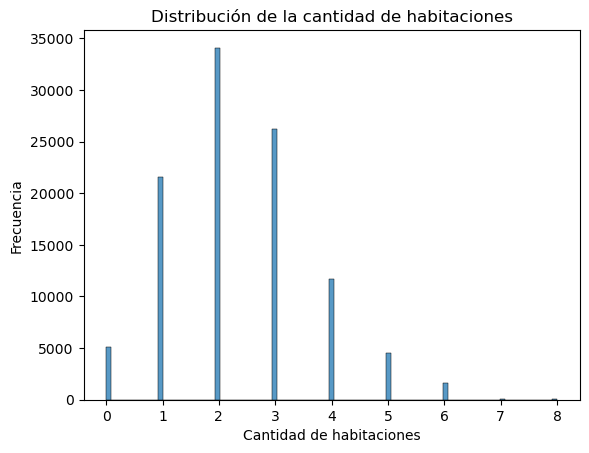

In [114]:
sns.histplot(data.rooms)
plt.title('Distribución de la cantidad de habitaciones')
plt.xlabel('Cantidad de habitaciones')
plt.ylabel('Frecuencia')

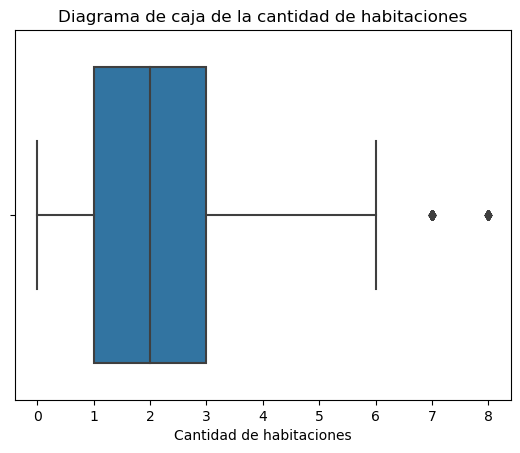

In [115]:
sns.boxplot(x =data.rooms)
plt.title('Diagrama de caja de la cantidad de habitaciones')
plt.xlabel('Cantidad de habitaciones')
plt.show()

# Tratamiento columna floors

Analizamos nulos en la columna

In [116]:
#vemos cuantos nulos hay en columna floors 
floor_column_vector=data.floor
nulos_floor_alprincipio = floor_column_vector.isnull().sum()
print("Cantidad de nulos en columna floor:",nulos_floor_alprincipio)
perc_nulos_total_filas=(nulos_floor_alprincipio/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas,"%")
print(data.shape)

Cantidad de nulos en columna floor: 113321
Porcentaje de nulos sobre total de filas: 93.48 %
(121220, 13)


Analizamos los valores en la columna para identificar outliers

In [117]:
floor_column_vector.value_counts()

1.0      2080
2.0      1542
3.0      914 
4.0      658 
5.0      484 
        ...  
124.0    1   
691.0    1   
205.0    1   
302.0    1   
30.0     1   
Name: floor, Length: 182, dtype: int64

Generamos columnas copia para trabajar en la limpieza

In [118]:
#Copiamos columna floor y genero mascara para not nulos y nulos
data["copy_floor"]=floor_column_vector
floor_column_copy_vector=data["copy_floor"]
mask_copy_floor_not_null=floor_column_copy_vector.notnull()
mask_copy_floor_null = floor_column_copy_vector.isnull()
floor_column_copy_vector.dtypes

dtype('float64')

In [119]:
np.arange(0, data.copy_floor.max(), 200)

array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
       1800., 2000., 2200., 2400., 2600., 2800., 3000.])

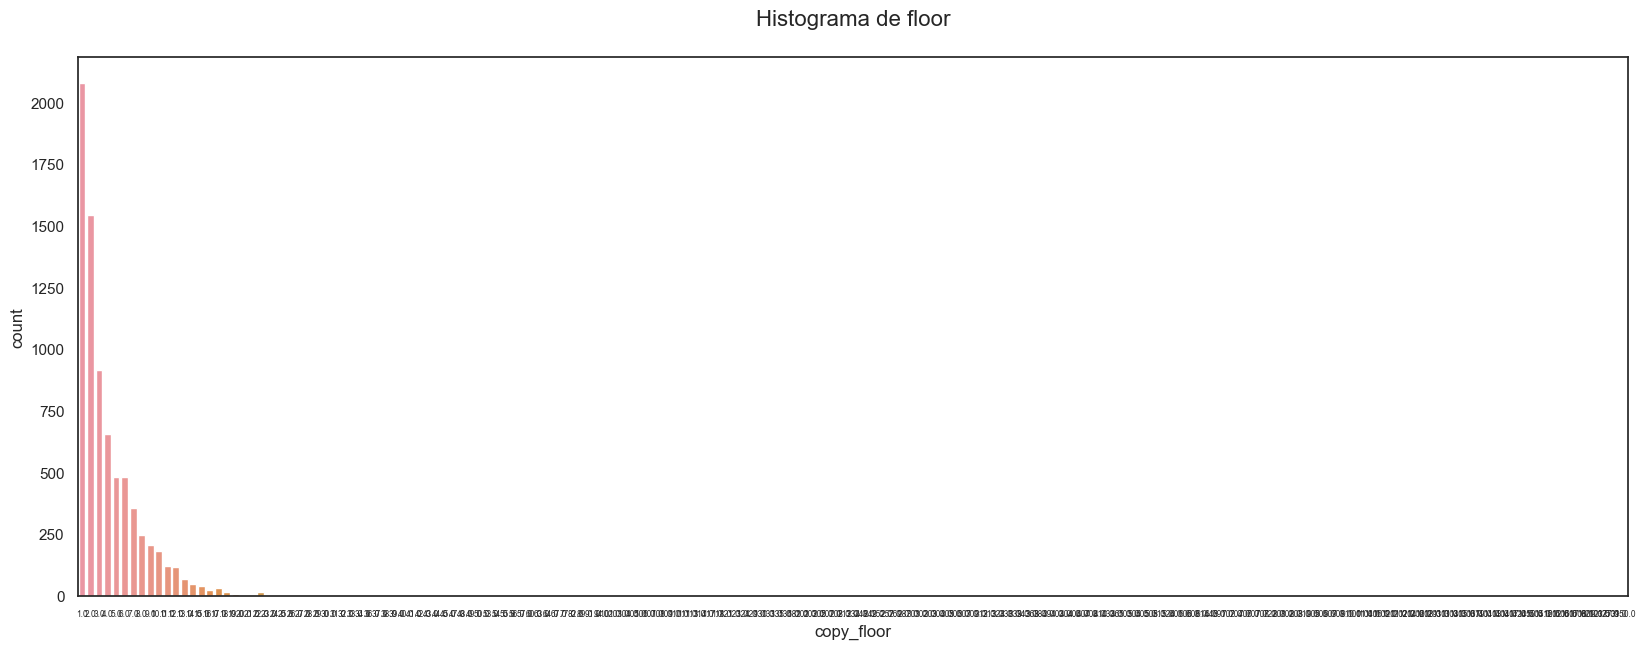

In [120]:
def count_plotter(data, label, labelsize=6):    
    sns.set(rc={"figure.figsize": (20, 7), 
                "xtick.labelsize": labelsize})
    sns.set_style("white")    
    data_count = sns.countplot(x=data)
    data_count.set_title('Histograma de ' + label + '\n', fontsize=16)
count_plotter(data.copy_floor,"floor")

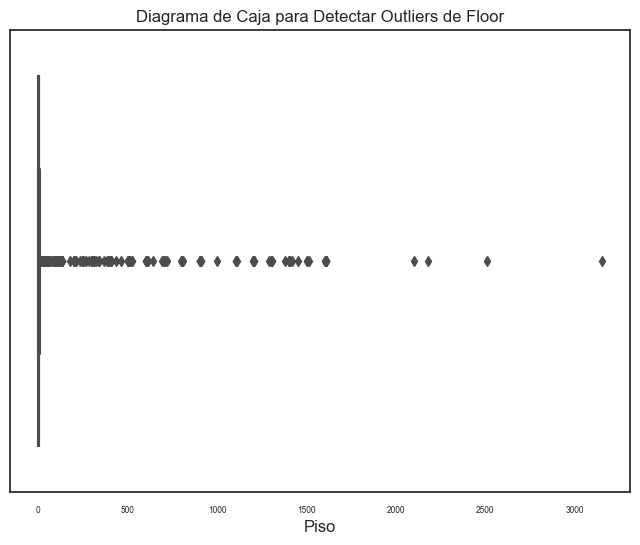

In [121]:
# Crear un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['floor'],width=0.8)

# Ajustar el título y etiquetas
plt.title('Diagrama de Caja para Detectar Outliers de Floor')
plt.xlabel('Piso')
plt.show()

Consideramos todos los pisos mayores a 56 como inválidos y se pasan a Nulos, dado que el efidicio más alto en el país tiene esta cantidad

In [122]:
invalid_floor=56
def delete_invalid_floors(value, limit):
    # Si el valor es nulo, lo dejamos nulo
    if pd.isnull(value):
        return None
    # Si el valor es mayor a 56 lo cambiamos a nulo, de lo contrario, lo dejamos como esta
    elif value > limit:
        return None
    else:
        return value
floor_column_copy_vector=floor_column_copy_vector.apply(lambda x: delete_invalid_floors(x, invalid_floor))
print(floor_column_copy_vector)
floor_column_copy_vector.value_counts()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
121215   NaN
121216   NaN
121217   NaN
121218   NaN
121219   NaN
Name: copy_floor, Length: 121220, dtype: float64


1.0     2080
2.0     1542
3.0     914 
4.0     658 
5.0     484 
6.0     483 
7.0     355 
8.0     248 
9.0     205 
10.0    181 
11.0    123 
12.0    116 
13.0    69  
14.0    49  
15.0    41  
17.0    31  
16.0    24  
22.0    16  
18.0    15  
19.0    10  
25.0    6   
20.0    6   
21.0    6   
27.0    6   
33.0    5   
31.0    4   
23.0    3   
36.0    3   
24.0    3   
29.0    2   
55.0    2   
47.0    2   
32.0    2   
40.0    2   
42.0    2   
39.0    2   
49.0    2   
50.0    2   
28.0    2   
41.0    1   
54.0    1   
44.0    1   
38.0    1   
48.0    1   
45.0    1   
37.0    1   
34.0    1   
56.0    1   
30.0    1   
43.0    1   
26.0    1   
53.0    1   
Name: copy_floor, dtype: int64

Arrancando limpieza identificando planta baja en title

In [123]:
#Hacemos copia de title y lo pasamos a minuscula 
data['copy_title'] = data['title'].str.lower()
title_column_copy_vector=data['copy_title']

Identificamos los pisos en planta baja

In [124]:
#Defino el patron para pb
pattern_floor_pb ="(?P<Plantabaja>planta baja|pb|plantabaja)"
regex_floor_pb=re.compile(pattern_floor_pb)
#buscamos en la columna title, en donde este nula la columna floors, lo que matche con el patron anterior 
match_floor_pb= data.loc[mask_copy_floor_null, 'copy_title'].map(lambda x: x if x is pd.isna(x) else regex_floor_pb.search(x))
#print(match_floor_pb)
#busco donde encontro el patron
mask_not_null_match_floor= match_floor_pb.notnull()
#print(mask_not_null_match_floor)
#asigno valor 0=planta baja para los que encontro patron
data.loc[mask_copy_floor_null & mask_not_null_match_floor, 'copy_floor']=0.0
data['copy_floor'].head(5)
data.loc[mask_copy_floor_null & mask_not_null_match_floor, ['copy_floor', 'copy_title']]

,copy_floor,copy_title
0,0.0,2 amb tipo casa sin expensas en pb
39,0.0,"casa a estrenar , en planta baja , excelente!!!"
80,0.0,ph en planta baja zona micro centro
613,0.0,"muy lindo 2 ambientes con vista al rio, edificio remeros pb, tigre!!"
630,0.0,"departamento 2 ambientes en planta baja,tigre, los naranjos."
...,...,...
119721,0.0,ph-planta baja con cochera y patio - 78 e/1 y 115
119729,0.0,departamento planta baja con patio cub bajas exp
119838,0.0,"pre-venta larralde air - 21 deptos en pb y 4 pisos de 2 , 3 y 4 ambientes."
119857,0.0,muy buena planta baja en el barrio de balvanera


In [125]:
#vemos cuantos nulos fueron limpiados
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

836

Continuamos limpieza identificando planta baja en description

In [126]:
#Hacemos copia de description para no modificar la original y lo pasamos a minuscula 
data['copy_description'] = data['description'].str.lower()
title_column_copy_vector = data['copy_description']


In [127]:
#Defino el patron para pb
mask_copy_floor_null = data.copy_floor.isnull()
pattern_floor_pb ="(?P<Plantabaja>planta baja|pb|plantabaja)"
regex_floor_pb=re.compile(pattern_floor_pb)
#buscamos en la columna title, en donde este nula la columna floors, lo que matche con el patron anterior 

match_floor_pb= data.loc[mask_copy_floor_null, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_floor_pb.search(x))
#(match_floor_pb)
#busco donde encontro el patron
mask_not_null_match_floor= match_floor_pb.notnull()
(mask_not_null_match_floor)
#asigno valor 0=planta baja para los que encontro patron
data.loc[mask_copy_floor_null & mask_not_null_match_floor, 'copy_floor']=0
data['copy_floor'].head(10)
data.loc[mask_copy_floor_null & mask_not_null_match_floor , ['floor','copy_floor','copy_description']]

,floor,copy_floor,copy_description
3,NaN,0.0,"ph 3 ambientes con patio. hay 3 deptos en lote, 2 en pb y 1 en 1º piso.reciclado a nuevo. ""muy buen estado"" aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias)."
6,NaN,0.0,muy buen ph al frente con entrada independiente - sin expensas! todo en planta baja dos dormitorios (pisos de pinotea) - living - cocina comedor - baño - patio - galpón y lavadero en el patioen muy buen estado - inmejorable ubicación - a 1 cuadra de la estación de munro - cerca de mas de 6 lineas de colectivos - a 2 cuadras del centro universitario. 106 m2 totales: 78 m2 cubiertos y 28 m2 descubiertosapto profesional aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).
9,NaN,0.0,"mednoza al 7600a una cuadra de calle mendozawhite 7637 sector e monoblok 67listo para escriturarplanta baja con patio2 dormitoriosliving comedorcocina independientelavaderopatios adelante y atrásluminoso, muy buena ventilaciónimpuestos y servicios al diadeuda de la vivienda totalmente cancelada aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias)."
15,NaN,0.0,"ultima unidad disponiblehaus boulevard: metros cubiertos: 115,23m²contado u$d250.000haus village es un complejo residencial de 20 casas con cochera y jardín propio, dentro del barrio cerrado buenos aires village.todas las unidades tienen entrada para auto, en planta baja cuentan con un toilette, living comedor con cocina separada.patio exclusivo y, en planta alta, 3 dormitorios con espacio para placard (uno en suite).realizados en una estructura monolítica de hormigón armado sobre platea de fundación y aberturas de pvc con dvh. la calidad de la construcción conjuga lo moderno y lo funcional, con un cuidado especial por lo estético. son amplias superficies vidriadas que permiten vivir el verde del jardín en todo momento. el barrio cerrado cuenta con una doble entrada, lo que permite una mejor circulación interna de vehículos. ofrece excelentes alternativas para los accesos al barrio, una entrada es por la autopista del buen ayre y la otra por la calle flaubert. easybroker id: eb-an8955"
16,NaN,0.0,"ventas mataderos al frente duplex 4 amb.- planta baja: entrada de auto-living comedor- toilete, cocina comedor-diario- parque (4m x 10m) con parrilla. planta alta: 3 dormitorios-placard- 1 baño completo- dormitorio principal en suite y vestidor. todo luz y sol en excelente estado a metros de av. j. b. alberdi y larrazabal .""listo para vivir ya!!!las medidas son aproximadas y al sólo efecto orientativo. las medidas reales surgirán del título de propiedad."
...,...,...,...
121205,NaN,0.0,"ubicaciónestratégicamente ubicado en calle obispo trejo 825, estos departamentos en construcción, se encuentran en el corazón de nueva córdoba, a pasos de palacio ferreyra, plaza españa, museo caraffa, parque sarmiento, paseo del buen pastor, unc, bancos y sanatorios.edificio berdea nos regala las mejores visuales tanto de nueva córdoba y el centro de laciudad, como del parque y alrededores.características generales1.\tdepartamentos de 1 y 2 dormitorios en pb y 14 pisos superiores, y locales comerciales en pb sobre calle obispo trejo.2.\tequipamiento de muebles en melanina 18mm color teka ártico en cocina (bajo mesadas y alacenas) y puertas para placares en dormitorios e interiores completos.3.\tequipamiento de grifería y sanitarios roca en baños4.\thall de ingreso jerarquizado con portero eléctrico.5.\trevestimiento de porcelanato en todos los ambientes.6.\tprovisión de caldera dual peisa con temporizador, para agua caliente en cocina y bocas para radiadores en dormitorios y estar-comedor.7.\tterminación de yeso en interiores. revestimiento plástico rba en exteriores.8.\tbaranda y pasamanos de caño rectangular con acabado en sintético.9.\tascensores (2) de última generación.10.\taberturas exteriores de aluminio tipo módena.11.\tpuertas con marco de madera, hojas de 5.5 mm pantografeado.12.\tamplios balcones c

In [128]:
#vemos cuantos nulos vamos limpiando
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

28696

Buscamos reemplazar primer piso o 3er piso por decimales para que sea mas facil la busqueda

In [129]:
lista_num = [
    ('primer', '1'), 
    ('segundo', '2'), 
    ('tercer','3'), 
    ('cuarto', '4'), 
    ('quinto', '5'), 
    ('sexto', '6'), 
    ('septimo', '7'), 
    ('séptimo', '7'), 
    ('octavo', '8'), 
    ('noveno', '9'), 
    ('decimo', '10'), 
    ('décimo', '10'), 
    ('1er', '1'),
    ('2do', '2'),
    ('3er', '3'),
    ('4to', '4'),
    ('5to', '5'),
    ('6to', '6'),
    ('7mo', '7'),
    ('8vo', '8'),
    ('9no', '9'),
    ('10mo', '10')]
for item in lista_num:
    data['copy_title'] = data['copy_title'].apply(lambda x: x.replace(item[0], item[1]))
    data['copy_description'] = data['copy_description'].apply(lambda x: x if x is np.NaN else x.replace(item[0], item[1]))

Buscamos pisos en title

In [130]:
#defino patrones para piso
pattern_floor_numero1='(?P<numeropiso>\d+)(º)?(Â)?[a-zA-Z]?(?P<espacio>\s)(?P<piso>piso|nivel)'
pattern_floor_numero2='(?P<piso>Piso|PISO|\snivel)(?P<espacio>\s)(?P<numeropiso2>\d+)(º)?(Â)?[a-zA-Z]?'


regex_floor_numero1=re.compile(pattern_floor_numero1)
regex_floor_numero2=re.compile(pattern_floor_numero2)


In [131]:
mask_copy_floor_null = data.copy_floor.isnull()
data['copy_floor'] = data['copy_floor'].astype(float)
#buscamos el patron en la columna title para los campos nulos del vector copy floors
match_floor_numero = data.loc[mask_copy_floor_null, 'copy_title'].apply(lambda x: x if x is np.NaN else regex_floor_numero1.search(x))
#Veo cuantos valores igual al patron encontro en title 
mask_not_null_match_floor_numero= match_floor_numero.notnull()
#asigno en nulos de copy floors los encontrados
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero, 'copy_floor'] = match_floor_numero[mask_copy_floor_null & mask_not_null_match_floor_numero].apply(lambda x: np.nan if pd.isna(x) else x.group('numeropiso')).astype(float)
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero, ['copy_floor', 'title']]

,copy_floor,title
2,3.0,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
63,1.0,"Casa , Local y Departamento en Primer piso!!!"
189,2.0,Depto 3 ambientes en segundo piso al frente
662,2.0,DTOS 2 AMBIENTES A CONSTRUIR 1º Y 2º PISO
1144,5.0,ENYOI | Departamento de 2 ambientes en el quinto piso con increíble vista al Lago Central.
...,...,...
119415,1.0,Viel 515 1º piso casi Av. J. M. Moreno
120155,1.0,VENTA DEPARTAMENTO 1º PISO UNF 5/ VALERIA DEL MAR
120178,1.0,VENTA apto credito -PH 2 AMB A LA CALLE Con COCHERA-NUEVO-1º PISO X ESCALERA -BALCARCE y ITALIA -
121064,2.0,BOCA - Av. Almte.Brown 800 - 2 amb -. 2do Piso -Muy luminoso- Bajas Exp


In [132]:
data.copy_floor.isnull().sum()

84248

In [133]:
#vemos cuantos nulos fueron limpiados
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

29073

In [134]:
mask_copy_floor_null = data.copy_floor.isnull()
#buscamos el patron en la columna title para los campos nulos del vector copy floors
match_floor_numero2 = data.loc[mask_copy_floor_null, 'copy_title'].apply(lambda x: x if x is np.NaN else regex_floor_numero2.search(x))
#Veo cuantos valores igual al patron encontro en title 
mask_not_null_match_floor_numero2= match_floor_numero2.notnull()
#asigno en nulos de copy floors los encontrados
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero2, 'copy_floor'] = match_floor_numero2[mask_copy_floor_null & mask_not_null_match_floor_numero2].apply(lambda x: np.nan if pd.isna(x) else x.group('numeropiso2'))
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero2, ['copy_title','copy_floor']]

,copy_title,copy_floor


In [135]:
data.copy_floor.isnull().sum()

84248

In [136]:
#vemos cuantos nulos fueron limpiados
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

29073

Buscamos pisos en description

In [137]:
mask_copy_floor_null = data.copy_floor.isnull()
#buscamos el patron 1 en la columna title para los campos nulos del vector copy floors...
match_floor_numero_desc = data.loc[mask_copy_floor_null, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_floor_numero1.search(x))
#Veo cuantos valores igual al patron encontro en title 
mask_not_null_match_floor_numero_desc= match_floor_numero_desc.notnull()
#asigno en nulos de copy floors los encontrados
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero_desc, 'copy_floor'] = match_floor_numero_desc[mask_copy_floor_null & mask_not_null_match_floor_numero_desc].apply(lambda x: np.nan if pd.isna(x) else x.group('numeropiso'))
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero_desc, ['copy_description', 'copy_floor']] 

,copy_description,copy_floor
1,"venta de departamento en 10 piso al frente, a estrenar. living comedor con ventanales hacia el balcón con pisos de madera. cocina completa con doble mesada, muebles bajo mesada. lavadero separado. toilette.dormitorio con placard. 2 dormitorio a dividir. calefacción por radiadorbaño completo.balcón corrido. posibilidad de cochera semicubierta. u$d 20.000 aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).",10
13,"torre i mondrian. 3 ambientes con terraza y dos baños al frente.vitraux ofrece en el ultimo nivel, piscina con solarium, un espacio con sala de reunión para uso profesional, eventos o proyecciones con un amplio foyer, sauna, gimnasio, un salón de usos múltiples con cocina y una amplia expansión. asimismo cuenta con un hall en doble altura y un amplio estar que balconea al mismo en el 1 piso.así destaca la excelente relación de espacios de uso común sobre el metro propio, sobre todo en studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.",1
14,"torre ii dalí. ambiente unico divisible.vitraux ofrece en el ultimo nivel, piscina con solarium, un espacio con sala de reunión para uso profesional, eventos o proyecciones con un amplio foyer, sauna, gimnasio, un salón de usos múltiples con cocina y una amplia expansión. asimismo cuenta con un hall en doble altura y un amplio estar que balconea al mismo en el 1 piso.así destaca la excelente relación de espacios de uso común sobre el metro propio, sobre todo en studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.",1
17,"excelente 3 ambientes en un 6 piso y con terraza propia en el 7 pisoen la planta principal: dormitorio principal en suite y living comedor con vista al lago, cocina integrada y lavadero, 2 baño completo que hace tambien de toilette, y el 2 dormitorio con placard con vista al verde. parrilla y balcon.en la planta alta: una gran terraza preparado para instalar un jacuzzi.cochera fija subterranea y baulerabaños: equipados con sanitarios y griferias de 1a calidaden linea y diseño - mesadas de marmol o granito - pisos y revestimientos de porcelanato - espejos y accesorios instalados - muebles vanitorys diseñados especialmentecocinas:mesadas de granito con zócalo y bachas de acero inoxidable y griferías mono comando - muebles especialmente diseñados para este proyecto - anafe y horno eléctricos",6
24,"exclusivo departamento de excelente categoria en venta en castelar160 mts2 cubiertos. 4 ambientes con balcón terraza, parrilla y cochera. entrega marzo 2018.el precio publicado corresponde al valor de contado para las unidades de 1 y 2 piso. financiacion: anticipo usd71.000, usd 105.000 a la escritura y el resto financiado en 36 cuotas (con refuerzos semestrales) valor financiado usd 380.940piso con palier privado con puerta de seguridad y entrada de servicio. linving comedor , 3 dormitorios uno de los cuales es en suite con ducha escocesa, con vestidor. otros 2 dormitorios con placars que comparten un baño completo con bañera. pisos de madera en dormitorios y living comedor, pisos de porcelanato en pasillos y cocina. ventanas de aluminio con dvh (doble vidrio hermético) en todo el depto. cocina completa (con cocina vitroceramica, horno eléctrico, microondas, heladera con frezzer, cafetera express todos marca bgh), despensa y lavadero. toilete, balcón terraza con parrilla y cerramiento con parasoles de seguridad corredizos de aluminio simil madera. aire acondicionado central, iluminación del depto. y de espacios comunes del edificio con paneles fotovoltaicos. agua caliente provista por termotanques solares. instalación eléctrica inteligente con cámaras de seguridad incorporadas (domótica) este novedoso sistema de seguridad te permite ver las cámaras desde el celular o computadora, funciona con wifi permitiendo mover las cámaras dentro del depto. sin instalaciones complejas. las mismas tienen micrófono incorporado. posee un

In [138]:
#vemos cuantos nulos fueron limpiados
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

39875

In [139]:
#buscamos el patron 2 en la columna title para los campos nulos del vector copy floors...
mask_copy_floor_null = data.copy_floor.isnull()
match_floor_numero_desc2 = data.loc[mask_copy_floor_null, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_floor_numero2.search(x))
#Veo cuantos valores igual al patron encontro en title 
mask_not_null_match_floor_numero_desc2= match_floor_numero_desc2.notnull()
#asigno en nulos de copy floors los encontrados
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero_desc2, 'copy_floor'] = match_floor_numero_desc2[mask_copy_floor_null & mask_not_null_match_floor_numero_desc2].apply(lambda x: np.nan if pd.isna(x) else x.group('numeropiso2'))
data.loc[mask_copy_floor_null & mask_not_null_match_floor_numero_desc2, ['copy_description','copy_floor']] 

,copy_description,copy_floor
26690,"amplia vivienda en la serranita a 15 minutos de alta gracia y 30 de villa general belgrano. dadas las particularidades del lote la vivienda se desarrolla en tres niveles todos con magnificas vistas. nivel 0 ( nivel de calle): ingreso, dormitorio en suite con vestidor, balc?n, terraza y amplia cochera para dos autos. nivel -1: dos dormitorios, ba?o, cocina, estar comedor y galeria con asador. nivel -2: lavadero, ba?o y deposito. la propiedad cuenta con pileta de nataci?n. lote con frente a dos calles de 1555m2. .publicado por praedia brokers inmobiliarios a traves inmomap",0
37527,"corredor responsable: hector garaygorta - iii cj. río negro mat. n° 214contacto: héctor garaygorta - mls id # 211004-376complejo de 16 departamentos, distribuidos en dos módulos; el 1 módulo tiene 3 plantas 1a y segunda planta 4 por piso 3 planta 2 departamentos todos de 50 m2 cada uno , se distribuyen en cocina comedor, baño completo y un dormitorio. el modulo 2 cuenta con 3 plantas y 2 departamentos por piso de 65 m2 cada uno, con cocina, comedor, baño y un dormitorio. la obra se encuentra en un 40% hasta el momento tiempo de finalización marzo del 2018 aprox. consultar por financiación el departamento ofrecido en esta publicacion es de dos ambientes, 50 m2, aprox, y se encuentra en el nivel 1 o 2 del modulo 1. valor 115000 dolares.tiene vista al lago",1
38503,"departamento de categoría en excelente estado al pie de la panamericana,ubicado en la calle luis garcía 1319 9º tigre. superficie de 98m2/ 2 dormitorios, living, comedor, cocina, vestidor, palier,recepción, toilette, cochera. balcón.excelente vista abierta, y la ubicación es inmejorable. edificio con muy amplia y desplegada recepción. son tres torres unidas a nivel 3 donde se halla la pileta, gym, bar, espacio para estar al aire libre, sauna, jacuzzi, laundry, salón de eventos. son 150 unidades pero con ocupación permanente solo 80-90 el resto son propietarios que vienen el fin de semana. tiene doble vigilancia las 24 hs, privada y prefectura con cámaras en las alrededores",3
60809,"importante casa de corte minimalista. desarrollada en vs. niveles. nivel calle: garage doble paralelo. dependesncia de servicio. 1. nivel: distribuidor, cocina comedor diario, totalmente equipada, lavadero separado, toillette, amplio living comedor, hogar , pisos tarugados, aventanamientos a patio seco y parque. quincho con baño cpto. 4 de herramientas. nivel 2: 3 dormitorios (1 de ellos en suite con baño cpto. ducha+bañera), otro baño cpto. (ducha + bañera). playroom, sector de cava. jardín. persianas barrio. calefacción por radiadores. excelente calidad constructiva y estado.",2
61849,"la propiedad se encuentra en una zona residencial y privilegiada del barrio de vicente lópez, compuesta por numerosas casas de estilo, con grandes parques, árboles emblemáticos de la zona y calles adoquinadas. ubicada en la calle gaspar campos a metros de francisco narciso de laprida la casa se caracteriza por estar ubicada en una cuadra cortada de mucha tranquilidad. a pasos del vial costero, camino paralelo a la av. del libertador que bordea al río de la plata, es uno de los espacios verdes más importantes de la zona norte. un lugar para disfrutar del aire libre, practicar deportes o presenciar alguna actividad cultural. la propiedad cuenta con fácil acceso mediante avenidas y autopistas, metrobus, ffcc mitre tba. además se encuentra cerca de la clínica olivos, clubes como el club banco ciudad y club banco provincia, colegios como el florida day school y michael ham. gran oferta gastronómica y paseo comercial en la calle azcuénaga y roca. se trata de una casa de exclusivo diseño minimalista con juego de niveles, construcción de calidad y excelentes terminaciones. descripción de la propiedadnivel 1acceso vehicular y peatonal con espacio para dos autos. ingreso a la casa a través de un ante jardín de diseño zen con espejo de agua iluminado. planta integrada (living, cocina y comedor). exclusivo

In [140]:
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

39886

Veamos tipo de inmueble para aplicar logica

In [141]:
data['property_type'].value_counts()

apartment    71065
house        40268
PH           5751 
store        4136 
Name: property_type, dtype: int64

Identificamos casas y colocamos 0 en piso para esas filas

In [142]:
mask_casa = data.property_type == 'house'
mask_copy_floor_null = data.copy_floor.isnull()
#estableciendo un 0 donde sea una casa y este nulo 
data.loc[mask_casa & mask_copy_floor_null , 'copy_floor'] = 0

data.loc[mask_casa, ['property_type', 'copy_floor']]

,property_type,copy_floor
5,house,0
9,house,0
10,house,0
11,house,0
15,house,0
...,...,...
121208,house,0
121210,house,0
121212,house,0
121213,house,0


In [143]:
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

63856

Vemos que descripciones y titulo quedaron nulas para dar cuenta de nuevas regex

In [144]:
#para poder leer toda la descripcion 
pd.set_option('display.max_colwidth', 0)

In [145]:
mask_copy_floor_null = data.copy_floor.isnull()

faltantes = data.loc[ mask_copy_floor_null,['copy_description','copy_title']]
display(faltantes)

,copy_description,copy_title
4,"departamento con fantástica iluminación natural, al contrafrente, edificio de pocas unidades y muy bien conservado. en estado original.-posee: 1 dormitorios, 1 baño completo, living comedor y cocina separada.-en estado original.- aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).",depto 2 amb al contrafrente zona centro/plaza mitre
7,"excelente monoambiente a estrenar amplio super luminoso ...piso alto cocina americana. baño completo pileta ,solarium, laundry apto profesionalproximo av del libertador muy buena zona !!!! aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).","jose hernandez 1400 monoambiente estrenar categoria , venta"
8,"excelente dos ambientes estrenar amplio super luminoso ...piso alto cocina americana. baño completo pileta ,solarium, laundry apto profesionalproximo av del libertador muy buena zona !!!! aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).","jose hernandez 1400 dos ambientes estrenar , categoria , venta"
12,"excelente departamento 2 ambientes contrafrente con balcon a pulmon de manzana.a solo media cuadra de la av. santa fe.living 3,06 x 5,30 dormitorio 2,80 x 3,60 baño 1,55 x 2,11 cocina 1,60 x 3,13 balcon 4,61 x 1 posee dos aires acondicionados nuevos.terraza.total cubiertos: 35,66semi 3,56tal: 39,22 aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).",excelente departamento 2 ambientes contrafrente con balcon
19,excelente semipiso al contra frente en bulnes y libertador. espectacular pulmón muy luminoso con árboles. buen edificio con entrada reciclada hace dos años. hall de entrada. living comedor de muy buenas dimensiones con salida al balcón aterrazado. toilette de recpeción. master suite muy grande con vestidor y gran baño (revestimientos de marmol) también al frente. 2 dormitorio o escritorio (chico) a aire luz muy luminoso. muy linda cocina con muebles alemanes. pisos de parquet. persianas eléctricas. aislación acústica en paredes. detalles de muy buena calidad. baulera común. la unidad originalmente era de dos dormitorios pero fue refaccionada al plano actual (master suite más dormitorio chico o escritorio). impecable!,"bulnes y libertador: espectacular pulmón, con balcón aterrazado reciclado a nuevo!"
...,...,...
121214,"***venta con renta***local en edificio lomas park muy bien ubicado.muy buen local súper luminoso,amplio salón de ventas y atención al público. privado.2 baños. kichinette. 3 cocheras cubiertas. estacionamiento de cortesía.venta con renta: alquilado a search seguridad contrato por 5 años. inicio diciembre 2014 . con proyección de quedarse, alquilan además oficinas en el piso de arriba. actualmente valor de alquiler: u$s 1.338. -para el 4. año u$s 1.471.-para el 5. año u$s 1.619.-",local - san isidro
121215,"torre forum alcorta - máxima categoría.impecable departamento.living comedor, toilette de recepción, con salida a un balcón aterrazado con parrilla y mesa.2 dormitorios en suite, principal con vestidor.cochera fijaopción a compra de la segunda cochera.-seguridad 24hs.-el complejo posee pileta de natación descubierta y pileta climatizada cubierta, cancha de tenis cubierta y otra cancha de tenis descubierta, quincho con parrilla, gran salón de fiestas, plaza para chicos y micro cine. las medidas, superficies y expensas consignadas en la presente descripción son aproximadas, a solo título orientativo y no son vinculantes. las medidas y superficies reales surgen del título respectivo. federico galceran propiedades",torre forum alcorta- impecable 3 ambientes
121217,"venta departamento ambiente divisible a estrenar balcon amenities.entrega inmediata* departamento: excelente monoambiente de (43,00m2) divisible, con importante placard - baño completo - balcón corrido, cocina integrada con equipamiento completo y herrajes de acero inoxidable, grifería fv, cocina con horno, termotanque eléctrico, servicios individu

Vemos cuantos nulos hay en columna Copy_floors despues de las acciones realizadas hasta ahora

In [146]:
perc_nulos_total_filas_postcasa=(data.copy_floor.isnull().sum()/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas_postcasa,"%")

Porcentaje de nulos sobre total de filas: 40.81 %


Realizar lo mismo con los PHs, pero primero veo cuantas lineas son y cuantos nulos hay.

In [147]:
mask_copy_floor_null = data.copy_floor.isnull()
mask_cant_filas_ph = data['property_type']=='PH'
#Visualizo cantidad de filas de PH y nulas
print((mask_cant_filas_ph & mask_copy_floor_null).sum())
mask_copy_floor_null = data.copy_floor.isnull()
#Coloco un 0 donde sea un PH y este nulo 
data.loc[mask_cant_filas_ph & mask_copy_floor_null , 'copy_floor'] = 0
#Verifico que se haya corregido correctamente
data.loc[mask_cant_filas_ph, ['property_type', 'copy_floor']]

2723


,property_type,copy_floor
0,PH,0
3,PH,0
6,PH,0
16,PH,0
34,PH,0
...,...,...
120972,PH,1
121081,PH,0
121104,PH,0
121130,PH,0


In [148]:
#Veo cuantos nulos limpiamos hasta ahora
mask_copy_floor_null = data.copy_floor.isnull()
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

66579

Realizar lo mismo con los Stores, pero primero veo cuantas lineas son y cuantos nulos hay.

In [149]:
mask_copy_floor_null = data.copy_floor.isnull()
mask_cant_filas_stores = data['property_type']=='store'
#Visualizo cantidad de filas de PH y nulas
print((mask_cant_filas_stores & mask_copy_floor_null).sum())
mask_copy_floor_null = data.copy_floor.isnull()
#Coloco un 0 donde sea un PH y este nulo 
data.loc[mask_cant_filas_stores & mask_copy_floor_null , 'copy_floor'] = 0
#Verifico que se haya corregido correctamente
data.loc[mask_cant_filas_stores, ['property_type', 'copy_floor']]

2761


,property_type,copy_floor
57,store,0
65,store,0
95,store,1
183,store,0
204,store,0
...,...,...
120854,store,0
120929,store,0
121073,store,0
121125,store,0


In [150]:
#Veo cuantos nulos limpiamos hasta ahora
mask_copy_floor_null = data.copy_floor.isnull()
nulos_floor_alprincipio - data.copy_floor.isnull().sum()

69340

In [151]:
perc_nulos_total_filas_poststores=(data.copy_floor.isnull().sum()/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas_poststores,"%")

Porcentaje de nulos sobre total de filas: 36.28 %


Analizando nuevamente los campos de title y description donde copy_floor sea nulo. No se encuentran más descripciones de nulos

In [152]:
mask_copy_floor_null = data.copy_floor.isnull()

faltantes = data.loc[ mask_copy_floor_null,['copy_description','copy_title']]
display(faltantes)

,copy_description,copy_title
4,"departamento con fantástica iluminación natural, al contrafrente, edificio de pocas unidades y muy bien conservado. en estado original.-posee: 1 dormitorios, 1 baño completo, living comedor y cocina separada.-en estado original.- aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).",depto 2 amb al contrafrente zona centro/plaza mitre
7,"excelente monoambiente a estrenar amplio super luminoso ...piso alto cocina americana. baño completo pileta ,solarium, laundry apto profesionalproximo av del libertador muy buena zona !!!! aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).","jose hernandez 1400 monoambiente estrenar categoria , venta"
8,"excelente dos ambientes estrenar amplio super luminoso ...piso alto cocina americana. baño completo pileta ,solarium, laundry apto profesionalproximo av del libertador muy buena zona !!!! aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).","jose hernandez 1400 dos ambientes estrenar , categoria , venta"
12,"excelente departamento 2 ambientes contrafrente con balcon a pulmon de manzana.a solo media cuadra de la av. santa fe.living 3,06 x 5,30 dormitorio 2,80 x 3,60 baño 1,55 x 2,11 cocina 1,60 x 3,13 balcon 4,61 x 1 posee dos aires acondicionados nuevos.terraza.total cubiertos: 35,66semi 3,56tal: 39,22 aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).",excelente departamento 2 ambientes contrafrente con balcon
19,excelente semipiso al contra frente en bulnes y libertador. espectacular pulmón muy luminoso con árboles. buen edificio con entrada reciclada hace dos años. hall de entrada. living comedor de muy buenas dimensiones con salida al balcón aterrazado. toilette de recpeción. master suite muy grande con vestidor y gran baño (revestimientos de marmol) también al frente. 2 dormitorio o escritorio (chico) a aire luz muy luminoso. muy linda cocina con muebles alemanes. pisos de parquet. persianas eléctricas. aislación acústica en paredes. detalles de muy buena calidad. baulera común. la unidad originalmente era de dos dormitorios pero fue refaccionada al plano actual (master suite más dormitorio chico o escritorio). impecable!,"bulnes y libertador: espectacular pulmón, con balcón aterrazado reciclado a nuevo!"
...,...,...
121211,"excelente departamento de categoría con vistas parciales al río en exclusivo barrio cerrado ""barrancas al río"". pallier privado, hall, toilette y guarda ropa. living y comedor con salida a balcón terraza. amplia cocina con comedor diario, dependencia de servicio, lavadero, 3 dormitorios, 2 baños, 1 en suite,gran baulera, doble cochera fija cubierta, splits frio-calor en todos los ambientes, calefacción por piso eléctrico. el condominio cuenta con pileta climatizada, jardines, cocheras de cortesía, sum y seguridad 24 hs.",departamento - acassuso
121215,"torre forum alcorta - máxima categoría.impecable departamento.living comedor, toilette de recepción, con salida a un balcón aterrazado con parrilla y mesa.2 dormitorios en suite, principal con vestidor.cochera fijaopción a compra de la segunda cochera.-seguridad 24hs.-el complejo posee pileta de natación descubierta y pileta climatizada cubierta, cancha de tenis cubierta y otra cancha de tenis descubierta, quincho con parrilla, gran salón de fiestas, plaza para chicos y micro cine. las medidas, superficies y expensas consignadas en la presente descripción son aproximadas, a solo título orientativo y no son vinculantes. las medidas y superficies reales surgen del título respectivo. federico galceran propiedades",torre forum alcorta- impecable 3 ambientes
121217,"venta departamento ambiente divisible a estrenar balcon amenities.entrega inmediata* departamento: excelente monoambiente de (43,00m2) divisible, con importante placard - baño completo - balcón corrido, cocina integrada con equipamiento completo y herrajes de acero inoxidable, grifería fv, cocina con

# Se da por finalizada la limpieza con regex

Se eliminan otuliers usando la misma estrategia que el principio. Eliminar los pisos mayores a 56 porque es imposible en el pais que sea más alto que eso


In [153]:
invalid_floor=56
def delete_invalid_floors(value, limit):
    # Si el valor es nulo, lo dejamos nulo
    if pd.isnull(value):
        return None
    # Si el valor es mayor a 56 lo cambiamos a nulo, de lo contrario, lo dejamos como esta
    elif value > limit:
        return None
    else:
        return value
data.copy_floor = data.copy_floor.astype(np.float64)
data.copy_floor = data.copy_floor.apply(lambda x: delete_invalid_floors(x, invalid_floor))
print(data.copy_floor)
data.copy_floor.value_counts()

0         0.0 
1         10.0
2         3.0 
3         0.0 
4        NaN  
          ..  
121215   NaN  
121216    0.0 
121217   NaN  
121218   NaN  
121219   NaN  
Name: copy_floor, Length: 121220, dtype: float64


0.0     58172
1.0     5509 
2.0     3183 
3.0     2073 
4.0     1390 
6.0     1012 
5.0     1003 
7.0     819  
8.0     809  
9.0     577  
10.0    537  
12.0    382  
14.0    295  
11.0    197  
13.0    146  
15.0    107  
18.0    94   
24.0    79   
16.0    60   
29.0    48   
19.0    46   
20.0    40   
17.0    37   
22.0    33   
30.0    31   
50.0    24   
26.0    22   
27.0    17   
25.0    15   
21.0    14   
51.0    13   
23.0    10   
35.0    10   
31.0    8    
43.0    7    
40.0    6    
42.0    6    
33.0    6    
28.0    5    
34.0    5    
47.0    5    
44.0    4    
49.0    3    
32.0    3    
36.0    3    
55.0    3    
53.0    2    
48.0    2    
39.0    2    
45.0    2    
54.0    1    
56.0    1    
38.0    1    
46.0    1    
41.0    1    
37.0    1    
Name: copy_floor, dtype: int64

Se eliminan las columnas copy_description y copy_title que fueron copias modificadas que tienen utilidad solo en este caso. Se reemplaza floors x copy_floors dado que en estas se encuentran las limpias

In [154]:
#elimino las columnas descriptas y asigno a rooms lo limpio
data.floor = data.copy_floor
columns_to_drop = ['copy_description', 'copy_floor', 'copy_title']
data.drop(columns_to_drop, axis=1, inplace=True)

In [155]:
data.floor.value_counts()

0.0     58172
1.0     5509 
2.0     3183 
3.0     2073 
4.0     1390 
6.0     1012 
5.0     1003 
7.0     819  
8.0     809  
9.0     577  
10.0    537  
12.0    382  
14.0    295  
11.0    197  
13.0    146  
15.0    107  
18.0    94   
24.0    79   
16.0    60   
29.0    48   
19.0    46   
20.0    40   
17.0    37   
22.0    33   
30.0    31   
50.0    24   
26.0    22   
27.0    17   
25.0    15   
21.0    14   
51.0    13   
23.0    10   
35.0    10   
31.0    8    
43.0    7    
40.0    6    
42.0    6    
33.0    6    
28.0    5    
34.0    5    
47.0    5    
44.0    4    
49.0    3    
32.0    3    
36.0    3    
55.0    3    
53.0    2    
48.0    2    
39.0    2    
45.0    2    
54.0    1    
56.0    1    
38.0    1    
46.0    1    
41.0    1    
37.0    1    
Name: floor, dtype: int64

In [156]:
data.floor.describe()

count    76882.000000
mean     1.158308    
std      3.416391    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      56.000000   
Name: floor, dtype: float64

Text(0, 0.5, 'Frecuencia')

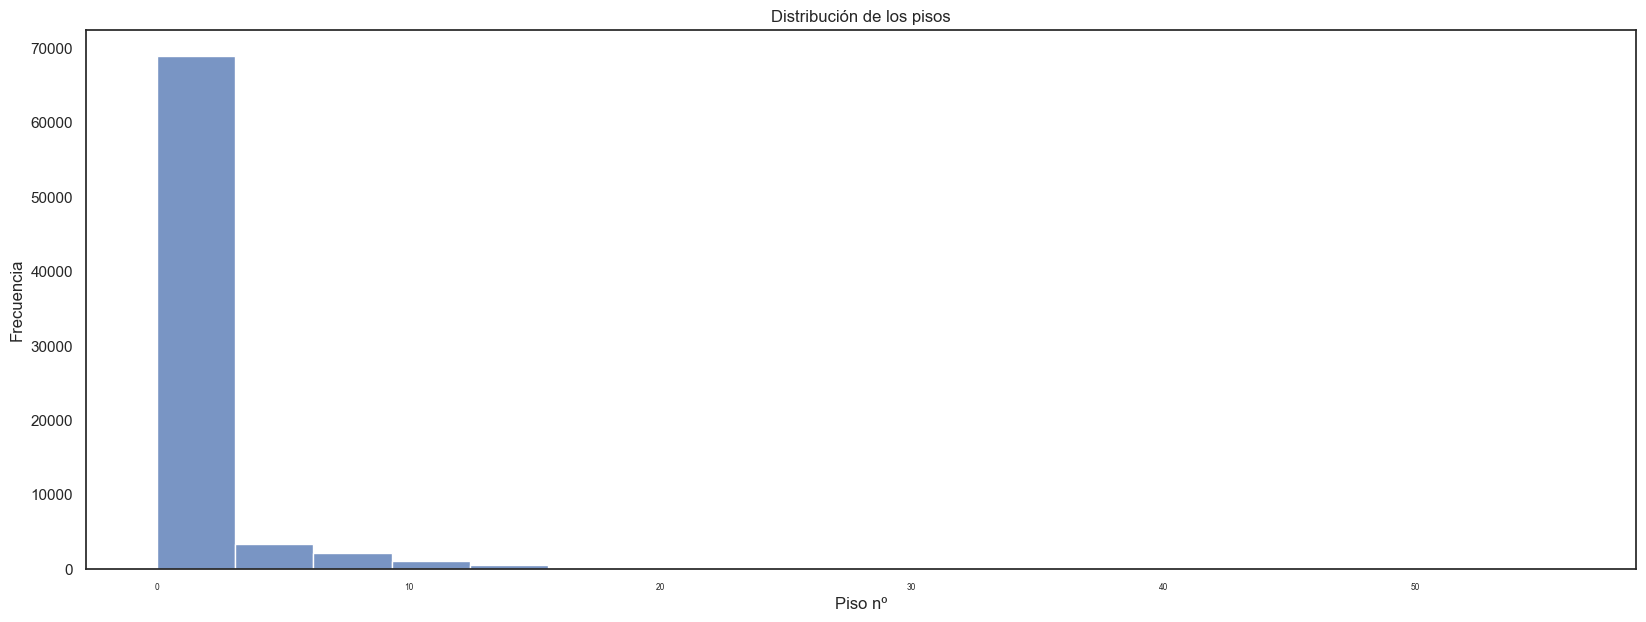

In [157]:
sns.histplot(data.floor)
plt.title('Distribución de los pisos')
plt.xlabel('Piso nº')
plt.ylabel('Frecuencia')

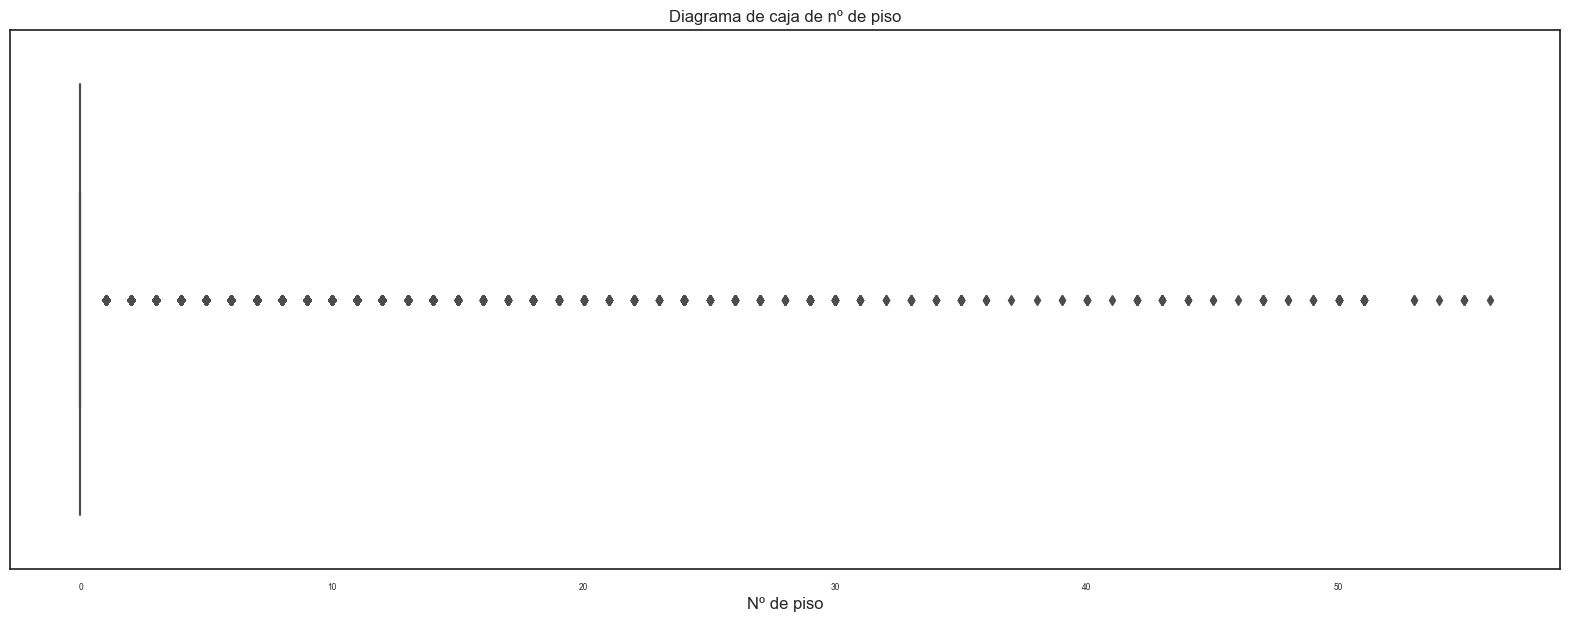

In [158]:
sns.boxplot(x =data.floor)
plt.title('Diagrama de caja de nº de piso')
plt.xlabel('Nº de piso')
plt.show()

data.columns

In [159]:
data.floor.isnull().sum()/data.shape[0]*100

36.576472529285596

Por la alta cantidad de nulos que sigue teniendo la columna se decide descartar la columna

In [160]:

columns_to_drop = ['floor']
data.drop(columns_to_drop, axis=1, inplace=True)

# Tratamiento de columna expensas

In [161]:
#vemos cuantos nulos hay en columna expenses

nulos_expenses_alprincipio = data.expenses.isnull().sum()
print("Cantidad de nulos en columna floor:",nulos_expenses_alprincipio)
perc_nulos_total_filas=(nulos_expenses_alprincipio/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas,"%")
print(data.shape)

Cantidad de nulos en columna floor: 106958
Porcentaje de nulos sobre total de filas: 88.23 %
(121220, 12)


Vemos que el porcentaje de columnas en expensas es muy alto, y las expensas nunca son un porcentaje fijo que se pueda sacar de otras columnas como precio, asi que se busca si hay algun dato en columnas como title y description

In [162]:
#copiamos expensas title y description para no modificar originales

data['copy_expenses'] = data.expenses
data['copy_title'] = data.title.str.lower()
data['copy_description'] = data.description.str.lower()

#seteamos para leer las descripciones y titulos de forma completa
pd.set_option('display.max_colwidth', 0)

In [163]:
#buscamos la expresion expensas en title
pattern_expensas = '(exp|expensas)'
expensas_regex = re.compile(pattern_expensas)

mascara_nulos_copy_expenses = data.copy_expenses.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_expenses = data.loc[mascara_nulos_copy_expenses, 'copy_title'].apply(lambda x: x if x is np.NaN else expensas_regex.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_expensas = match_expenses.notnull()

data.loc[mascara_nulos_copy_expenses & no_nullos_expensas, 'copy_title']

0         2 amb tipo casa sin expensas en pb                                                                                                    
592       expectacular casa al algua en santa barbara                                                                                           
932       ph 2 amb y 1/2 sin expensas!                                                                                                          
1041      ph apto credito de 2 ambientes por pasillo, sin gastos de expensas, muy luminoso                                                      
1432      reservado!!!  departamento 2 amb. lateral en dúplex con patio, 40 m2 cub, sin expensas a 4 cuadras del mar, punta mogotes u$s 40.000.-
                                                                           ...                                                                  
119729    departamento planta baja con patio cub bajas exp                                                                        

Se identifican algunas regex que dicen 'sin expensas'. 'bajas expensas' es muy indefinido


In [164]:
pattern_sin_expensas ='(sin|s/)(\s)*(expensas|exp)'
sin_expensas_regex = re.compile(pattern_sin_expensas)

mascara_nulos_copy_expenses = data.copy_expenses.isnull()


#buscamos en la columna de copy_title lo que haga match, sin tener en cuenta las filas que ya no son nulas en copy_expenses
match_sin_exp = data.loc[mascara_nulos_copy_expenses, 'copy_title'].apply(lambda x: x if x is np.NaN else sin_expensas_regex.search(x))

#mascara con no nulos (osea los que tengan sin ambiente)
mask_no_null_sin_exp = match_sin_exp.notnull()

#en copy_expenses asignamos a los que hayan hecho match (usando la mascara) un 0 porque significa que no hay expensas
data.loc[mascara_nulos_copy_expenses & mask_no_null_sin_exp, 'copy_expenses'] = 0

In [165]:
#vemos cuantos nulos llevamos sacando
nulos_expenses_alprincipio - data.copy_expenses.isnull().sum()

258

In [166]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_expenses & mask_no_null_sin_exp, ['copy_title','copy_expenses']]

,copy_title,copy_expenses
0,2 amb tipo casa sin expensas en pb,0.0
932,ph 2 amb y 1/2 sin expensas!,0.0
1432,"reservado!!! departamento 2 amb. lateral en dúplex con patio, 40 m2 cub, sin expensas a 4 cuadras del mar, punta mogotes u$s 40.000.-",0.0
1589,"venta ph de 4 ambientes,con cochera y sin expensas",0.0
1604,venta. amplio depto 2 ambientes. sin expensas,0.0
...,...,...
119502,"duplex con patio , 227 m2 ,garage , sin expensas !!!! excelente zona y ubicacion ! impecable",0.0
119636,ph en pb 3amb c/garage apto credito - s/expensas!,0.0
119678,ph de 4 ambientes **sin expensas** no apto cred.,0.0
119756,monoambiente divisible a estrenar s/ exp,0.0


Se hace lo mismo en description

In [167]:
pattern_sin_expensas ='(sin|s/)(\s)*(expensas|exp)'
sin_expensas_regex = re.compile(pattern_sin_expensas)

mascara_nulos_copy_expenses = data.copy_expenses.isnull()


#buscamos en la columna de copy_title lo que haga match, sin tener en cuenta las filas que ya no son nulas en copy_expenses
match_sin_exp = data.loc[mascara_nulos_copy_expenses, 'copy_description'].apply(lambda x: x if x is np.NaN else sin_expensas_regex.search(x))

#mascara con no nulos (osea los que tengan sin ambiente)
mask_no_null_sin_exp = match_sin_exp.notnull()

#en copy_expenses asignamos a los que hayan hecho match (usando la mascara) un 0 porque significa que no hay expensas
data.loc[mascara_nulos_copy_expenses & mask_no_null_sin_exp, 'copy_expenses'] = 0

In [168]:
#vemos cuantos nulos llevamos sacando
nulos_expenses_alprincipio - data.copy_expenses.isnull().sum()

1378

In [169]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_expenses & mask_no_null_sin_exp, ['copy_description','copy_expenses']]

,copy_description,copy_expenses
6,muy buen ph al frente con entrada independiente - sin expensas! todo en planta baja dos dormitorios (pisos de pinotea) - living - cocina comedor - baño - patio - galpón y lavadero en el patioen muy buen estado - inmejorable ubicación - a 1 cuadra de la estación de munro - cerca de mas de 6 lineas de colectivos - a 2 cuadras del centro universitario. 106 m2 totales: 78 m2 cubiertos y 28 m2 descubiertosapto profesional aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).,0.0
231,ph de uso comercial o vvda en excelente ubicacion a 1-2 cuadra de medrano y de salguero y a 1 de corrientes y de subte-. sin expensas - comercializa migliorisi inmobiliaria- corrientes 5500 -,0.0
383,"a estrenar excelente ph de 3 ambientes! cuenta con 2 dormitorios, baño completo, toilette, patio y terraza propia. cocina independiente a gas y lavadero incorporado. agua caliente por termotanque individual. estufas de tiro balanceado en cada ambiente. detalles de gran diseño y comfort.el complejo cuenta con 5 unidades, casi sin expensas! superficie: 68 m2 cubiertos + 10 m2 de patio + 38 m2 de terraza propia. total: 116 m2. entrega inmediata!- obtené beneficios asociándote sin costo al club openprop en -comunicate con nosotros al .openprop desarrollos inmobiliarios",0.0
399,"a estrenar, cerca av luro e independencia, amplio living comedor, cochera cubierta, parrilla, 2 baños completos (1 con jaquzi) balcón corrido al frente. excelente oportunidad para vivienda permanente o inversión para rentar. apto profesional . termotanque de alta recuperación. sin expensas.",0.0
441,"codigo: 1317-226au ubicado en: presidente peron 7535 - publicado por: adriana unrein propiedades. el precio es de usd 40000 null. en venta departamento en 1° piso x escalera de 2 ambientes, sobre la av. pres. perón 7500, cercano a centro comercial, a varias lineas de colectivo y a 5 cuadras de la estación martín coronado.- cuenta con entrada por escalera caracol, en 1° piso cocina comedor, baño con ducha y dormitorio - sin expensas - servicios separados - precio publicado: usd 40.000.- cualquier duda consúltenos al - adriana unrein propiedades - . publicado a través de mapaprop",0.0
...,...,...
120820,excelente ph refaccionado a nuevo. av. boedo esquina metan. al frente con balcón. patio interno. 4 dormitorios. 2 baños. living y paso a los dormitorios con hogar. cocina con comedor diario. pisos de parquet. terraza propia con parrilla. lavadero independiente. super luminoso. sin expensas. consúltenos,0.0
120864,"3 ambientes con dependencia de servicio y baulera jaula en el sótano. super luminoso. doble circulación. lavadero independiente. entrada principal y de servicio. pisos de parquet. cocina con comedor diario. amplio placares. agua caliente y calefacción central. recién pintado. sin expensas. el edificio cuenta con dos locales en la planta baja que se alquilan y asi poder solventar los gastos del edificio. encargado con vivienda. puerta de seguridad y rampa de acceso al edificio. excelente ubicación av. rivadavia y av. acoyte. en la puerta del edificio el subte ""a"" estación acoyte. a metros del parque rivadavia. lineas de colectivo. village caballito. consultenos",0.0
120930,3 ambientes con balcón corrido al frente - sin expensas - 3ro. por escalera - orientación norte - super luminoso - amplios ambientes - edificio y departamento en impecable estado - muy buena construccion - cañerias y electricidad a nuevo - pisos de roble de eslavonia - cocina comedor y lavadero independiente - apto credito hipotecario - ciudad de la paz 1970consúltenos:,0.0
120931,3 ambientes con balcón corrido al frente - sin expensas - 3ro. por escalera - orientación norte - super luminoso - amplios ambientes - edificio y departamento en impecable estado - muy buena construccion - cañerias y electricidad a nuevo - pisos de roble de eslavonia - cocina comedor y lavadero independiente - apto credito hipotecario - ciudad de la paz 1970consúltenos:,0.

Creamos dos patrones que seleccionen los precios segun los ejemplos que se pueden pensar tanto para title como para description

In [170]:
patron = '(?P<signo>\$)(?P<espacio>\s)?(?P<numero>\d+(\.\d+)?)(?P<espacio2>\s)?(?P<expensas>expensas|exp)'
patron2 = '(?P<expensas>expensas|exp)(?P<espacio>\s)?(?P<signo>\$)(?P<espacio2>\s)?(?P<numero>\d+(\.\d+)?)'
regex_uno = re.compile(patron)
regex_dos = re.compile(patron2)

In [171]:
#mascara nulos en copy_expenses
mascara_nulos_copy_expenses = data.copy_expenses.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_patron_uno = data.loc[mascara_nulos_copy_expenses, 'copy_title'].apply(lambda x: x if x is np.NaN else regex_uno.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_patron_uno = match_patron_uno.notnull()

data.loc[mascara_nulos_copy_expenses & no_nullos_patron_uno, 'copy_expenses'] = match_patron_uno[mascara_nulos_copy_expenses & no_nullos_patron_uno].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [172]:
#vemos cuantos nulos llevamos sacando
nulos_expenses_alprincipio - data.copy_expenses.isnull().sum()

1378

In [173]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_expenses & no_nullos_patron_uno, ['copy_title','copy_expenses']].head()

,copy_title,copy_expenses


In [174]:
#mascara nulos en copy_expenses
mascara_nulos_copy_expenses = data.copy_expenses.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_patron_dos = data.loc[mascara_nulos_copy_expenses, 'copy_title'].apply(lambda x: x if x is np.NaN else regex_dos.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_patron_dos = match_patron_dos.notnull()

data.loc[mascara_nulos_copy_expenses & no_nullos_patron_dos, 'copy_expenses'] = match_patron_dos[mascara_nulos_copy_expenses & no_nullos_patron_dos].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [175]:
#vemos cuantos nulos llevamos sacando
nulos_expenses_alprincipio - data.copy_expenses.isnull().sum()

1380

In [176]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_expenses & no_nullos_patron_dos, ['copy_title','copy_expenses']]

,copy_title,copy_expenses
109721,piso 3 amb a mts de corrientes-expensas $850,850
119642,"duplex 2 amb balcón y patio y terraza,exp $ 1.000",1.000


Aplicamos lo mismo pero para description

In [177]:
#mascara nulos en copy_expenses
mascara_nulos_copy_expenses = data.copy_expenses.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_patron_uno = data.loc[mascara_nulos_copy_expenses, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_uno.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_patron_uno = match_patron_uno.notnull()

data.loc[mascara_nulos_copy_expenses & no_nullos_patron_uno, 'copy_expenses'] = match_patron_uno[mascara_nulos_copy_expenses & no_nullos_patron_uno].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [178]:
#vemos cuantos nulos llevamos sacando
nulos_expenses_alprincipio - data.copy_expenses.isnull().sum()

1454

In [179]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_expenses & no_nullos_patron_uno, ['copy_description','copy_expenses']]

,copy_description,copy_expenses
1959,"3 ambiente con balcon, vista abierta - lavadero - pisos de parquet plastificados -muy luminoso - muy buen estado - servicios individuales.alquiler: $10.000expensas$ 2.200las medidas de los ambientes son orientativas.",10.000
2573,superficie total: 130 m2frente 6.11mplanta baja 82.4msubsuelo: 48.20mservicios: abl $230 /aysa $165expensas: $960valor alquiler: $ 60.000valor venta: u$s 915.000contactarse al o al 15-,165
4768,"corredor responsable: martin macagno - cucicba 6267contacto: ing. giannina nava gonzález - mls id # 420561032-16departamento al frente en 6to piso con buena ubicación, entre la avenida jujuy y catamarca, el mismo posee 100 metros cuadrados de superficie total y 15 metros cuadrados de balcón aterrazado. el departamento es un 3 ambientes más dependencia con balcón, un baño en suite y 2 baños completos, todos los dormitorios y la dependencia constan de amplios placards y buena iluminación. el living/comedor es bastante amplio, posee 28 m2. el balcón posee 15 m2, está totalmente aterrazado y con una linda y amplia vista. posee cocina/lavadero de buena amplitud y posee termotanque. el departamento se encuentra ubicado en un edificio en muy buen estado. posee dos ascensores, uno para los departamentos c y d y otro para los departamentos a y b, con palier semiprivado, el edificio posee encargado. cercano a la policía y al acceso a la autopista 25 de mayo. por su ubicación, se encuentra muy cercano a diversos medios de transporte de la ciudad, tanto colectivos, como al subte e y h, cercanía a la plaza martín fierro; como también, a diversos supermercados, bazares, restaurants y una gran variedad de comercios. expensas dpto $2.600 expensas cochera $800 abl $400 aysa $200",2.600
8371,"datos principalesdepartamento precio venta $ 118.000expensas $ 1.20040m² superficie total40m² superficie cubiertamonoambiente1 bañoantigüedad: 5 añosdatos del anunciantemcm bienes raicesdescripcióninmejorable amplio monoambiente a estrenar - vista panoramica - ambiente dividido con placards, y posibilidad de cerrar el dormitorio y hacerlo 2 ambientes - super luminoso, doble circulacion de aire. edificio con amenities parrilla sum jacuzzi laundry en excelente ubicación en nuñez a metros de avenida del libertadoambientescocinacaracterísticashidromasajelaundryparrillaquinchosolariumsumcaracterísticas generalespermite mascotasapto profesionalcantidad de ascensores (2)categoría del edificio (excelente)estado del edificio (excelente)estado del inmueble (excelente)luminosidad (muy luminoso)orientación (ne)serviciosagua corrientedesagüe cloacalgas naturalinternetluzpavimentoteléfonovideo cable aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).",118.000
9325,"codigo: 486-370 ubicado en: necochea 200 - publicado por: performance propiedades. el precio es de usd 78000 null. dto 2 amb en primer piso. en contrafrente. bajas expensas, apto crédito bancario. doce dptos. cocina comedor, dormitorio y baño. alquilado en $ 4200. $500 expensas . publicado a través de mapaprop",500
...,...,...
114645,"se vende departamento en barrio gral. bustos (av. alem al 500)dirección: agusto lopez 1020se encuentra a 20 cuadras de la zona centrica de la ciudad de córdobacaracteristicas del depto:-1 dormitorio (15 mts2.)-living comedor amplio (22,75 mts 2.)-cocina- lavadero-balcón-baño revestido en porcelanato-todos los servicios: agua- luz- gas--todos los ambientes son muy amplios, espaciosos, luminosos. características del edificio:-cuenta con 16 departamentos, distribuidos en 4 pisos-sala de recepción-ascensor * precio: $485.000expensas: $650 ( con impuestos incluidos)",485.000
115881,amplio departamento de un dormitorio con placard. baño. cocina comedor amplia con balcón con vista a corazón de manzana. patio con asador compartido en planta baja- gran espacio verde-séptimo piso-venta usd 45.000alquiler $5.000expensas $1200mes de depósito a pagar en dos veces.incremento 13% semestralse aceptan mascota

In [180]:
#mascara nulos en copy_expenses
mascara_nulos_copy_expenses = data.copy_expenses.isnull()
#buscamos en la columna title, en donde este nula la columna copy_rooms, lo que matche con el patron anterior 
match_patron_dos = data.loc[mascara_nulos_copy_expenses, 'copy_description'].apply(lambda x: x if x is np.NaN else regex_dos.search(x))
#mascara para no nulos de match, es decir aquellos que hicieron match
no_nullos_patron_dos = match_patron_dos.notnull()

data.loc[mascara_nulos_copy_expenses & no_nullos_patron_dos, 'copy_expenses'] = match_patron_dos[mascara_nulos_copy_expenses & no_nullos_patron_dos].apply(lambda x: np.nan if pd.isna(x) else x.group('numero'))

In [181]:
#vemos cuantos nulos llevamos sacando
nulos_expenses_alprincipio - data.copy_expenses.isnull().sum()

3342

In [182]:
#vemos ejemplos de la transformación
data.loc[mascara_nulos_copy_expenses & no_nullos_patron_dos, ['copy_description','copy_expenses']]

,copy_description,copy_expenses
52,"departamento de 3 ambientes al contrafrente. son 50 m2 totales. piso 10°. el edificio cuenta con grupo electrógeno. antigüedad 50 años. cocina 1.80 x 4.50. lavadero 1.80 x 1.80, living-comedor 3 x 4.50, dormitorio 2.80 x 3 con placard, dormitorio 2.50 x 2.60 con placard.baño completo. baulera independiente en sótano. expensas $1.350.-no tiene balcón. vista abierta .no apto créditoexcelente ubicación, a metros del subte linea ""a"" estación primera junta, innumerable cantidad de lineas de colectivo y en cercanías de la estación de tren sarmiento.el inmueble se encuentra listo para escriturar y está desocupado.ideal inversor.",1.350
74,"nuevo precio!! muy lindo monoambiente dividido en zona del nuevo shopping. posee una muy amplia cocina, buena distribución y es muy luminoso. se vende con renta hasta marzo de 2018, actualmente $ 3.900, 2º año $ 5.070. expensas $ 800.nuevo precio!! muy lindo monoambiente dividido en zona del nuevo shopping. posee una muy amplia cocina, buena distribución y es muy luminoso. se vende con renta hasta marzo de 2018, actualmente $ 3.900, 2º año $ 5.070. expensas $ 800.celular: (0223) 154-249632 gabrielen cumplimiento de la leyes provinciales vigentes que regulan el corretaje inmobiliario, ley nacional 25.028, ley 22.802 de lealtad comercial, ley 24.240 de defensa al consumidor, las normas del código civil y comercial de la nación y constitucionales, los agentes no ejercen el corretaje inmobiliario. todas las operaciones inmobiliarias son objeto de intermediación y conclusión por parte de los martilleros y corredores colegiados, cuyos datos se exhiben debajo del nombre de la inmobiliaria.",800
114,"buen dpto. de 3 ambientes frente a la plaza. living comedor pisos de piedra laja, con balcon, toil, cocina con lavadero, 2 dormitorios con piso flotante, baã±o completo.cochera.expensas $ 2.890.-",2.890
157,"corredor responsable: daniel acosta - cucicba 2406contacto: roberto coello da cruz - mls id # 420151035-105es un 4 ambientes con una dependencia o escritorio - 4° piso al contra frente. estar comedor amplio - cocina separada - habitación de servicio o escritorio. tres habitaciones que dan al contra frente con muy buena luz. expensas $ 2.400- ubicación: zona tranquila de balvanera a 1 cuadra de av: independencia y de av: entre rios a 3 de av: belgrano, colectivos:2, 6, 8, 12, 23, 37, 50, 53, 56, 84, 86, 90, 95, 96, 98, 103, 126, 129, 150, 151, 168 daniel acosta cucicba 2406 / csi 5953""en cumplimiento de la ley 2340 cucicba, ley 10.973 de la prov.bs.as., ley nacional 25.028, ley 22.802 de lealtad comercial, ley 24.240 de defensa al consumidor, las normas del código civil y comercial de la nación y constitucionales, los agentes no ejercen el corretaje inmobiliario. todas las operaciones inmobiliarias son objeto de intermediacion y conclusión por parte de los martilleros y corredores colegiados, cuyos datos se exhiben debajo del nombre de la inmobiliaria.""",2.400
165,"corredor responsable: sonia elvira wunderlich - c.s.i 5857contacto: juan manuel coria galarza - mls id # 420251058-23excelente dos ambientes ubicado en pleno centro de caseros, a metros de la municipalidad de tres de febrero, del sanatorio modelo de caseros, del hospital oftalmológico, de la universidad nacional de tres de febrero. a 100 metros de instituciones bancarias e importante centro comercial. a muy pocos metros de la estación de trenes y de innumerables líneas de colectivos lo que hace que sea fácil y rápido el acceso hacia capital federal y provincia. construcción de calidad puerta de entrada al departamento ignífugas f30. pisos de porcellanatto de 1° calidad. calefón orbis a botonera cocina con horno visor y encendido electrónico. mesada de mármol con bajomesada y alacena aérea. descarga para lavarropas. baño completo sanitarios de calidad ferrum griferias monocomando fv placard integral con frente espejado. tendido de líneas internas para conexión de servicio de cable y tv satelital. tendido de 

In [183]:
perc_nulos_total_filas_rooms=(data.copy_expenses.isnull().sum()/data.shape[0]*100).round(2)
print("Porcentaje de nulos sobre total de filas:",perc_nulos_total_filas_rooms,"%")

Porcentaje de nulos sobre total de filas: 85.48 %


Tiramos: copy_expenses, expenses, copy_title y copy_description, description,thumbnail

In [184]:
columns_to_drop=['copy_expenses', 'copy_title', 'copy_description','expenses','image_thumbnail','description','title']
data.drop(columns_to_drop,axis=1,inplace=True)

# Conclusion:
### Se intentaron usar las estrategias posibles para la limpieza pero sigue habiendo un porcentaje muy importante de nulos. No se puede inferir de otras columnas, se toma la decision de tirar la columna

# Tratamiento final:
### Se eliminan nulls y outliers

In [185]:

data.isnull().sum()

property_type      0    
state_name         0    
price_aprox_usd    20411
rooms              16138
latitude           8346 
longitude          8346 
Place              64   
Sup_filled         12424
dtype: int64

In [186]:
data.describe()

,price_aprox_usd,rooms,latitude,longitude,Sup_filled
count,1.008090e+05,105082.000000,112874.000000,112874.000000,108796.000000
mean,2.397030e+05,2.367884,-34.355824,-59.585229,142.822214
std,3.913251e+05,1.277357,2.056553,2.543062,1590.719720
min,4.666620e+03,0.000000,-54.823985,-72.886050,1.000000
25%,8.973388e+04,1.000000,-34.655100,-59.166670,45.000000
50%,1.450000e+05,2.000000,-34.584681,-58.513869,75.000000
75%,2.650000e+05,3.000000,-34.395986,-58.406730,150.000000
max,4.654544e+07,8.000000,-23.000000,-53.646820,420180.000000


In [187]:
data.describe()

,price_aprox_usd,rooms,latitude,longitude,Sup_filled
count,1.008090e+05,105082.000000,112874.000000,112874.000000,108796.000000
mean,2.397030e+05,2.367884,-34.355824,-59.585229,142.822214
std,3.913251e+05,1.277357,2.056553,2.543062,1590.719720
min,4.666620e+03,0.000000,-54.823985,-72.886050,1.000000
25%,8.973388e+04,1.000000,-34.655100,-59.166670,45.000000
50%,1.450000e+05,2.000000,-34.584681,-58.513869,75.000000
75%,2.650000e+05,3.000000,-34.395986,-58.406730,150.000000
max,4.654544e+07,8.000000,-23.000000,-53.646820,420180.000000


In [188]:
DatasetFinal=data
for i in data.columns:
    DatasetFinal=DatasetFinal.loc[DatasetFinal[str(i)].notnull()]


In [189]:
DatasetFinal.describe()

,price_aprox_usd,rooms,latitude,longitude,Sup_filled
count,7.581800e+04,75818.000000,75818.000000,75818.000000,75818.000000
mean,2.333260e+05,2.372722,-34.544017,-59.204462,125.189589
std,3.430064e+05,1.296279,1.807757,2.168739,1060.370769
min,4.666620e+03,0.000000,-54.819736,-72.276820,1.000000
25%,9.000000e+04,1.000000,-34.651420,-58.693606,45.000000
50%,1.450000e+05,2.000000,-34.588889,-58.485720,71.000000
75%,2.605430e+05,3.000000,-34.432382,-58.403254,140.000000
max,4.654544e+07,8.000000,-23.000000,-54.343870,200000.000000


In [190]:
DatasetFinal.to_csv('DatasetFinal.csv')